# **DATASET INSERTION AND IMPORTING LIBRARIES**

Atfirst, The unfiltered dataset has been downloaded from the website:

https://catalog.data.gov/dataset/electric-vehicle-population-data


The dataset was intially filtered through excel to remove some parameters that does not require for this analysis. It also helps to make the dataset less complex

Now, importing the necessary libraries to analyse and visualize the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Now, the intially filtered dataset is being uploaded in this notebook.

For simple dataset upload and reading, a google account has been created, and the dataset is uploaded in the drive, which has been mounted in this notebook. All project members are given access to edit this notebook according their requirements

**naming the dataset as "ev"**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ev= pd.read_excel("/content/drive/MyDrive/EV/Dataset/Electric_Vehicle_Population_Data filtered (latest).xlsx")

For calculating percentage, a function is being created

In [ ]:
def percentage(a,b):
  return (a/b)*100

For calculating average, a function is being created

In [ ]:
def average(x):
    return sum(x) / len(x)

## **DATA FILTRATION AND DATA MANIPULATION**

Finding out the shape of this dataset

In [ ]:
ev.shape

(200043, 9)

So it can be seen that this dataset has 200043 values with 9 parameters.

Now, beginning filtration. At first all the null values should be removed from this dataset.

**Naming the filtered dataset as "ev_filtered"**

In [ ]:
ev_filtered= ev.dropna()

In [ ]:
ev_filtered.shape

(200039, 9)

In [ ]:
ev_filtered.head()

,County,Model Year,Make,Base MSRP,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range (MILE),Electric Utility
0,Thurston,2018,TESLA,47200,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC
1,Kitsap,2021,AUDI,65900,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,PUGET SOUND ENERGY INC
2,Yakima,2018,TESLA,47200,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PACIFICORP
3,Yakima,2022,TESLA,48190,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,363,PACIFICORP
4,Snohomish,2023,TESLA,46630,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,326,PUGET SOUND ENERGY INC


Now, there are 200039 records that can be analysed

In this dataset's "Electric Range (MILE)" parameter, it was found that about 109401 record's electric range were given as "0". Therefore, for accurate analysis the missing values were manually searched through the following websites:

https://www.edmunds.com/

https://www.caranddriver.com/

https://www.kbb.com/

In this dataset's "Base MSRP" parameter, it was found that about 196727 record's msrp were marked as "0". Therefore the parameter was initially removed from this datset. But later in this analysis, it was found that this parameter is crucial to analyse the dataset and finding relation among other parameters. So, it was again inserted with all the missing values being manually researched through these following websites:
https://www.edmunds.com/

https://www.caranddriver.com/

https://www.kbb.com/

In this dataset's "Electric utility" parameter, some words needs to be explained.
At first a primary observation of all the unique values of "Electric utility" parameter is being done.

In [ ]:
ev_filtered["Electric Utility"].unique()

array(['PUGET SOUND ENERGY INC', 'PACIFICORP',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'PUD NO 2 OF GRANT COUNTY', 'AVISTA CORP',
       'PUD NO 1 OF WHATCOM COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'NO KNOWN ELECTRIC UTILITY SERVICE',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF MASON COUNTY|PUD NO 1 OF JEFFERSON COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PACIFICORP||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PUGET SOUND ENERGY INC||PUD NO 1 OF JEFFERSON COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF KLICKITAT COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLALLAM COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PACIFICORP||BENTON RURAL ELECTRIC 

It can be seen that, Utilities of All ownership types for areas in Washington are included in the 'Electric Utility'. The types of utilities are: federal, investor owned, municipal, political subdivision, and cooperative utilities. some records contains  single utility name some contains multiple names. In case of multiple utility names '|' sign and '||' sign is used for specific reasons. Single Pipe ("|") delimits utilities of the same type serving an address (e.g., two municipal utilities) and Double Pipe ("||") delimits utilities of different types serving an address (e.g., a municipal utility and an investor-owned utility).

Therefore, Analysis cannot be done through "Electric Utility" parameter unless it is properly described and simplified.

For better understanding, a new column has been created and named as "Electric Utility Type" where the types of these utilities are being mentioned. The types of the utilities are being properly searched through the 3 sites mentioned below:

https://www.utc.wa.gov/regulated-industries/utilities/energy/energy-resources-list#EnergyStatistics

https://www.solarwa.org/utilities_washington_state

https://d3n8a8pro7vhmx.cloudfront.net/solarwa/pages/54/attachments/original/1513141161/Washington_Electric_Utilities-large_map.pdf?1513141161

In [ ]:
utility_type_mapping = {
    'PUGET SOUND ENERGY INC': 'Investor Owned',
    'PACIFICORP': 'Investor Owned',
    'CITY OF SEATTLE - (WA)': 'Municipal',
    'CITY OF TACOMA - (WA)': 'Municipal',
    'PUD NO 2 OF GRANT COUNTY': 'Political Subdivision',
    'AVISTA CORP': 'Investor Owned',
    'PUD NO 1 OF WHATCOM COUNTY': 'Political Subdivision',
    'BONNEVILLE POWER ADMINISTRATION': 'Federal',
    'NO KNOWN ELECTRIC UTILITY SERVICE': 'Unknown',
    'PUD NO 1 OF COWLITZ COUNTY': 'Political Subdivision',
    'PUD 1 OF SNOHOMISH COUNTY': 'Political Subdivision',
    'PUD NO 1 OF MASON COUNTY': 'Political Subdivision',
    'PUD NO 1 OF JEFFERSON COUNTY': 'Political Subdivision',
    'PUD NO 1 OF KLICKITAT COUNTY': 'Political Subdivision',
    'PUD NO 1 OF CLALLAM COUNTY': 'Political Subdivision',
    'BENTON RURAL ELECTRIC ASSN': 'Cooperative',
    'PENINSULA LIGHT COMPANY': 'Cooperative',
    'CITY OF PORT ANGELES - (WA)': 'Municipal',
    'PUD NO 1 OF CHELAN COUNTY': 'Political Subdivision',
    'CITY OF RICHLAND - (WA)': 'Municipal',
    'CITY OF TACOMA - (WA)': 'Municipal',
    'VERA IRRIGATION DISTRICT #15': 'Political Subdivision',
    'INLAND POWER & LIGHT COMPANY': 'Cooperative',
    'PUD NO 2 OF PACIFIC COUNTY': 'Political Subdivision',
    'PUD NO 1 OF FRANKLIN COUNTY': 'Political Subdivision',
    'ORCAS POWER & LIGHT COOP': 'Cooperative',
    'MODERN ELECTRIC WATER COMPANY': 'Municipal',
    'CITY OF ELLENSBURG - (WA)': 'Municipal',
    'CITY OF BLAINE - (WA)': 'Municipal',
    'CITY OF MILTON - (WA)': 'Municipal',
    'CITY OF CENTRALIA - (WA)': 'Municipal',
    'TOWN OF RUSTON - (WA)': 'Municipal',
    'CITY OF CHEWELAH': 'Municipal',
    'CITY OF SUMAS - (WA)': 'Municipal',
    'CITY OF CHENEY - (WA)': 'Municipal',
    'PUD NO 1 OF OKANOGAN COUNTY': 'Political Subdivision',
    'PUD NO 1 OF KITTITAS COUNTY': 'Political Subdivision',
    'TOWN OF EATONVILLE - (WA)': 'Municipal',
    'NESPELEM VALLEY ELEC COOP, INC': 'Cooperative',
    'PUD NO 1 OF PEND OREILLE COUNTY': 'Political Subdivision',
    'OKANOGAN COUNTY ELEC COOP, INC' : 'Cooperative',
    'PUD NO 1 OF DOUGLAS COUNTY' : 'Political Subdivision',
    'PORTLAND GENERAL ELECTRIC CO' : 'Investor Owned',
    'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)': 'Federal, Political Subdivision',
    'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY': 'Federal, Political Subdivision',
    'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY': 'Federal, Political Subdivision',
    'BONNEVILLE POWER ADMINISTRATION||PACIFICORP||PUD NO 1 OF CLARK COUNTY - (WA)': 'Federal, Investor Owned, Political Subdivision',
    'BONNEVILLE POWER ADMINISTRATION||PUGET SOUND ENERGY INC||PUD NO 1 OF JEFFERSON COUNTY': 'Federal, Investor Owned, Political Subdivision',
    'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY': 'Federal, Municipal, Cooperative',
    'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||BENTON RURAL ELECTRIC ASSN|PENINSULA LIGHT COMPANY': 'Federal, Municipal, Cooperative',
    'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PUD NO 3 OF MASON COUNTY': 'Federal, Municipal, Political Subdivision',
    'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PUD NO 1 OF LEWIS COUNTY': 'Federal, Municipal, Political Subdivision',
    'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PUD NO 1 OF MASON COUNTY': 'Federal, Municipal, Political Subdivision',
    'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||LAKEVIEW LIGHT & POWER|PENINSULA LIGHT COMPANY': 'Federal, Municipal, Cooperative',
    'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||OHOP MUTUAL LIGHT COMPANY, INC|PENINSULA LIGHT COMPANY': 'Federal, Municipal, Cooperative',
    'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||BIG BEND ELECTRIC COOP, INC': 'Federal, Investor Owned, Cooperative',
    'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||PUD NO 1 OF ASOTIN COUNTY': 'Federal, Investor Owned, Political Subdivision',
    'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||ALDER MUTUAL LIGHT CO, INC|PENINSULA LIGHT COMPANY': 'Federal, Municipal, Cooperative',
    'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||TANNER ELECTRIC COOP': 'Federal, Municipal, Cooperative',
}

def get_utility_type(utility_entry):
    types = []
    utilities = utility_entry.replace('||', '|').split('|')
    for utility in utilities:
        utility = utility.strip()
        types.append(utility_type_mapping.get(utility, 'Unknown'))
    return ', '.join(types)
ev_filtered.loc[:, 'Electric Utility Type'] = ev_filtered['Electric Utility'].apply(get_utility_type)
ev_filtered.head(5)

<ipython-input-12-b5c29092d800>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_filtered.loc[:, 'Electric Utility Type'] = ev_filtered['Electric Utility'].apply(get_utility_type)


,County,Model Year,Make,Base MSRP,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range (MILE),Electric Utility,Electric Utility Type
0,Thurston,2018,TESLA,47200,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC,Investor Owned
1,Kitsap,2021,AUDI,65900,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,PUGET SOUND ENERGY INC,Investor Owned
2,Yakima,2018,TESLA,47200,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PACIFICORP,Investor Owned
3,Yakima,2022,TESLA,48190,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,363,PACIFICORP,Investor Owned
4,Snohomish,2023,TESLA,46630,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,326,PUGET SOUND ENERGY INC,Investor Owned


When inserting the values in 'Electric utility Type' Parameter, it has been found that many records has "Unknown" utility type

In [ ]:
unknown_utility_rows = ev_filtered[ev_filtered['Electric Utility Type'].str.contains('Unknown', case=False)]
unknown_utility_rows

,County,Model Year,Make,Base MSRP,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range (MILE),Electric Utility,Electric Utility Type
201,Clark,2022,KIA,40090,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,274,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,"Federal, Unknown"
202,Clark,2020,TESLA,81190,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,"Federal, Unknown"
230,Stevens,2017,CHEVROLET,33220,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,NO KNOWN ELECTRIC UTILITY SERVICE,Unknown
238,Clark,2022,HYUNDAI,39700,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,256,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,"Federal, Unknown"
242,Clark,2022,HYUNDAI,39700,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,256,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,"Federal, Unknown"
...,...,...,...,...,...,...,...,...,...,...
199992,Benton,2014,CHEVROLET,25000,SPARK,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,82,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,"Federal, Unknown"
199994,Clark,2022,TESLA,122440,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,348,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,"Federal, Unknown"
199995,Pierce,2023,TESLA,46630,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,326,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,"Federal, Municipal, Unknown, Cooperative"
200006,Clark,2024,TOYOTA,44465,BZ4X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,252,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,"Federal, Unknown"


It can be seen that there're 17902 records where 'Electric Utility Type' is 'Unknown'. Therefore, dropping these records:

In [ ]:
ev_filtered = ev_filtered[~ev_filtered['Electric Utility Type'].str.contains('Unknown', case=False)]
ev_filtered.shape

(182137, 10)

In the case of "Clean Alternative Fuel Vehicle (CAFV) Eligibility", 109401 records have error as many of them having CAFV eligible battery range were marked as Not Eligible. So fixing this error.

In [ ]:
ev_filtered.loc[
    (ev_filtered['Electric Range (MILE)'] >= 30) & (ev_filtered['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Eligibility unknown as battery range has not been researched'),
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)'
ev_filtered.loc[
    (ev_filtered['Electric Range (MILE)'] < 30) & (ev_filtered['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Eligibility unknown as battery range has not been researched'),
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = 'Not eligible due to low battery range (Manually Researched)'
ev_filtered.head()

,County,Model Year,Make,Base MSRP,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range (MILE),Electric Utility,Electric Utility Type
0,Thurston,2018,TESLA,47200,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC,Investor Owned
1,Kitsap,2021,AUDI,65900,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,PUGET SOUND ENERGY INC,Investor Owned
2,Yakima,2018,TESLA,47200,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PACIFICORP,Investor Owned
3,Yakima,2022,TESLA,48190,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible (Manua...,363,PACIFICORP,Investor Owned
4,Snohomish,2023,TESLA,46630,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible (Manua...,326,PUGET SOUND ENERGY INC,Investor Owned


Later in this EDA, While finding relation between average range and model years of EVs, it has been found that in case of PHEV type cars, in year 2010 the only 3 car was sold were all WHEEGO ELECTRIC CARS, and later through research it was found out that these cars were BEV not PHEV.

Source: https://en.wikipedia.org/wiki/Wheego_LiFe

Therefore rectifying this error.


In [ ]:
incorrect_phev_cars = ev_filtered[
    (ev_filtered['Make'] == 'WHEEGO ELECTRIC CARS')]
ev_filtered.loc[incorrect_phev_cars.index, 'Electric Vehicle Type'] = 'Battery Electric Vehicle (BEV)'
updated_cars = ev_filtered.loc[incorrect_phev_cars.index, ['Make', 'Model Year', 'Electric Vehicle Type']]

In [ ]:
ev_filtered[ev_filtered['Make']=='WHEEGO ELECTRIC CARS']

,County,Model Year,Make,Base MSRP,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range (MILE),Electric Utility,Electric Utility Type
45451,Thurston,2010,WHEEGO ELECTRIC CARS,32995,WHEEGO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,100,PUGET SOUND ENERGY INC,Investor Owned
170472,Spokane,2010,WHEEGO ELECTRIC CARS,32995,WHEEGO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,100,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,"Federal, Investor Owned, Cooperative"
189392,Pierce,2010,WHEEGO ELECTRIC CARS,32995,WHEEGO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,100,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,"Federal, Municipal, Cooperative"


Before doing the analysis, A parameter named as "Urban/Rural" is created to mention the type of counties.

The classification of Urban/Rural counties has been found from the following source: https://doh.wa.gov/sites/default/files/legacy/Documents/Pubs//609003.pdf

In [ ]:
ev_filtered['County'].unique()

array(['Thurston', 'Kitsap', 'Yakima', 'Snohomish', 'King', 'Island',
       'Grant', 'Whitman', 'Skagit', 'Stevens', 'Whatcom', 'Cowlitz',
       'Jefferson', 'Klickitat', 'Clallam', 'Chelan', 'Benton', 'Pierce',
       'Spokane', 'Pacific', 'Franklin', 'San Juan', 'Walla Walla',
       'Mason', 'Okanogan', 'Kittitas', 'Douglas', 'Lewis', 'Lincoln',
       'Pend Oreille', 'Adams', 'Columbia', 'Clark', 'Ferry', 'Garfield'],
      dtype=object)

In [ ]:
urban_counties = ['Thurston', 'Kitsap', 'Snohomish', 'King', 'Whatcom', 'Clark', 'Pierce', 'Spokane', 'Benton']
rural_counties = ['Yakima', 'Grant', 'Whitman', 'Skagit', 'Stevens', 'Cowlitz', 'Jefferson', 'Klickitat', 'Clallam', 'Chelan'
                  , 'Pacific', 'Franklin', 'San Juan', 'Mason', 'Walla Walla', 'Lewis', 'Grays Harbor', 'Okanogan',
                  'Kittitas', 'Douglas', 'Skamania', 'Lincoln', 'Adams', 'Pend Oreille', 'Wahkiakum', 'Asotin', 'Columbia',
                  'Ferry', 'Garfield', 'Island']
def classify_county(county):
    if county in urban_counties:
        return 'Urban'
    elif county in rural_counties:
        return 'Rural'
    else:
        return 'Unknown'
ev_filtered['Urban/Rural'] = ev_filtered['County'].apply(classify_county)
ev_filtered.head()

,County,Model Year,Make,Base MSRP,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range (MILE),Electric Utility,Electric Utility Type,Urban/Rural
0,Thurston,2018,TESLA,47200,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PUGET SOUND ENERGY INC,Investor Owned,Urban
1,Kitsap,2021,AUDI,65900,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,PUGET SOUND ENERGY INC,Investor Owned,Urban
2,Yakima,2018,TESLA,47200,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,PACIFICORP,Investor Owned,Rural
3,Yakima,2022,TESLA,48190,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible (Manua...,363,PACIFICORP,Investor Owned,Rural
4,Snohomish,2023,TESLA,46630,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible (Manua...,326,PUGET SOUND ENERGY INC,Investor Owned,Urban


In [ ]:
ev_filtered.shape

# **Whole dataset analysis**

Finding which counties has the most EV's

In [ ]:
ev_filtered["County"].value_counts().head(5)

,count
County,
King,102558
Snohomish,23907
Pierce,14537
Thurston,7274
Kitsap,6662


In [ ]:
a= percentage(ev_filtered[ev_filtered["County"]=="King"].shape[0],ev_filtered.shape[0])
b= percentage(ev_filtered[ev_filtered["County"]=="Snohomish"].shape[0],ev_filtered.shape[0])
c= percentage(ev_filtered[ev_filtered["County"]=="Pierce"].shape[0],ev_filtered.shape[0])
d= percentage(ev_filtered[ev_filtered["County"]=="Thurston"].shape[0],ev_filtered.shape[0])
e= percentage(ev_filtered[ev_filtered["County"]=="Kitsap"].shape[0],ev_filtered.shape[0])
a,b,c,d,e

(56.30816363506591,
 13.125833850343424,
 7.9813546945431195,
 3.993697052218934,
 3.657686247165595)

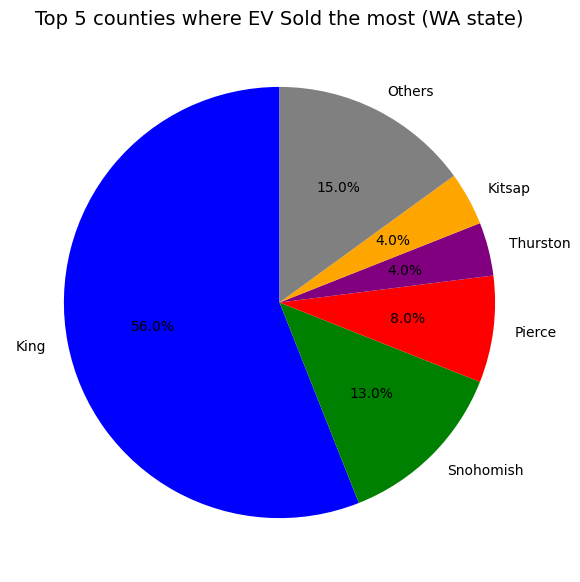

In [ ]:
percentages_top5 = [56, 13, 8, 4, 4]
percentage_others = 100 - sum(percentages_top5)
counties = ['King', 'Snohomish', 'Pierce', 'Thurston', 'Kitsap', 'Others']
percentages = percentages_top5 + [percentage_others]

plt.figure(figsize=(7, 7))
plt.pie(percentages, labels=counties, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'red', 'purple', 'orange', 'gray'])
plt.title('Top 5 counties where EV Sold the most (WA state)', fontsize=14)
plt.show()

So, in WA state The top 5 counties where EV were sold the most:

King           (56%)

Snohomish       (13%)

Pierce          (8%)

Thurston           (4%)

Kitsap         (4%)

Finding Top 5 EV making companies

In [ ]:
ev_filtered["Make"].value_counts().head(5)

,count
Make,
TESLA,80839
CHEVROLET,13205
NISSAN,13187
FORD,9335
KIA,7948


In [ ]:
a= percentage(ev_filtered[ev_filtered["Make"]=="TESLA"].shape[0],ev_filtered.shape[0])
b= percentage(ev_filtered[ev_filtered["Make"]=="CHEVROLET"].shape[0],ev_filtered.shape[0])
c= percentage(ev_filtered[ev_filtered["Make"]=="NISSAN"].shape[0],ev_filtered.shape[0])
d= percentage(ev_filtered[ev_filtered["Make"]=="FORD"].shape[0],ev_filtered.shape[0])
e= percentage(ev_filtered[ev_filtered["Make"]=="KIA"].shape[0],ev_filtered.shape[0])
a,b,c,d,e

(44.383623316514495,
 7.250037060015263,
 7.2401543892784,
 5.125262851589738,
 4.363748167588135)

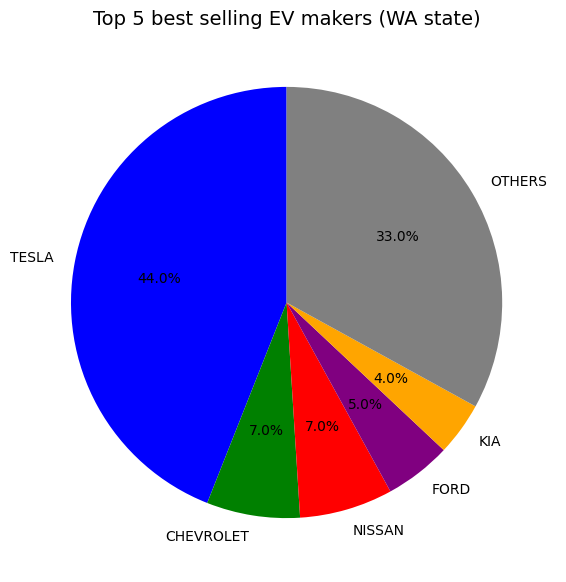

In [ ]:
percentages_top5 = [44, 7, 7, 5, 4]
percentage_others = 100 - sum(percentages_top5)
counties = ['TESLA', 'CHEVROLET', 'NISSAN', 'FORD', 'KIA', 'OTHERS']
percentages = percentages_top5 + [percentage_others]

plt.figure(figsize=(7, 7))
plt.pie(percentages, labels=counties, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'red', 'purple', 'orange', 'gray'])
plt.title('Top 5 best selling EV makers (WA state)', fontsize=14)
plt.show()


Therefore, it can be seen that The top five best selling EV makers are:

TESLA        (44%)

CHEVROLET    (7%)

NISSAN       (7%)

FORD         (5%)

KIA          (4%)

Now, finding how many EV's of this dataset are Clean Alternative Fuel Vehicle (CAFV) eligible

Before Doing the analysis of CAFV eligibility, some words has to be mentioned. The dataset on which analysis is going on had many records whose Electric Range were marked as 0. So obviously in CAFV Eligiblity Parameter they were marked as "Eligibility unknown as battery range has not been researched". 109401 records of this dataset had this scenario. So, these records have been manipulated by manually searching the car models (By model year) from company websites, and journal websites and manually inserting them. In case of CAFV eligibility, these manipulated records are being marked as "Clean Alternative Fuel Vehicle Eligible (Manually Researched)" or "Not eligible due to low battery range (Manually Researched)"

In [ ]:
cafv_eligible = ev_filtered[ev_filtered['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].isin(["Clean Alternative Fuel Vehicle Eligible", "Clean Alternative Fuel Vehicle Eligible (Manually Researched)"])]
cafv_eligible.shape

(163485, 11)

In [ ]:
a= percentage(cafv_eligible.shape[0],ev_filtered.shape[0])
a

89.7593569675574

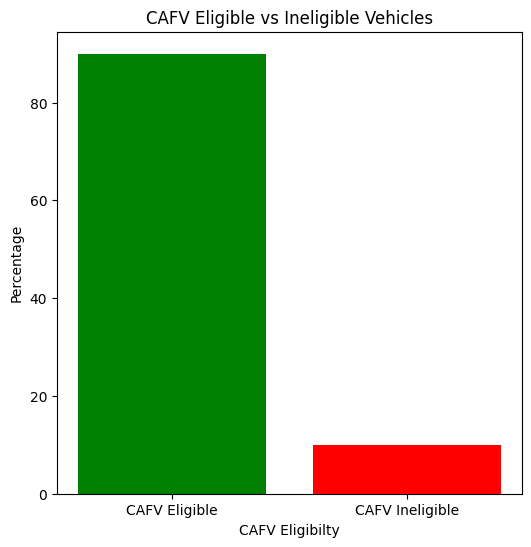

In [ ]:
categories = ['CAFV Eligible', 'CAFV Ineligible']
percentages = [90, 10]
plt.figure(figsize=(6, 6))
plt.bar(categories, percentages, color=['green', 'red'])
plt.xlabel('CAFV Eligibilty')
plt.ylabel('Percentage')
plt.title('CAFV Eligible vs Ineligible Vehicles')
plt.show()

Therefore, it can be found that 90% of all EV's are CAFV Eligible

Now, finding out the Vehicle Types and among them, which is/are the most common type/s

In [ ]:
ev_filtered["Electric Vehicle Type"].value_counts()

,count
Electric Vehicle Type,
Battery Electric Vehicle (BEV),143857
Plug-in Hybrid Electric Vehicle (PHEV),38280


In [ ]:
bev_type_ev= ev_filtered[ev_filtered["Electric Vehicle Type"]=="Battery Electric Vehicle (BEV)"]
a= percentage(bev_type_ev.shape[0],ev_filtered.shape[0])
a

78.98285356627154

In [ ]:
phev_type_ev= ev_filtered[ev_filtered["Electric Vehicle Type"]=="Plug-in Hybrid Electric Vehicle (PHEV)"]
a= percentage(phev_type_ev.shape[0],ev_filtered.shape[0])
a

21.017146433728456

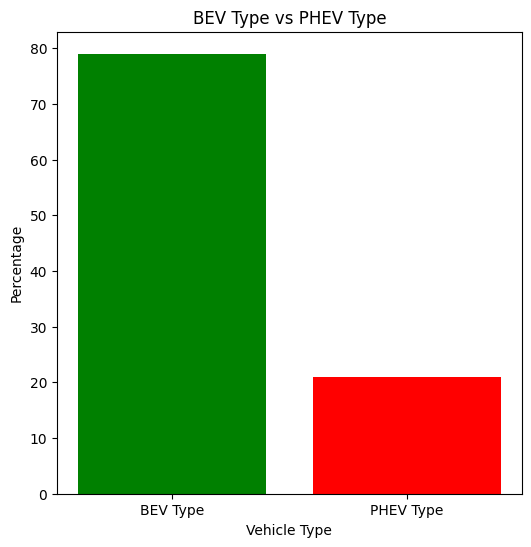

In [ ]:
categories = ['BEV Type', 'PHEV Type']
percentages = [79, 21]
plt.figure(figsize=(6, 6))
plt.bar(categories, percentages, color=['green', 'red'])
plt.xlabel('Vehicle Type')
plt.ylabel('Percentage')
plt.title('BEV Type vs PHEV Type')
plt.show()

Therefore, In this dataset, 79% vehicles are Battery Electric Vehicle (BEV) and the rest 21% are Plug-in Hybrid Electric Vehicle (PHEV)

So, Battery Electric Vehicle (BEV) type is the most common vehicle type

Now, finding which electric utility provides the most

In [ ]:
ev_filtered['Electric Utility'].value_counts().head(5)

,count
Electric Utility,
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),73385
PUGET SOUND ENERGY INC,40915
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),34833
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY,8855
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY,4566


In [ ]:
PUGETandTACOMA = ev_filtered[ev_filtered['Electric Utility'] == 'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)']
PUGET = ev_filtered[ev_filtered['Electric Utility'] == 'PUGET SOUND ENERGY INC']
SEATTLEandTACOMA = ev_filtered[ev_filtered['Electric Utility'] == 'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)']
BONNEVILLEandTACOMAandPENNINSULA =  ev_filtered[ev_filtered['Electric Utility'] == 'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY']
PUGETandWHATCOM = ev_filtered[ev_filtered['Electric Utility'] == 'PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY']

In [ ]:
a=percentage(PUGETandTACOMA.shape[0],ev_filtered['Electric Utility'].shape[0])
b=percentage(PUGET.shape[0],ev_filtered['Electric Utility'].shape[0])
c=percentage(SEATTLEandTACOMA.shape[0],ev_filtered['Electric Utility'].shape[0])
d=percentage(BONNEVILLEandTACOMAandPENNINSULA.shape[0],ev_filtered['Electric Utility'].shape[0])
e=percentage(PUGETandWHATCOM.shape[0],ev_filtered['Electric Utility'].shape[0])
a,b,c,d,e

(40.29109955692693,
 22.463859622152555,
 19.12461498761921,
 4.861724965273393,
 2.506904143584225)

In [ ]:
a = ev_filtered[ev_filtered["Electric Utility"] == "PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)"]
b = ev_filtered[ev_filtered["Electric Utility"] == "PUGET SOUND ENERGY INC"]
c = ev_filtered[ev_filtered["Electric Utility"] == "CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)"]
d = ev_filtered[ev_filtered["Electric Utility"] == "BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY"]
e = ev_filtered[ev_filtered["Electric Utility"] == "PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY"]
print(a['Electric Utility Type'].unique())
print(b['Electric Utility Type'].unique())
print(c['Electric Utility Type'].unique())
print(d['Electric Utility Type'].unique())
print(e['Electric Utility Type'].unique())

['Investor Owned, Municipal']
['Investor Owned']
['Municipal, Municipal']
['Federal, Municipal, Cooperative']
['Investor Owned, Political Subdivision']


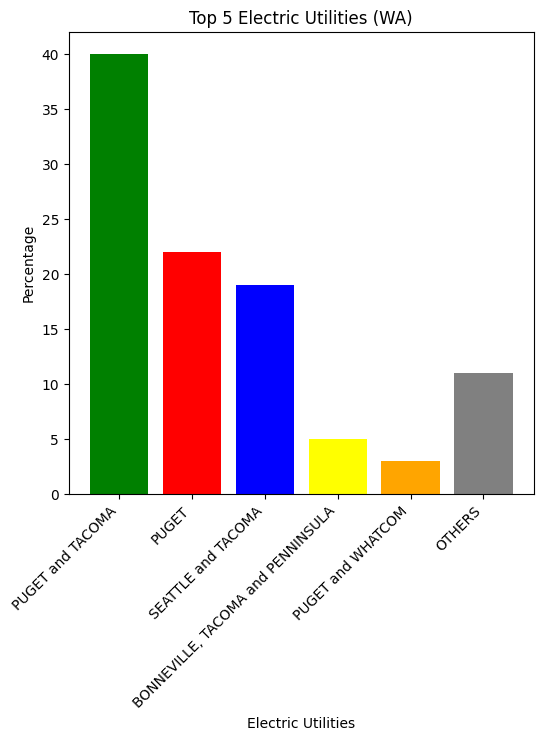

In [ ]:
categories = ['PUGET and TACOMA', 'PUGET', 'SEATTLE and TACOMA','BONNEVILLE, TACOMA and PENNINSULA', 'PUGET and WHATCOM', 'OTHERS']
percentages = [40, 22, 19, 5, 3,11]
plt.figure(figsize=(6, 6))
plt.bar(categories, percentages, color=['green', 'red', 'blue', 'yellow', 'orange', 'grey'])
plt.xlabel('Electric Utilities')
plt.ylabel('Percentage')
plt.title('Top 5 Electric Utilities (WA)')
plt.xticks(rotation=45, ha='right')
plt.show()

It can be seen that the top five utility providers are:

PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA) [Investor owned and Municipal]: (40%)

PUGET SOUND ENERGY INC (22%)[Investor owned]

CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA) (19%) [Municpal, Municpal]

BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY [Federal, Municpal, Cooperative] (5%)

PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY [Investor Owned, Political Subdivision] (3%)

Now finding the top 5 most selling EV Counties having more BEV than PHEV

In [ ]:
king_county= ev_filtered[ev_filtered["County"]=="King"]
snohomish_county= ev_filtered[ev_filtered["County"]=="Snohomish"]
pierce_county= ev_filtered[ev_filtered["County"]=="Pierce"]
thurston_county= ev_filtered[ev_filtered["County"]=="Thurston"]
kitsap_county= ev_filtered[ev_filtered["County"]=="Kitsap"]

In [ ]:
king_bev= king_county[king_county["Electric Vehicle Type"]=="Battery Electric Vehicle (BEV)"]
snohomish_bev= snohomish_county[snohomish_county["Electric Vehicle Type"]=="Battery Electric Vehicle (BEV)"]
pierce_bev= pierce_county[pierce_county["Electric Vehicle Type"]=="Battery Electric Vehicle (BEV)"]
thurston_bev= thurston_county[thurston_county["Electric Vehicle Type"]=="Battery Electric Vehicle (BEV)"]
kitsap_bev= kitsap_county[kitsap_county["Electric Vehicle Type"]=="Battery Electric Vehicle (BEV)"]

In [ ]:
king_phev= king_county[king_county["Electric Vehicle Type"]=="Plug-in Hybrid Electric Vehicle (PHEV)"]
snohomish_phev= snohomish_county[snohomish_county["Electric Vehicle Type"]=="Plug-in Hybrid Electric Vehicle (PHEV)"]
pierce_phev= pierce_county[pierce_county["Electric Vehicle Type"]=="Plug-in Hybrid Electric Vehicle (PHEV)"]
thurston_phev= thurston_county[thurston_county["Electric Vehicle Type"]=="Plug-in Hybrid Electric Vehicle (PHEV)"]
kitsap_phev= kitsap_county[kitsap_county["Electric Vehicle Type"]=="Plug-in Hybrid Electric Vehicle (PHEV)"]


In [ ]:
a= percentage(king_bev.shape[0],king_county.shape[0])
b= percentage(snohomish_bev.shape[0],snohomish_county.shape[0])
c= percentage(pierce_bev.shape[0],pierce_county.shape[0])
d= percentage(thurston_bev.shape[0],thurston_county.shape[0])
e= percentage(kitsap_bev.shape[0],kitsap_county.shape[0])
a,b,c,d,e

(80.8137834201135,
 82.85439411051156,
 77.0516612781179,
 75.25433049216387,
 74.48213749624738)

In [ ]:
a= percentage(king_phev.shape[0],king_county.shape[0])
b= percentage(snohomish_phev.shape[0],snohomish_county.shape[0])
c= percentage(pierce_phev.shape[0],pierce_county.shape[0])
d= percentage(thurston_phev.shape[0],thurston_county.shape[0])
e= percentage(kitsap_phev.shape[0],kitsap_county.shape[0])
a,b,c,d,e


(19.1862165798865,
 17.145605889488436,
 22.948338721882095,
 24.74566950783613,
 25.517862503752625)

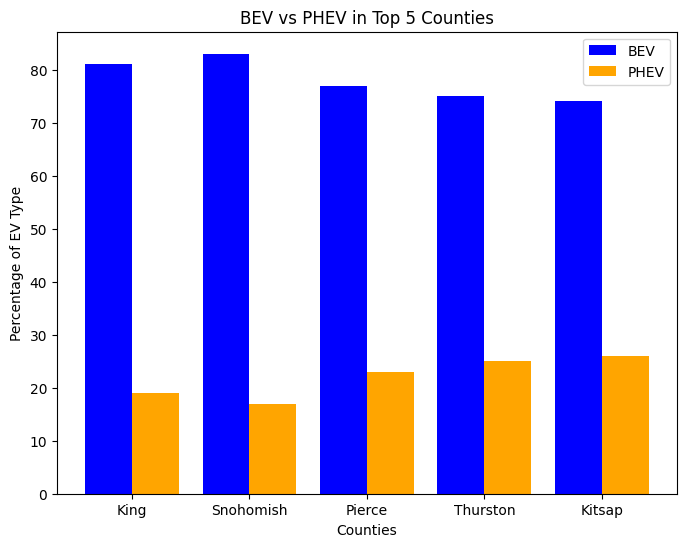

In [ ]:
counties = ['King', 'Snohomish', 'Pierce', 'Thurston', 'Kitsap']
bev_percentages = [81, 83, 77, 75, 74]
phev_percentages = [19, 17, 23, 25, 26]
x = np.arange(len(counties))
width = 0.4
plt.figure(figsize=(8, 6))
plt.bar(x - width/2, bev_percentages, width, label='BEV', color='blue')
plt.bar(x + width/2, phev_percentages, width, label='PHEV', color='orange')
plt.xlabel('Counties')
plt.ylabel('Percentage of EV Type')
plt.title('BEV vs PHEV in Top 5 Counties')
plt.xticks(x, counties)
plt.legend()
plt.show()

Therefore, it can be seen that:
*   King county has 81% BEVs and 19% PHEVs
*   Snohomish county has 83% BEVs and 17% PHEVs
*   Pierce county has 77% BEVs and 23% PHEVs
*   Thurston county has 75% BEVs and 25% PHEVs
*   Kitsap county has 74% BEV's and 26% PHEV's






Therefore, it can be predicted that counties in WA state have more BEVs than PHEVs.


Finding The top Electric Utility Providers and their types in top five best selling EV Counties

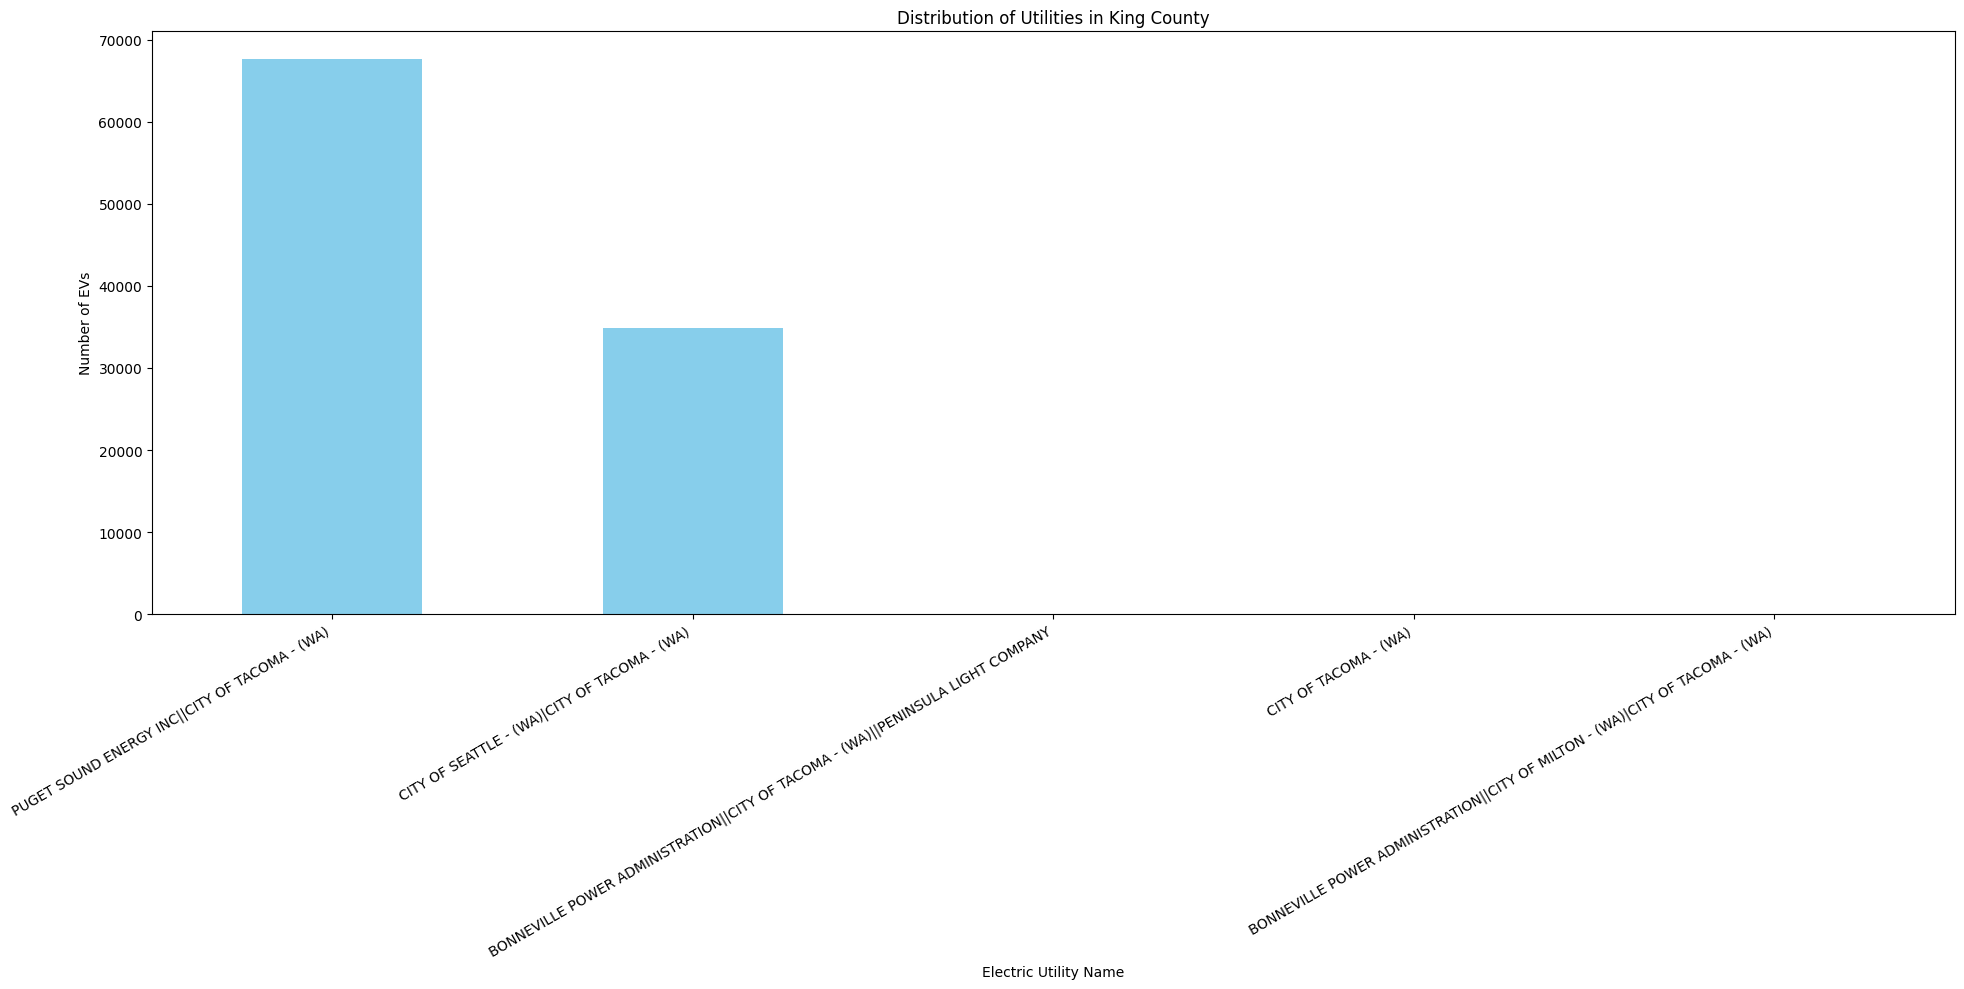

In [ ]:
king_utility_counts = king_county['Electric Utility'].value_counts().head(5)
plt.figure(figsize=(20, 10))
king_utility_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Utilities in King County')
plt.xlabel('Electric Utility Name')
plt.ylabel('Number of EVs')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

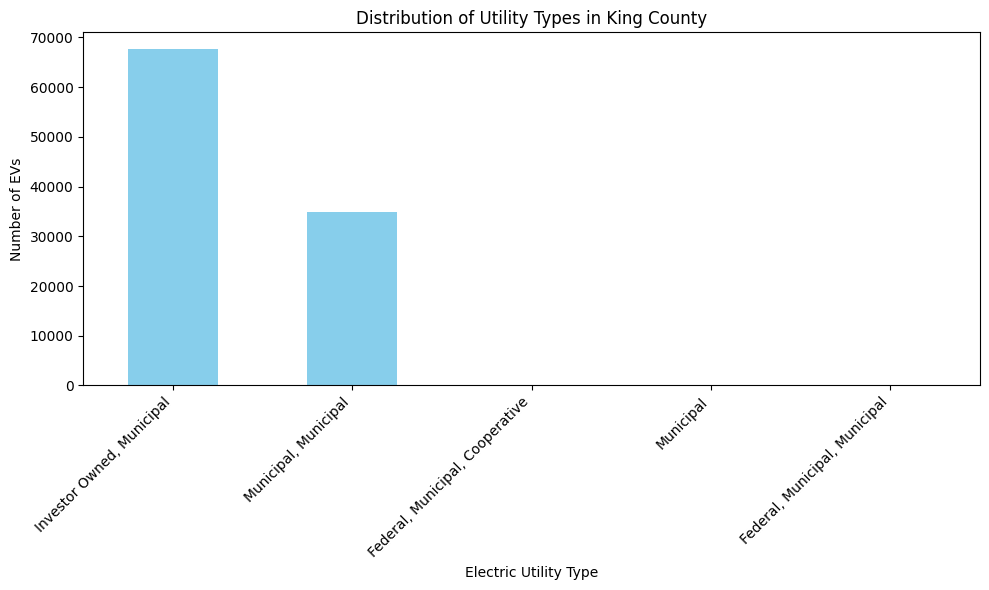

In [ ]:
king_utility_counts = king_county['Electric Utility Type'].value_counts().head(5)
plt.figure(figsize=(10, 6))
king_utility_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Utility Types in King County')
plt.xlabel('Electric Utility Type')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
def percentage(a,b):
  return (a/b)*100

In [ ]:
a = percentage(king_county[king_county['Electric Utility'] == 'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)'].shape[0], king_county.shape[0])
b = percentage(king_county[king_county['Electric Utility'] == 'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)'].shape[0], king_county.shape[0])
c = percentage(king_county[king_county['Electric Utility'] == 'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY'].shape[0], king_county.shape[0])
d = percentage(king_county[king_county['Electric Utility'] == 'CITY OF TACOMA - (WA)'].shape[0], king_county.shape[0])
e = percentage(king_county[king_county['Electric Utility'] == 'BONNEVILLE POWER ADMINISTTRATION||CITY OF MILTON - (WA)|CITY OF TACOMA - (WA)'].shape[0], king_county.shape[0])
a,b,c,d,e


(65.96364983716532,
 33.96419586965425,
 0.04095243666998186,
 0.017551044287135085,
 0.0)

It can be seen that in King county "PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)' "[One provider is Investor owned and the other one is Municipal Utitlity][65.9%] and "CITY OF SEATTLE|CITY OF TACOMA - (WA)" ["Both of them are Municipal type Utility][33.9%],'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY'[First one is Federal,Second one is Municipal and Third one is Cooperative][0.04%],'CITY OF TACOMA - (WA)[Municipal][0.01%] are used. All of them are combination of two or more utilities which means both of them provides electricity in same territories.

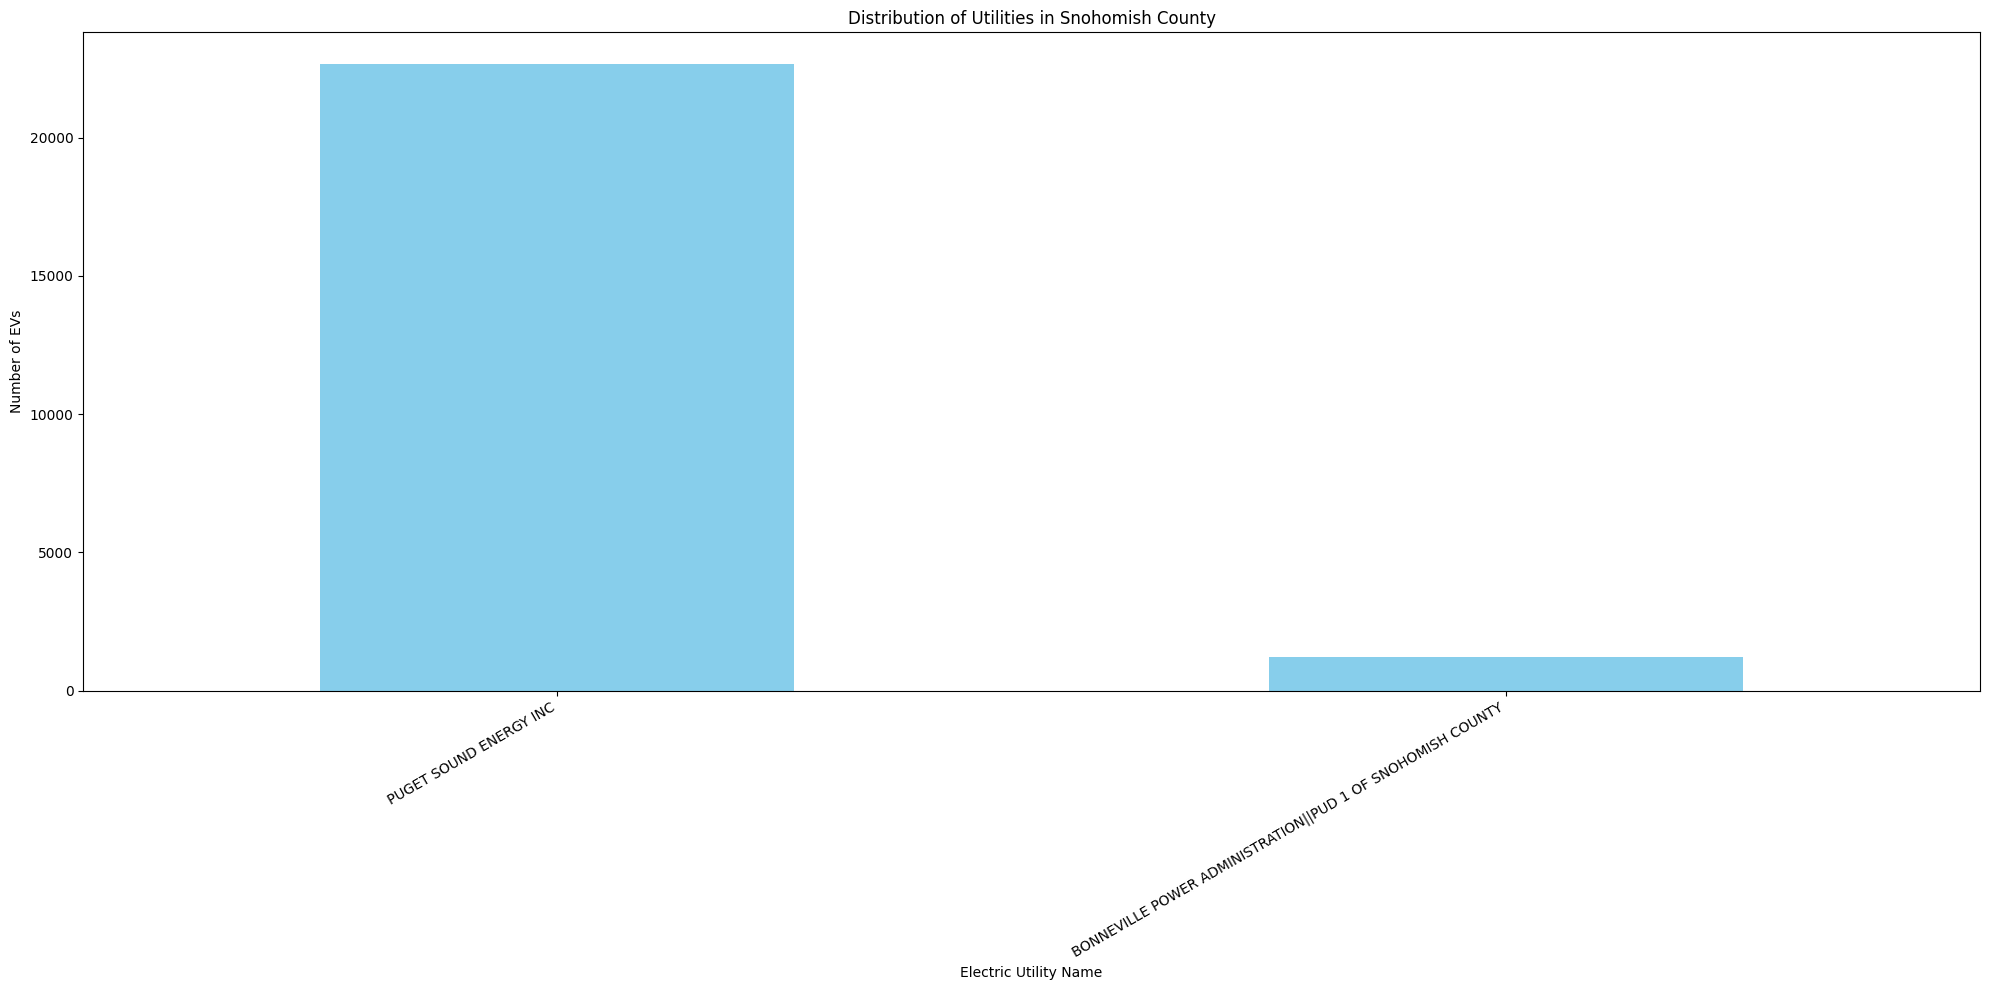

In [ ]:
snohomish_utility_counts = snohomish_county['Electric Utility'].value_counts().head(5)
plt.figure(figsize=(20, 10))
snohomish_utility_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Utilities in Snohomish County')
plt.xlabel('Electric Utility Name')
plt.ylabel('Number of EVs')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

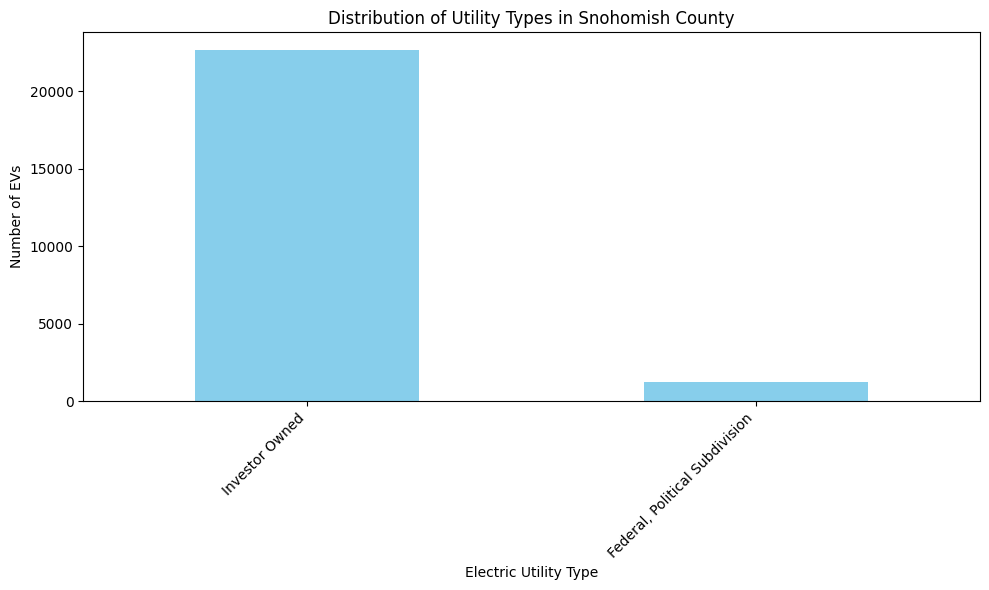

In [ ]:
snohomish_utility_counts = snohomish_county['Electric Utility Type'].value_counts().head(5)
plt.figure(figsize=(10, 6))
snohomish_utility_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Utility Types in Snohomish County')
plt.xlabel('Electric Utility Type')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
a= percentage(snohomish_county[snohomish_county['Electric Utility'] == 'PUGET SOUND ENERGY INC'].shape[0], snohomish_county.shape[0])
b= percentage(snohomish_county[snohomish_county['Electric Utility'] == 'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY'].shape[0], snohomish_county.shape[0])
a,b

(94.83833186932698, 5.161668130673024)

It can be seen that in Snohomish county "PUGET SOUND ENERGY INC"[Investor owned][95%] and "BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY" ["One of them is Federal type Utility and the the other one is Political Subdivision type utitlity][5%] are used. Both of them are combination of two utilities which means both of them provides electricity in same territories.

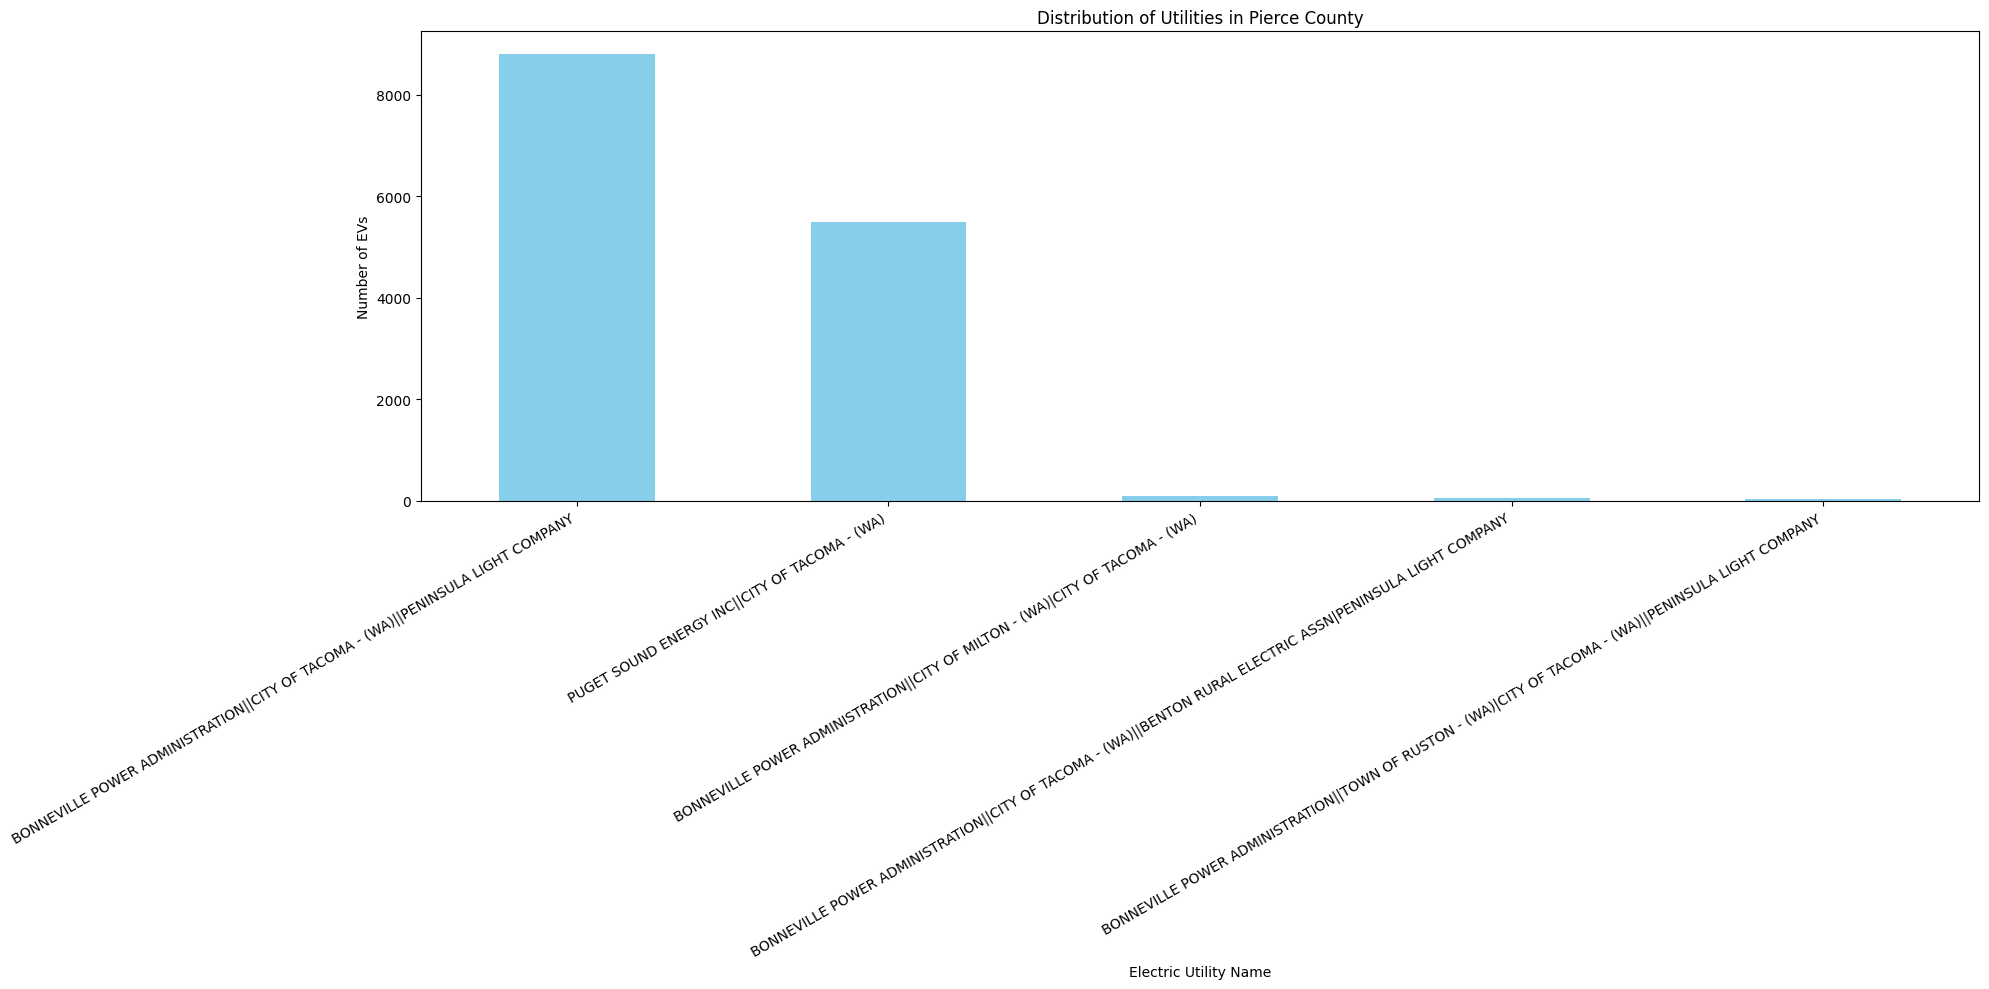

In [ ]:
pierce_utility_counts = pierce_county['Electric Utility'].value_counts().head(5)
plt.figure(figsize=(20, 10))
pierce_utility_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Utilities in Pierce County')
plt.xlabel('Electric Utility Name')
plt.ylabel('Number of EVs')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

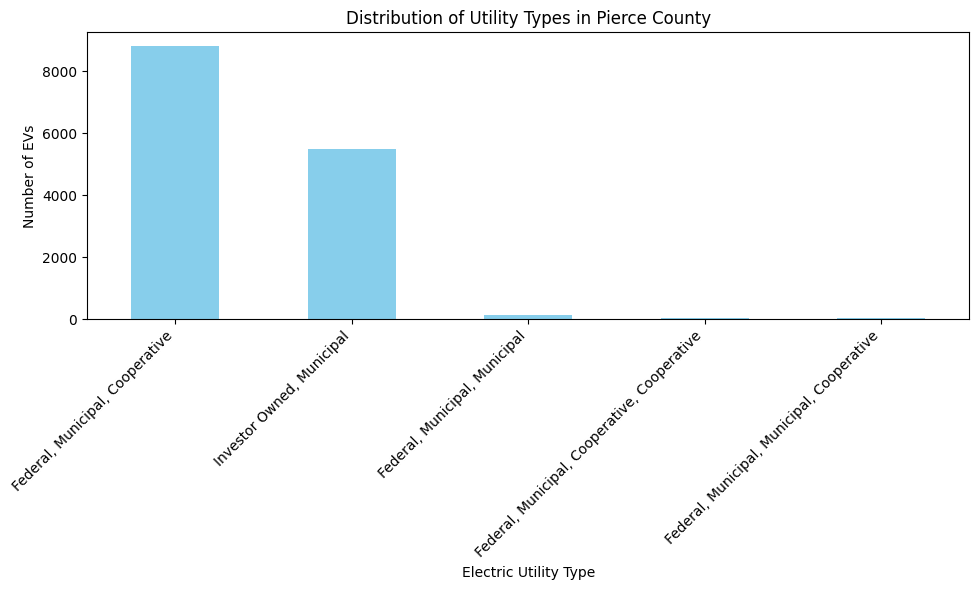

In [ ]:
pierce_utility_counts = pierce_county['Electric Utility Type'].value_counts().head(5)
plt.figure(figsize=(10, 6))
pierce_utility_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Utility Types in Pierce County')
plt.xlabel('Electric Utility Type')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
a= percentage(pierce_county[pierce_county['Electric Utility'] == 'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY'].shape[0], pierce_county.shape[0])
b= percentage(pierce_county[pierce_county['Electric Utility'] == 'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)'].shape[0], pierce_county.shape[0])
c= percentage(pierce_county[pierce_county['Electric Utility'] == 'BONNEVILLE POWER ADMINISTRATION||CITY OF MILTON - (WA)|CITY OF TACOMA - (WA)'].shape[0], pierce_county.shape[0])
d= percentage(pierce_county[pierce_county['Electric Utility'] == 'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||BENTON RURAL ELECTRIC ASSN|PENINSULA LIGHT COMPANY'].shape[0], pierce_county.shape[0])
e= percentage(pierce_county[pierce_county['Electric Utility'] == 'BONNEVILLE POWER ADMINISTRATION||TOWN OF RUSTON - (WA)|CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY'].shape[0], pierce_county.shape[0])
a,b,c,d,e

(60.624613056338994,
 37.86200729173832,
 0.6603838481117149,
 0.3233129256380271,
 0.30267593038453605)

It can be seen that in Pierce county "BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY"[First one is Federal type, Second one is Municipal type and the Third one is Cooperative type][61%], PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)[First one is Investor owned Second one is Municipal Type][38%], BONNEVILLE POWER ADMINISTRATION||CITY OF MILTON - (WA)|CITY OF TACOMA - (WA)[First one is Federal type Second and Third one are both Municipal type][0.6%],BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||BENTON RURAL ELECTRIC ASSN|PENINSULA LIGHT COMPANY[First one is Federal Type, Second one is Municipal Type Third and Fourth are both Cooperative type][0.3%],BONNEVILLE POWER ADMINISTRATION||TOWN OF RUSTON - (WA)|CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY[First one is Federal type, Second and Third are both Municipal type Fourth one is Cooperative Type]. All 5 of them are combination of two or types utilities which means all of them provides electricity in same territories.

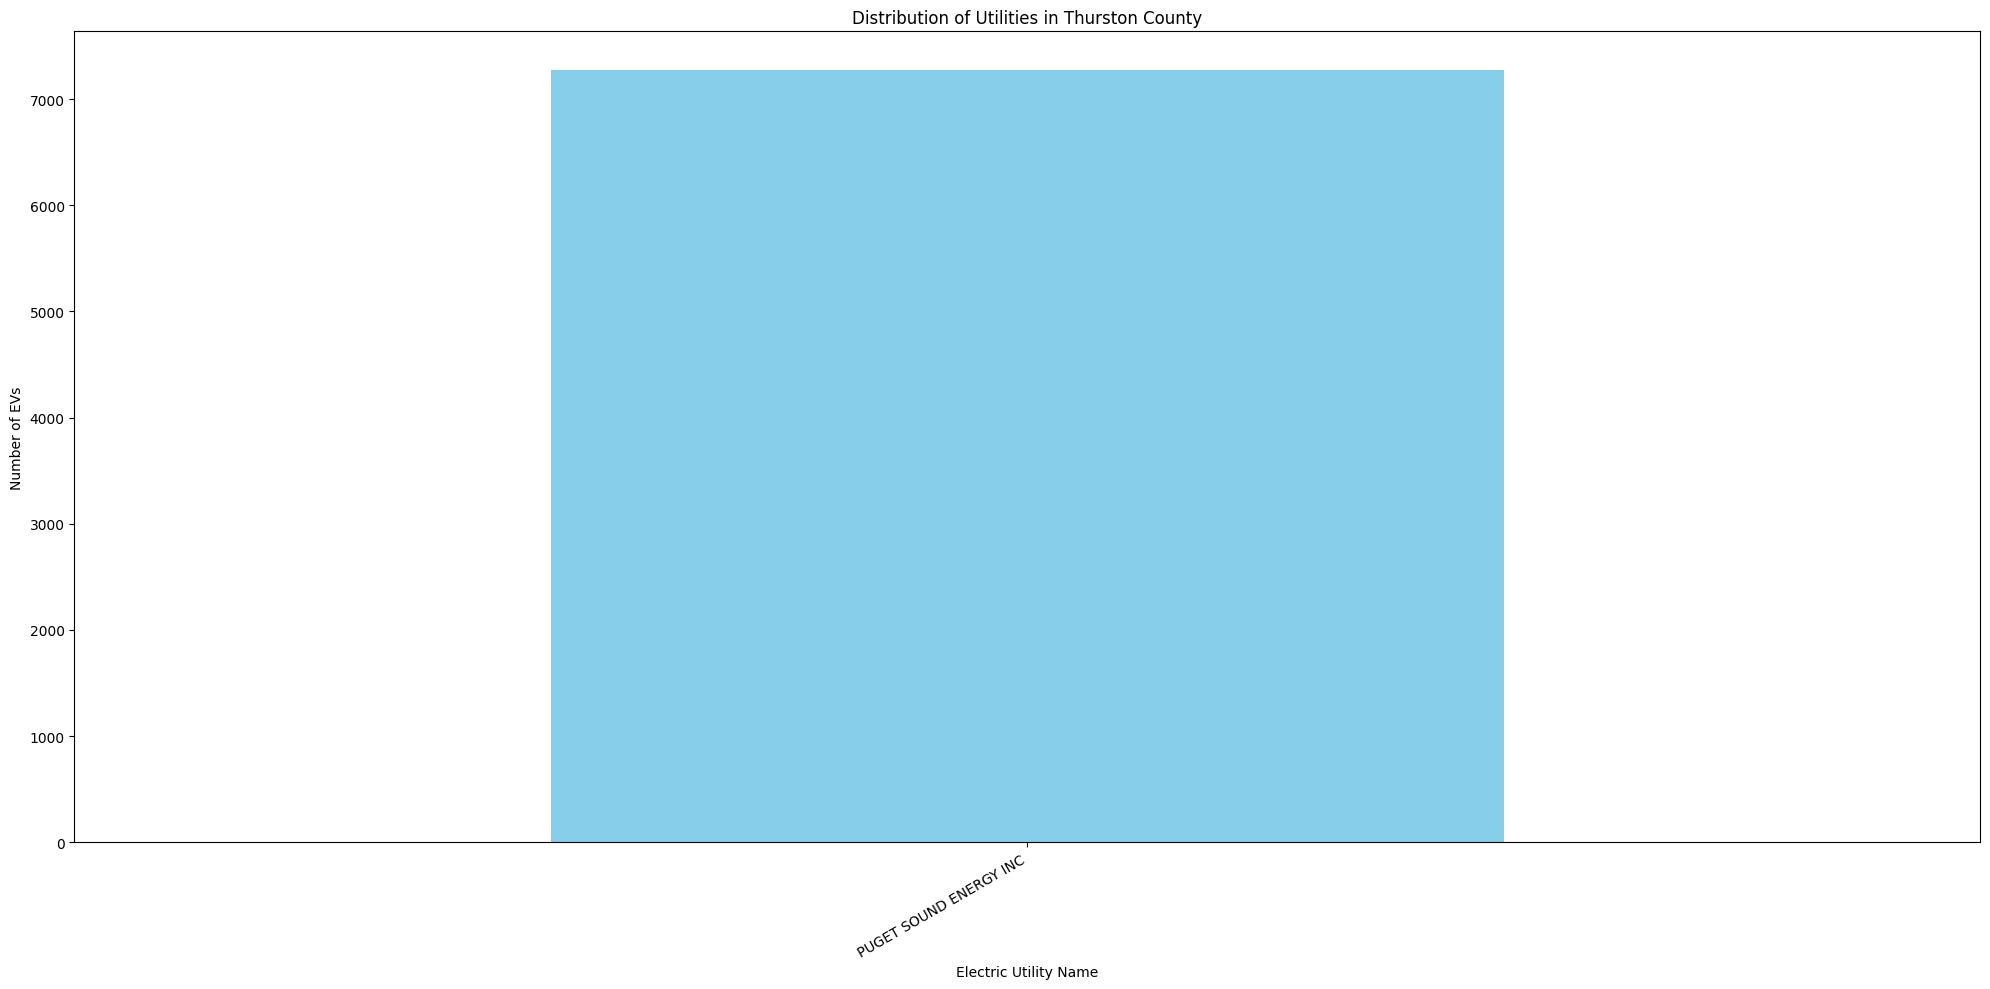

In [ ]:
thurston_utility_counts = thurston_county['Electric Utility'].value_counts().head(5)
plt.figure(figsize=(20, 10))
thurston_utility_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Utilities in Thurston County')
plt.xlabel('Electric Utility Name')
plt.ylabel('Number of EVs')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

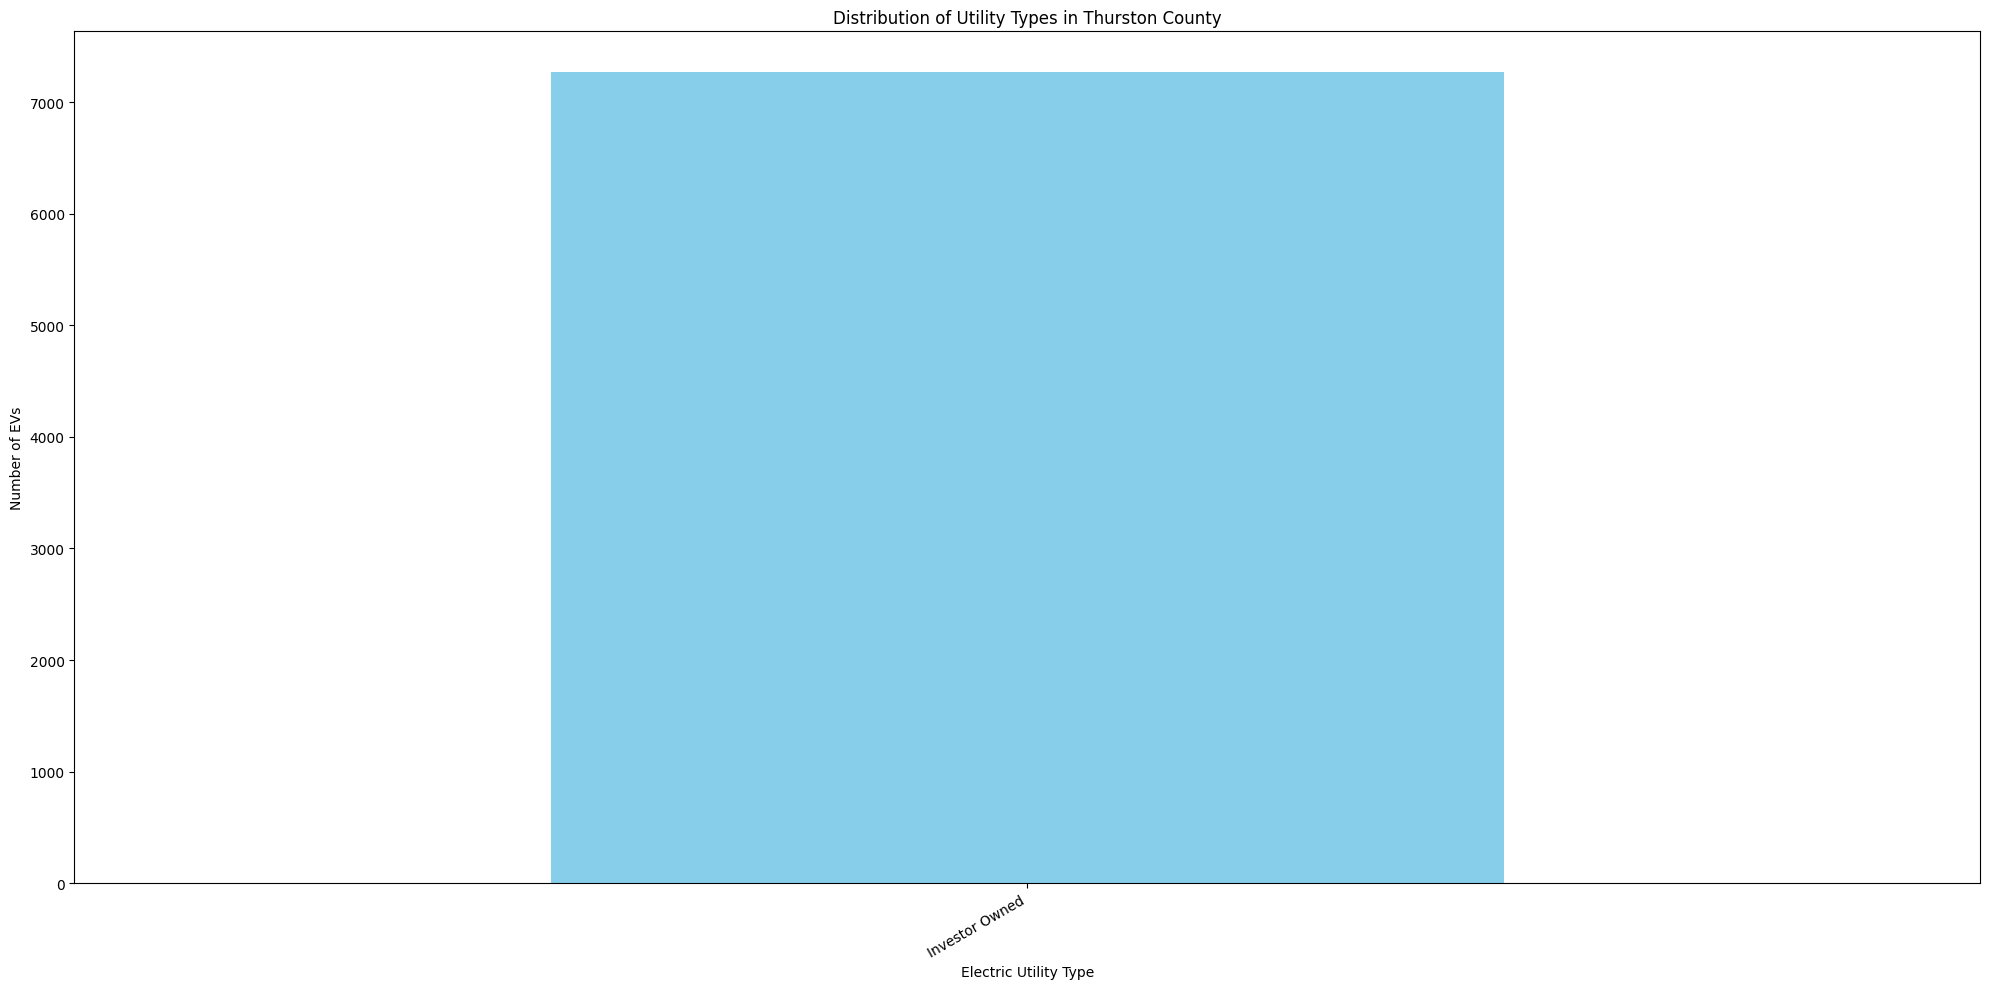

In [ ]:
thurston_utility_counts = thurston_county['Electric Utility Type'].value_counts().head(5)
plt.figure(figsize=(20, 10))
thurston_utility_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Utility Types in Thurston County')
plt.xlabel('Electric Utility Type')
plt.ylabel('Number of EVs')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

It can be seen that in Thurston County Only one provider provides Electricity: "PUGET SOUND ENERGY INC" which is an Investor owned type utility

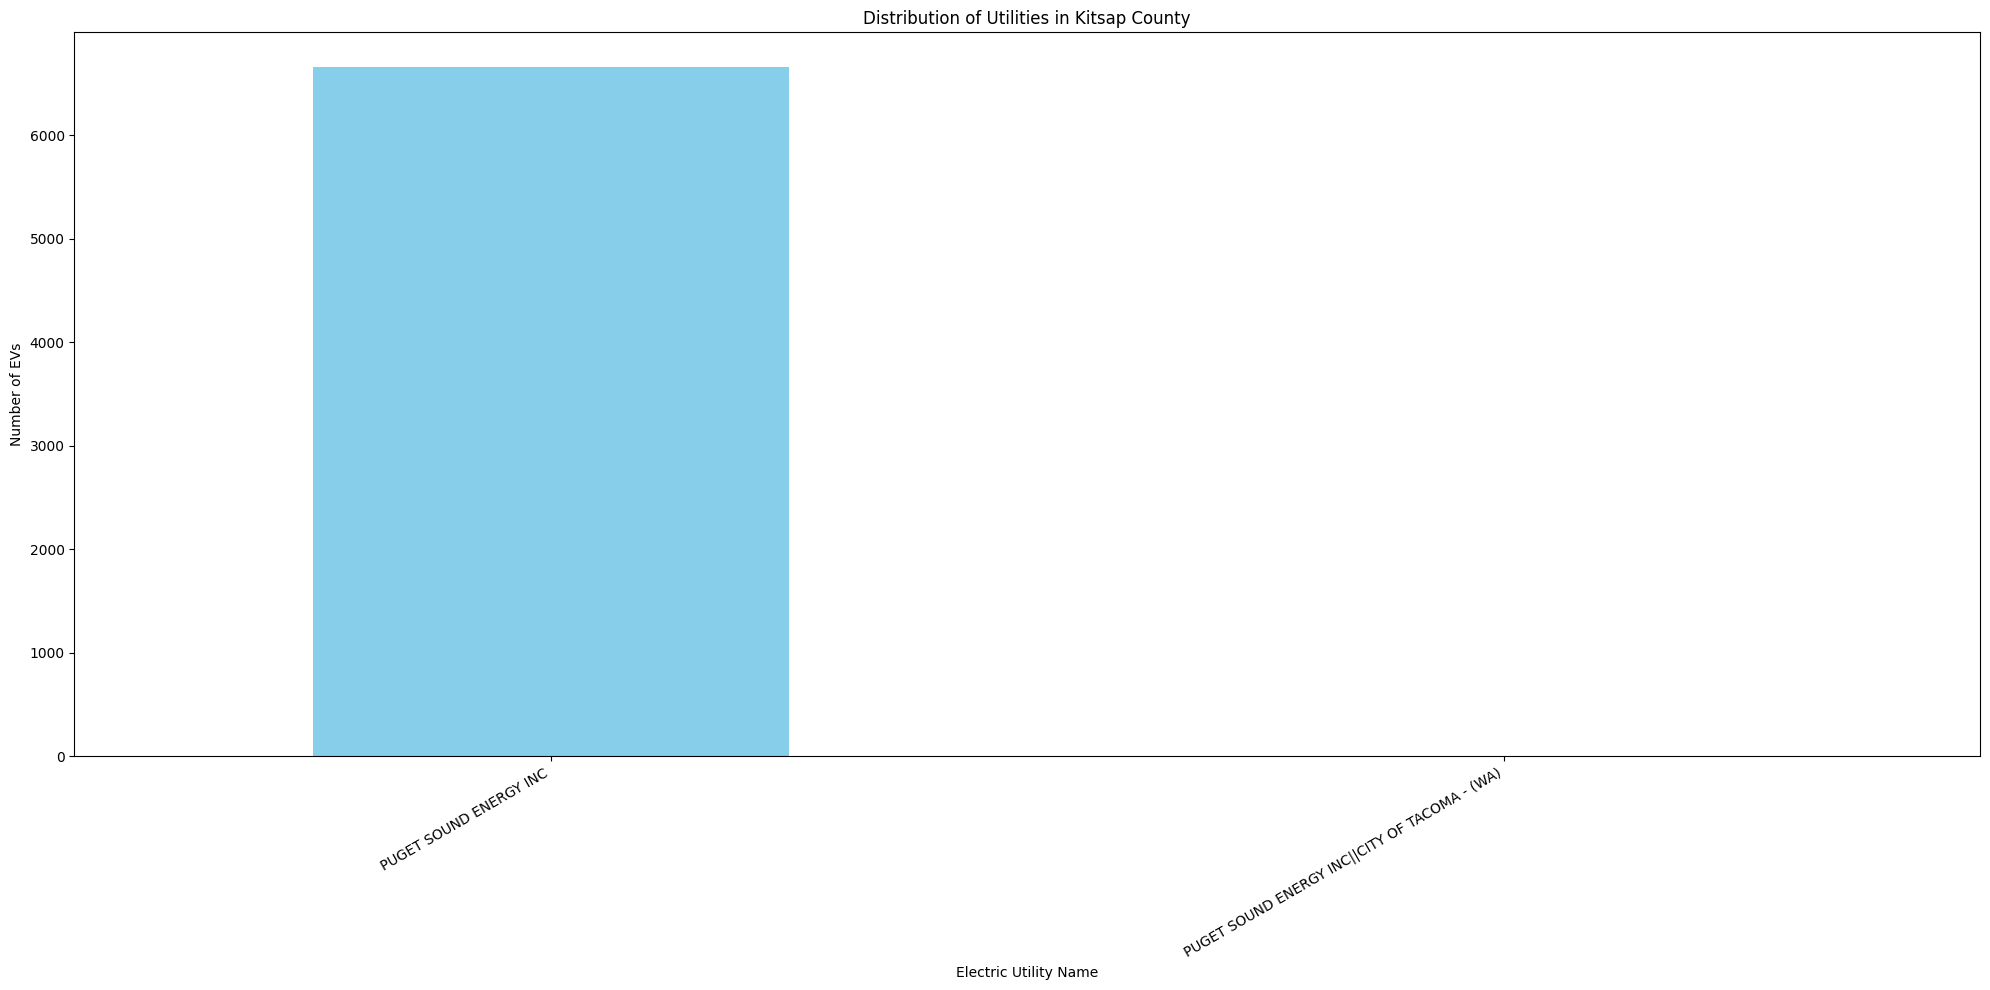

In [ ]:
kitsap_utility_counts = kitsap_county['Electric Utility'].value_counts().head(5)
plt.figure(figsize=(20, 10))
kitsap_utility_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Utilities in Kitsap County')
plt.xlabel('Electric Utility Name')
plt.ylabel('Number of EVs')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

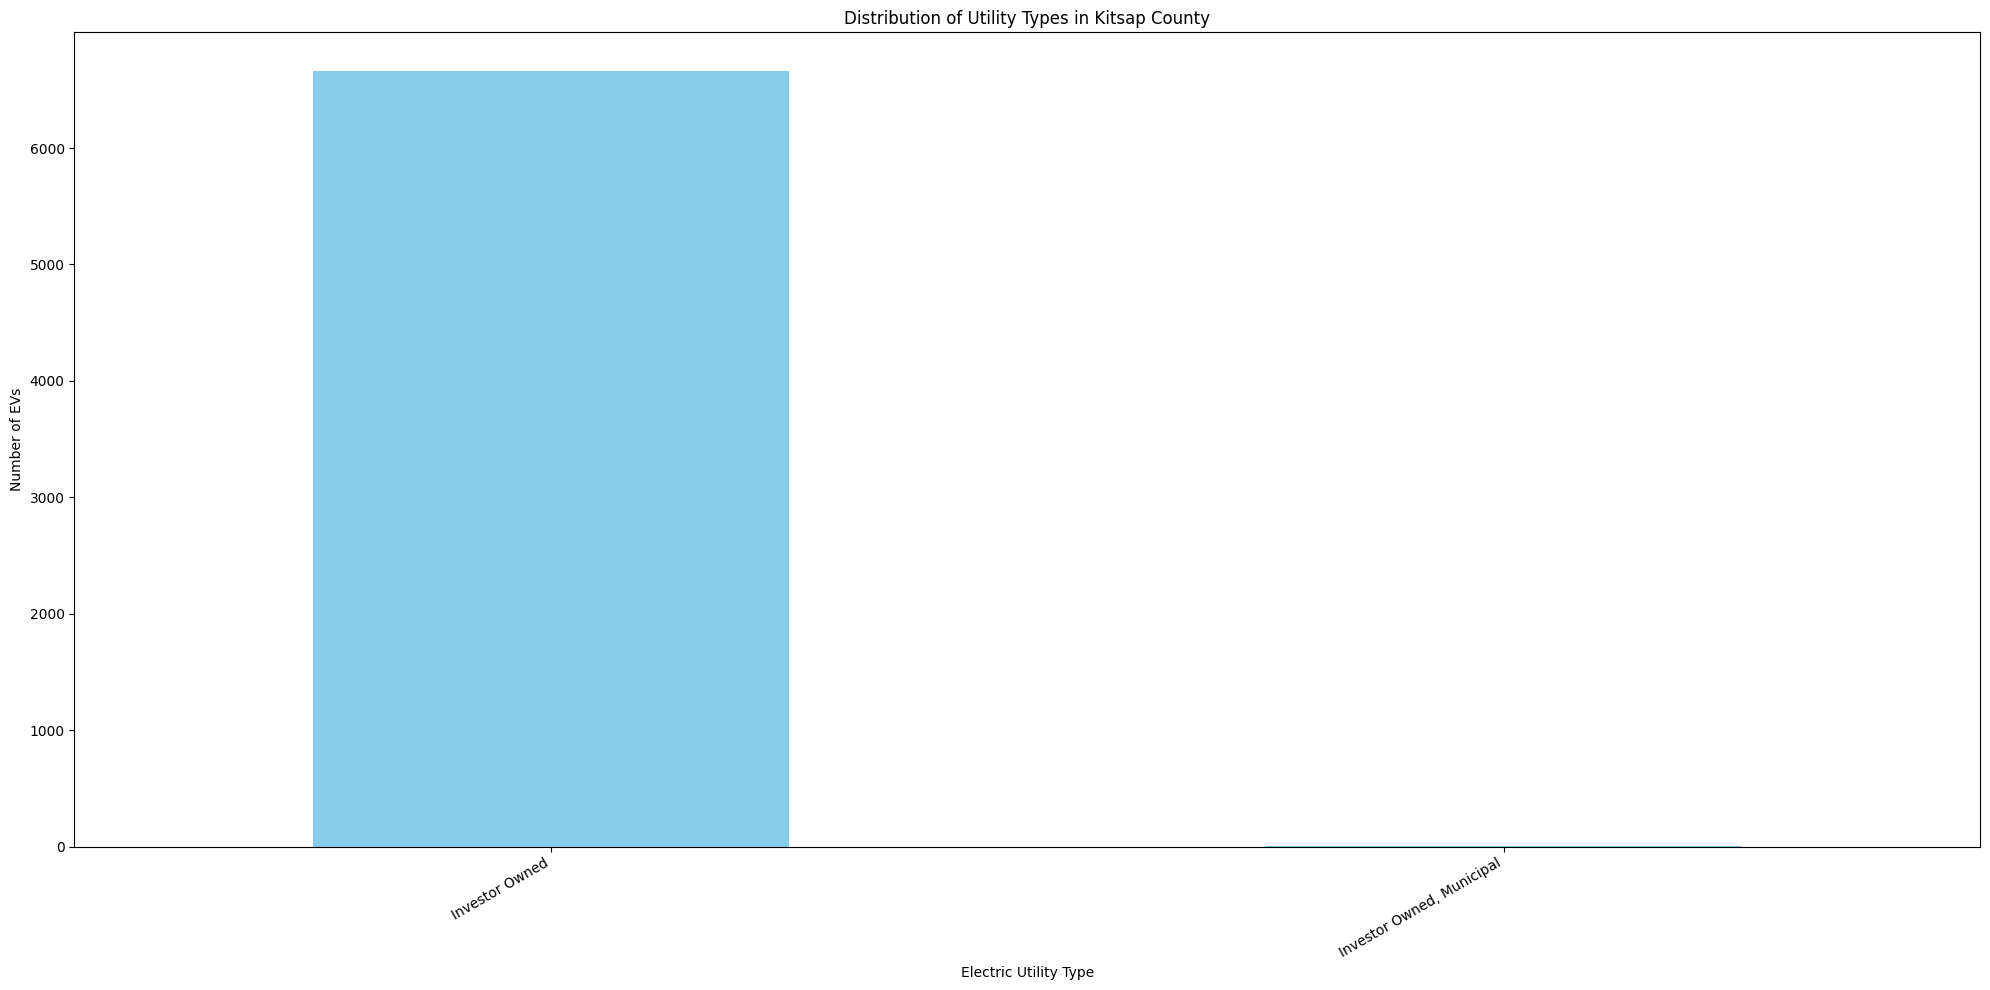

In [ ]:
kitsap_utility_counts = kitsap_county['Electric Utility Type'].value_counts().head(5)
plt.figure(figsize=(20, 10))
kitsap_utility_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Utility Types in Kitsap County')
plt.xlabel('Electric Utility Type')
plt.ylabel('Number of EVs')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
a= percentage(kitsap_county[kitsap_county['Electric Utility'] == 'PUGET SOUND ENERGY INC'].shape[0], kitsap_county.shape[0])
b= percentage(kitsap_county[kitsap_county['Electric Utility'] == 'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)'].shape[0], kitsap_county.shape[0])
a,b

(99.98498949264484, 0.015010507355148604)

It can be seen that in Kitsap county 'PUGET SOUND ENERGY INC'[Investor owned][99.9%] and 'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)[First one is investor owned and Second one is Municipal type utility][0.1%] provides electricity to evs.

Now, finding out certain counties more likely to have EVs with higher range.

In [ ]:
p= king_county["Electric Range (MILE)"].mean()
q= snohomish_county["Electric Range (MILE)"].mean()
r= pierce_county["Electric Range (MILE)"].mean()
s= thurston_county["Electric Range (MILE)"].mean()
t= kitsap_county["Electric Range (MILE)"].mean()
p,q,r,s,t


(230.79199087345697,
 239.6864934956289,
 219.20884639196532,
 209.26312895243333,
 201.90123086160312)

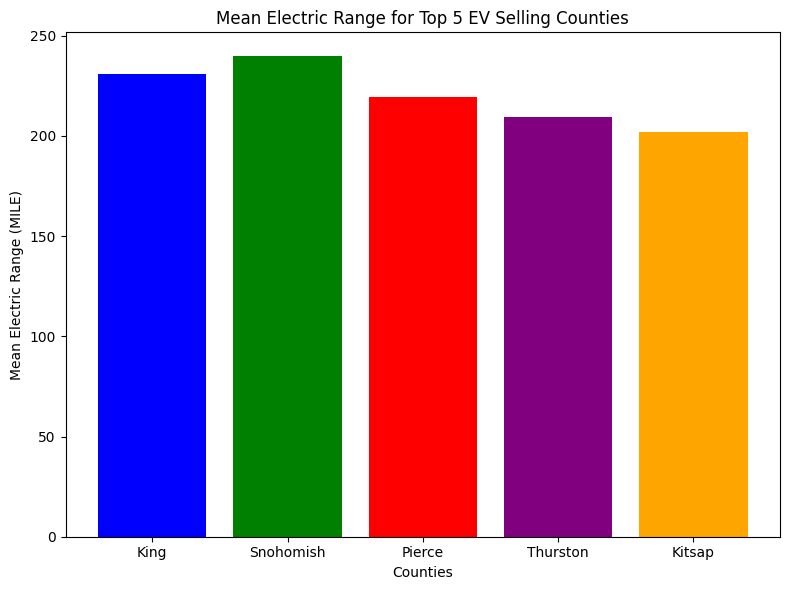

In [ ]:
counties = ['King', 'Snohomish', 'Pierce', 'Thurston', 'Kitsap']
mean_ranges = [p,q,r,s,t]
plt.figure(figsize=(8, 6))
plt.bar(counties, mean_ranges, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Counties')
plt.ylabel('Mean Electric Range (MILE)')
plt.title('Mean Electric Range for Top 5 EV Selling Counties')
plt.tight_layout()
plt.show()

Therefore, it can be concluded that:

Snohomish County appears to have EVs with the highest electric ranges[240 Miles], suggesting that electric vehicle owners in this county may prefer models with larger battery capacities.
King County also has a relatively high average range[231 Miles], indicating that EVs with significant electric ranges are common in the county.
Pierce[219 Miles], Thurston[209 Miles], and Kitsap[202 Miles] Counties have lower mean electric ranges compared to Snohomish and King Counties. However, the differences are not extremely large, so EVs with mid to high ranges are still popular across these counties.
This analysis suggests that Snohomish and King Counties are more likely to have EVs with higher electric ranges, which may be due to local infrastructure, consumer preferences, or other factors like commuting distances or access to charging stations.

Finding the range of ev's in this dataset which are CAFV eligible

In [ ]:
cafv_eligible["Electric Range (MILE)"].min()

30

In [ ]:
cafv_eligible["Electric Range (MILE)"].max()

520

Therefore, It can be said that in this dataset the specific Battery range of those ev's which are CAFV eligible is "30-520"

Now, finding relation between average range and model years of EVs


It has been noticed that in the case of 2025 year most of the vehicles of this dataset are phev which has a low battery range.
So clustering according to model year, vehicle type and electric range

While doing the analysis it has been found that in case of PHEV type cars, in year 2020 the only 3 car was sold were all WHEEGO ELECTRIC CARS, and later through research it was found out that these cars were BEV not PHEV. Therefore rectifying this error in the early stage of analysis

In [ ]:
grouped_data_1= ev_filtered.groupby(['Model Year', 'Electric Vehicle Type'])['Electric Range (MILE)'].mean().reset_index()
grouped_data_2= ev_filtered.groupby(['Model Year', 'Electric Vehicle Type'])['Base MSRP'].mean().reset_index()

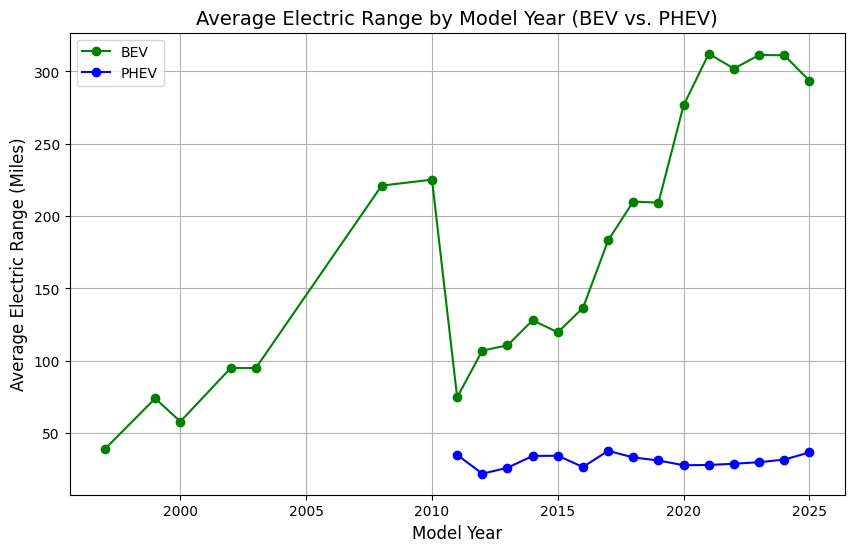

In [ ]:
bev_data = grouped_data_1[grouped_data_1['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
phev_data = grouped_data_1[grouped_data_1['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']
plt.figure(figsize=(10, 6))
plt.plot(bev_data['Model Year'], bev_data['Electric Range (MILE)'], marker='o', label='BEV', color='g')
plt.plot(phev_data['Model Year'], phev_data['Electric Range (MILE)'], marker='o', label='PHEV', color='b')
plt.title('Average Electric Range by Model Year (BEV vs. PHEV)', fontsize=14)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Average Electric Range (Miles)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

The graph shows a clear distinction between the electric range of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) over the years. BEVs have experienced a significant increase in range, likely due to advancements in battery technology. In contrast, PHEVs have maintained a relatively stable range. This trend suggests that  while BEVs are becoming more practical for longer distances, PHEV's Electric Mode might be better suited for shorter commutes and occasional longer trips.

A noticeable dip in average electric range for BEVs occurs around Model Year range "2010-2011". The reason is the database. In case of BEV's in 2010 model year, most of the ev vehicles were Tesla's Roadster model which has a range of 245 Miles. But in 2011, although the number of EV sold were increased, Most of the models were Nissan's Leaf which has a range of 73 Miles.


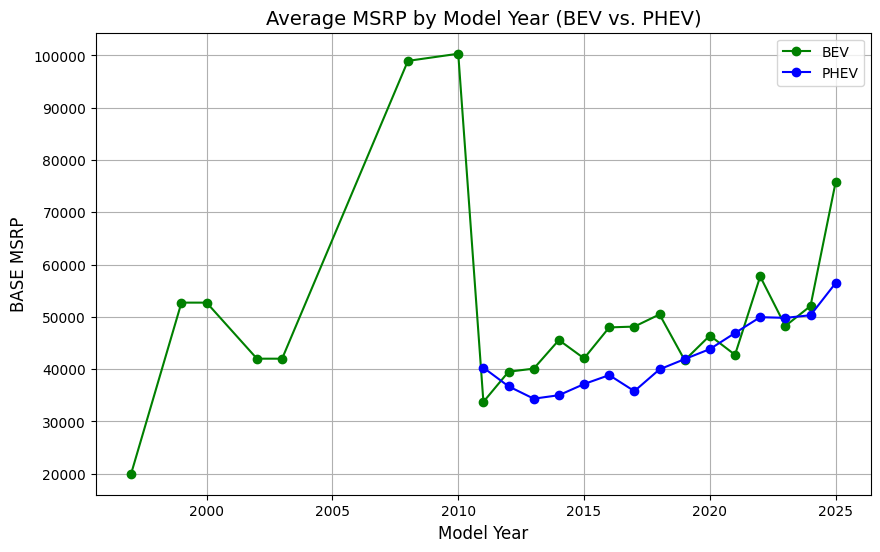

In [ ]:
bev_data = grouped_data_2[grouped_data_2['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
phev_data = grouped_data_2[grouped_data_2['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']
plt.figure(figsize=(10, 6))
plt.plot(bev_data['Model Year'], bev_data['Base MSRP'], marker='o', label='BEV', color='g')
plt.plot(phev_data['Model Year'], phev_data['Base MSRP'], marker='o', label='PHEV', color='b')
plt.title('Average MSRP by Model Year (BEV vs. PHEV)', fontsize=14)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('BASE MSRP', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

The graph depicts the average Manufacturer's Suggested Retail Price (MSRP) for Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) over the years. It's evident that BEVs have consistently commanded higher MSRPs compared to PHEVs. This disparity can be attributed to factors like battery technology advancements, longer electric ranges, and advanced features often associated with BEVs. Both vehicle types have experienced price increases over time, but BEVs have shown a more significant upward trend, possibly due to increasing production costs and technological advancements.

A noticeable dip in average electric range for BEVs occurs around Model Year range "2010-2011". The reason is the database. In case of BEV's in 2010 model year, most of the ev vehicles were Tesla's Roadster model which has a base MSRP of 110950 usd. But in 2011, although the number of EV sold were increased, Most of the models were Nissan's Leaf which had a base MSRP of 32780 usd.

Now, finding Top 5 most EV selling counties which prefer CAFV-eligible EVs.

In [ ]:
cafv_eligible["County"].value_counts().head(5)

,count
County,
King,93053
Snohomish,21890
Pierce,12846
Thurston,6359
Kitsap,5815


In [ ]:
a= percentage(cafv_eligible[cafv_eligible["County"]=="King"].shape[0],ev_filtered[ev_filtered["County"]=="King"].shape[0])
b= percentage(cafv_eligible[cafv_eligible["County"]=="Snohomish"].shape[0],ev_filtered[ev_filtered["County"]=="Snohomish"].shape[0])
c= percentage(cafv_eligible[cafv_eligible["County"]=="Pierce"].shape[0],ev_filtered[ev_filtered["County"]=="Pierce"].shape[0])
d= percentage(cafv_eligible[cafv_eligible["County"]=="Thurston"].shape[0],ev_filtered[ev_filtered["County"]=="Thurston"].shape[0])
e= percentage(cafv_eligible[cafv_eligible["County"]=="Kitsap"].shape[0],ev_filtered[ev_filtered["County"]=="Kitsap"].shape[0])
a,b,c,d,e

(90.73207355837673,
 91.56314050278162,
 88.36761367544885,
 87.42095133351664,
 87.28610027018914)

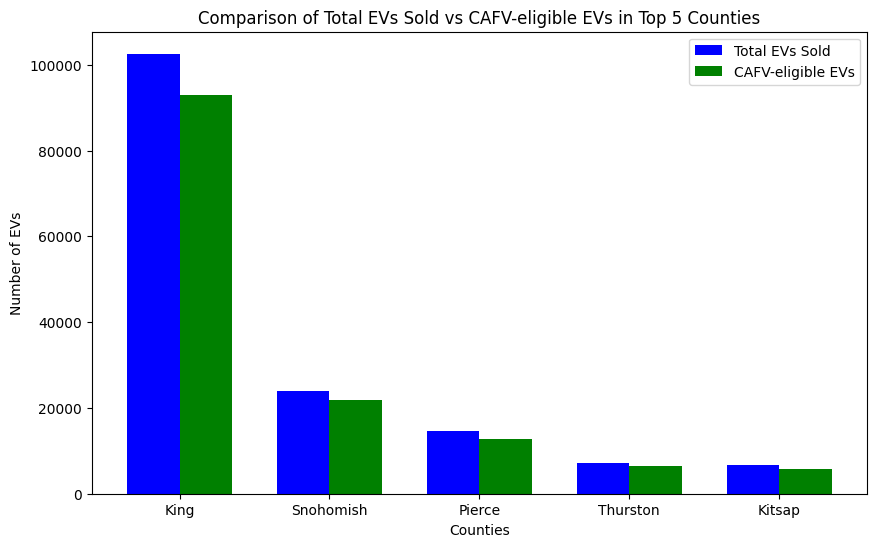

In [ ]:
counties = ['King', 'Snohomish', 'Pierce', 'Thurston', 'Kitsap']
total_evs_sold = [
    king_county.shape[0],
    snohomish_county.shape[0],
    pierce_county.shape[0],
    thurston_county.shape[0],
    kitsap_county.shape[0]
]
cafv_eligible_evs = [
    cafv_eligible[cafv_eligible["County"] == "King"].shape[0],
    cafv_eligible[cafv_eligible["County"] == "Snohomish"].shape[0],
    cafv_eligible[cafv_eligible["County"] == "Pierce"].shape[0],
    cafv_eligible[cafv_eligible["County"] == "Thurston"].shape[0],
    cafv_eligible[cafv_eligible["County"] == "Kitsap"].shape[0]
]
bar_width = 0.35
index = np.arange(len(counties))
plt.figure(figsize=(10, 6))
plt.bar(index, total_evs_sold, bar_width, label='Total EVs Sold', color='blue')
plt.bar(index + bar_width, cafv_eligible_evs, bar_width, label='CAFV-eligible EVs', color='green')
plt.xlabel('Counties')
plt.ylabel('Number of EVs')
plt.title('Comparison of Total EVs Sold vs CAFV-eligible EVs in Top 5 Counties')
plt.xticks(index + bar_width / 2, counties)
plt.legend()
plt.show()


Therefore, through this analysis it can be seen that in Top 5 counties with most selling EVs

King county has 91% cafv eligible vehicles

Snohomish county has 92% cafv eligible vehicles

Pierce county has 83% cafv eligible vehicles

Thurston county has 87% cafv eligible vehicles

Kitsap county has 87% cafv eligible vehicles

Therefore it can be said that out of these 5 counties Kindg and Snohomish county has the most CAFV Eligible vehicles

Now finding the most selling CAFV-eligible EV makers and their most selling model in King and Snohomish county.

In [ ]:
cafv_king= cafv_eligible[cafv_eligible["County"]=="King"]
cafv_king["Make"].value_counts().head(5)

,count
Make,
TESLA,48604
NISSAN,6806
CHEVROLET,6007
BMW,3913
KIA,3592


In [ ]:
king_cafv_tesla = cafv_king[cafv_king["Make"]=="TESLA"]
king_cafv_tesla["Make"]=="TESLA"
a=king_cafv_tesla["Model"].value_counts().head(1)
king_cafv_nissan= cafv_king[cafv_king["Make"]=="NISSAN"]
b=king_cafv_nissan["Model"].value_counts().head(1)
king_cafv_chevy= cafv_king[cafv_king["Make"]=="CHEVROLET"]
c=king_cafv_chevy["Model"].value_counts().head(1)
king_cafv_bmw= cafv_king[cafv_king["Make"]=="BMW"]
d=king_cafv_bmw["Model"].value_counts().head(1)
king_cafv_kia= cafv_king[cafv_king["Make"]=="KIA"]
e=king_cafv_kia["Model"].value_counts().head(1)
a,b,c,d,e

(Model
 MODEL Y    23336
 Name: count, dtype: int64,
 Model
 LEAF    6464
 Name: count, dtype: int64,
 Model
 BOLT EV    2918
 Name: count, dtype: int64,
 Model
 X5    1255
 Name: count, dtype: int64,
 Model
 NIRO    1432
 Name: count, dtype: int64)

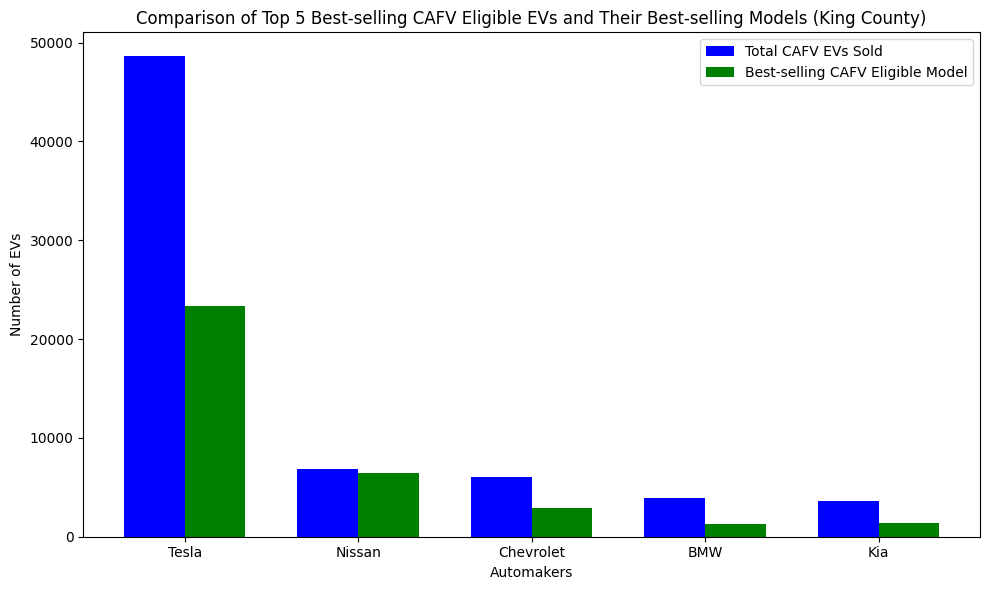

In [ ]:
makers = ['Tesla', 'Nissan', 'Chevrolet', 'BMW', 'Kia']
total_cafv_evs = [
    king_cafv_tesla.shape[0],
    king_cafv_nissan.shape[0],
    king_cafv_chevy.shape[0],
    king_cafv_bmw.shape[0],
    king_cafv_kia.shape[0]
]
makers_best_model = [
    king_cafv_tesla["Model"].value_counts().iloc[0],
    king_cafv_nissan["Model"].value_counts().iloc[0],
    king_cafv_chevy["Model"].value_counts().iloc[0],
    king_cafv_bmw["Model"].value_counts().iloc[0],
    king_cafv_kia["Model"].value_counts().iloc[0]
]
bar_width = 0.35
index = np.arange(len(makers))
plt.figure(figsize=(10, 6))
plt.bar(index, total_cafv_evs, bar_width, label='Total CAFV EVs Sold', color='blue')
plt.bar(index + bar_width, makers_best_model, bar_width, label='Best-selling CAFV Eligible Model', color='green')
plt.xlabel('Automakers')
plt.ylabel('Number of EVs')
plt.title('Comparison of Top 5 Best-selling CAFV Eligible EVs and Their Best-selling Models (King County)')
plt.xticks(index + bar_width / 2, makers)
plt.legend()
plt.tight_layout()
plt.show()


Therefore from the above analysis it can be said that:

In King County the top 5 most cafv eligible ev selling makers are:

Tesla: It sold 48604 evs In King and its most selling CAFV eligible model was MODEL Y (23336 units were sold, 48% of total)

Nissan: It sold 6806 evs In King and its most selling CAFV eligible model was LEAF (6464 units were sold, 95% of total)

Chevrolet: It sold 6007 evs In King and its most selling CAFV eligible model was BOLT EV (2918 units were sold, 49% of total)

BMW: It sold 3913 evs In King and its most selling CAFV eligible model was X5 (1255 units were sold, 32% of total)

Kia: It sold 3592 evs In King and its most selling CAFV eligible model was NIRO (1432 units were sold, 40% of total)

In [ ]:
cafv_snohomish= cafv_eligible[cafv_eligible["County"]=="Snohomish"]
cafv_snohomish["Make"].value_counts().head(5)

,count
Make,
TESLA,12258
NISSAN,1728
CHEVROLET,1421
KIA,923
FORD,900


In [ ]:
cafv_snohomish_tesla= cafv_snohomish[cafv_snohomish["Make"]=="TESLA"]
a=cafv_snohomish_tesla["Model"].value_counts().head(1)
cafv_snohomish_nissan= cafv_snohomish[cafv_snohomish["Make"]=="NISSAN"]
b=cafv_snohomish_nissan["Model"].value_counts().head(1)
cafv_snohomish_chevy= cafv_snohomish[cafv_snohomish["Make"]=="CHEVROLET"]
c=cafv_snohomish_chevy["Model"].value_counts().head(1)
cafv_snohomish_kia= cafv_snohomish[cafv_snohomish["Make"]=="KIA"]
d=cafv_snohomish_kia["Model"].value_counts().head(1)
cafv_snohomish_ford= cafv_snohomish[cafv_snohomish["Make"]=="FORD"]
e=cafv_snohomish_ford["Model"].value_counts().head(1)
a,b,c,d,e

(Model
 MODEL Y    6577
 Name: count, dtype: int64,
 Model
 LEAF    1593
 Name: count, dtype: int64,
 Model
 BOLT EV    565
 Name: count, dtype: int64,
 Model
 EV6    317
 Name: count, dtype: int64,
 Model
 MUSTANG MACH-E    504
 Name: count, dtype: int64)

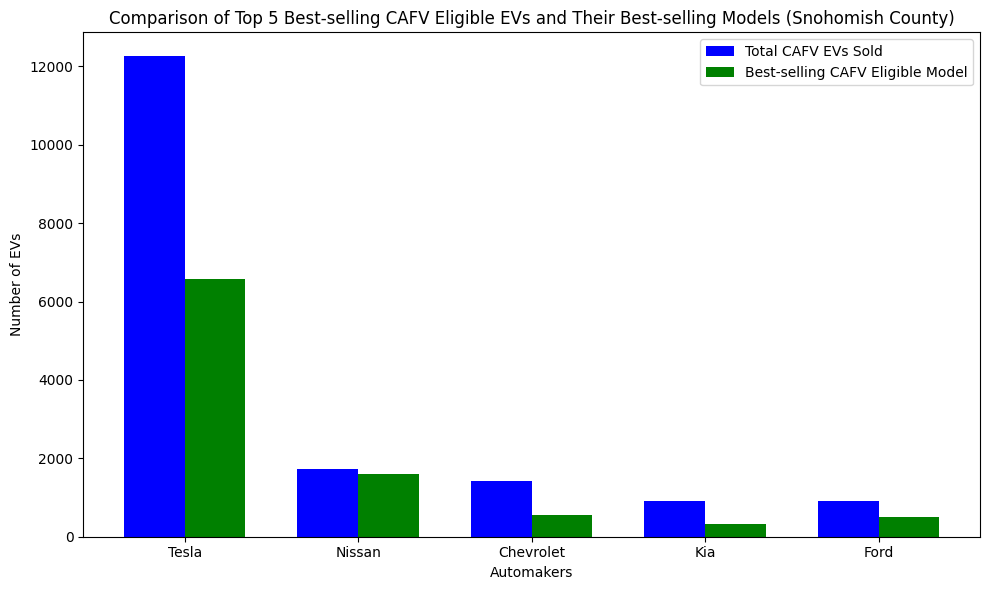

In [ ]:
makers = ['Tesla', 'Nissan', 'Chevrolet', 'Kia', 'Ford']
total_cafv_evs = [
    cafv_snohomish_tesla.shape[0],
    cafv_snohomish_nissan.shape[0],
    cafv_snohomish_chevy.shape[0],
    cafv_snohomish_kia.shape[0],
    cafv_snohomish_ford.shape[0]
]
makers_best_model = [
    cafv_snohomish_tesla["Model"].value_counts().iloc[0],
    cafv_snohomish_nissan["Model"].value_counts().iloc[0],
    cafv_snohomish_chevy["Model"].value_counts().iloc[0],
    cafv_snohomish_kia["Model"].value_counts().iloc[0],
    cafv_snohomish_ford["Model"].value_counts().iloc[0]
]
bar_width = 0.35
index = np.arange(len(makers))
plt.figure(figsize=(10, 6))
plt.bar(index, total_cafv_evs, bar_width, label='Total CAFV EVs Sold', color='blue')
plt.bar(index + bar_width, makers_best_model, bar_width, label='Best-selling CAFV Eligible Model', color='green')
plt.xlabel('Automakers')
plt.ylabel('Number of EVs')
plt.title('Comparison of Top 5 Best-selling CAFV Eligible EVs and Their Best-selling Models (Snohomish County)')
plt.xticks(index + bar_width / 2, makers)
plt.legend()
plt.tight_layout()
plt.show()


Therefore from the above analysis it can be said that:

In Snohomish County the top 5 most cafv eligible ev selling makers are:

Tesla: It sold 12258 evs In King and its most selling CAFV eligible model was MODEL Y (6577 units were sold, 54% of total)

Nissan: It sold 1728 evs In King and its most selling CAFV eligible model was LEAF (1593 units were sold, 92% of total)

Chevrolet: It sold 1421 evs In King and its most selling CAFV eligible model was BOLT EV (565 units were sold, 40% of total)

Kia: It sold 923 evs In King and its most selling CAFV eligible model was EV6 (317 units were sold, 34% of total)

Ford: It sold 900 evs In King and its most selling CAFV eligible model was MUSTANG MACH-E (504 units were sold, 56% of total)

Now, finding whether EVs from newer model years are more CAFV eligible.

For newer years comparison number of CAFV eligible EVs sold in the recent years [i.e 2022 & 2023] will be compared with number of CAFV eligible EVs sold in the previous years [i.e 2020 & 2021].

In [ ]:
cafv_eligible["Model Year"].value_counts()

,count
Model Year,
2023,52536
2022,24155
2024,20787
2021,15840
2018,11082
2020,9755
2019,8519
2017,5736
2016,3766


In [ ]:
cafv_eligible_2022 = cafv_eligible[cafv_eligible["Model Year"] == 2022].shape[0]
cafv_eligible_2023 = cafv_eligible[cafv_eligible["Model Year"] == 2023].shape[0]
cafv_eligible_2022_2023 = cafv_eligible_2022 + cafv_eligible_2023
cafv_eligible_2022_2023


76691

In [ ]:
cafv_eligible_2021= cafv_eligible[cafv_eligible["Model Year"]==2021].shape[0]
cafv_eligible_2020= cafv_eligible[cafv_eligible["Model Year"]==2020].shape[0]
cafv_eligible_2021_2020= cafv_eligible_2021 + cafv_eligible_2020
cafv_eligible_2021_2020

25595

In [ ]:
def percentage(a,b):
    return (a/b)*100

In [ ]:
a= percentage(cafv_eligible_2021_2020,cafv_eligible_2022_2023)
a

33.37418993102189

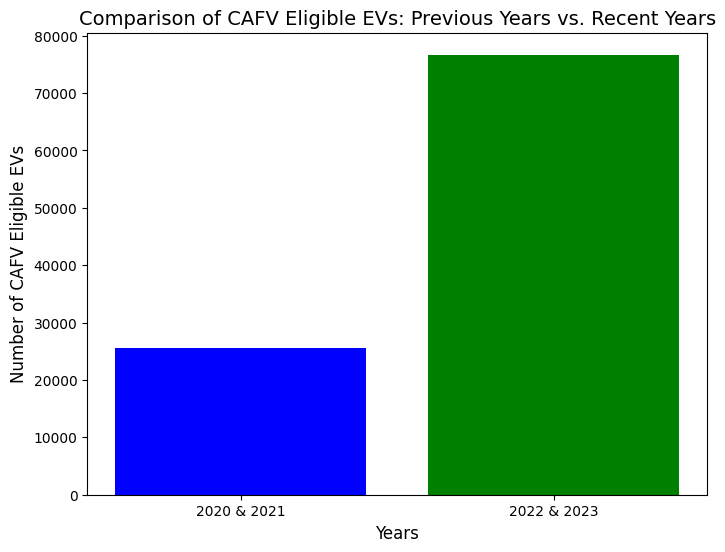

In [ ]:
years = ['2020 & 2021', '2022 & 2023']
cafv_counts = [cafv_eligible_2021_2020, cafv_eligible_2022_2023]
plt.figure(figsize=(8, 6))
plt.bar(years, cafv_counts, color=['blue', 'green'])
plt.title('Comparison of CAFV Eligible EVs: Previous Years vs. Recent Years', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Number of CAFV Eligible EVs', fontsize=12)
plt.show()


Therefore, it can be seen that the number of CAFV-eligible EVs sold in recent years (2022 and 2023) has hiked 33% than the previous years (2020 and 2021), indicating an increase in the proportion of CAFV-eligible EVs in recent years.

So. it can be concluded that newer model year's EVs are more CAFV eligible than those of the previous years.

Now finding providing rate the top 5 electric utility providers in top 5 ev selling counties

As previously analysed, the top 5 Electric utility providers are:

PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)

PUGET SOUND ENERGY INC

CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)

BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY

PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY

And, the top 5 EV selling counties are:

King           

Snohomish      

Pierce         

Thurston           

Kitsap        

now doing further analysis

In [ ]:
ev_filtered['Electric Utility'].value_counts().head(5)

,count
Electric Utility,
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),73385
PUGET SOUND ENERGY INC,40915
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),34833
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY,8855
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY,4566


In [ ]:
a = PUGETandTACOMA[PUGETandTACOMA["County"] == "King"]["Electric Range (MILE)"].mean()
b = PUGETandTACOMA[PUGETandTACOMA["County"] == "Snohomish"]["Electric Range (MILE)"].mean()
c = PUGETandTACOMA[PUGETandTACOMA["County"] == "Pierce"]["Electric Range (MILE)"].mean()
d = PUGETandTACOMA[PUGETandTACOMA["County"] == "Thurston"]["Electric Range (MILE)"].mean()
e = PUGETandTACOMA[PUGETandTACOMA["County"] == "Kitsap"]["Electric Range (MILE)"].mean()
a,b,c,d,e

(236.45597256507665, nan, 226.0641351744186, nan, 25.0)

In [ ]:
a= PUGET[PUGET["County"]=="King"]["Electric Range (MILE)"].mean()
b= PUGET[PUGET["County"]=="Snohomish"]["Electric Range (MILE)"].mean()
c= PUGET[PUGET["County"]=="Pierce"]["Electric Range (MILE)"].mean()
d= PUGET[PUGET["County"]=="Thurston"]["Electric Range (MILE)"].mean()
e= PUGET[PUGET["County"]=="Kitsap"]["Electric Range (MILE)"].mean()
a,b,c,d,e

(326.0, 241.008865170026, nan, 209.26312895243333, 201.92778862032728)

In [ ]:
a= SEATTLEandTACOMA[SEATTLEandTACOMA["County"]=="King"]["Electric Range (MILE)"].mean()
b= SEATTLEandTACOMA[SEATTLEandTACOMA["County"]=="Snohomish"]["Electric Range (MILE)"].mean()
c= SEATTLEandTACOMA[SEATTLEandTACOMA["County"]=="Pierce"]["Electric Range (MILE)"].mean()
d= SEATTLEandTACOMA[SEATTLEandTACOMA["County"]=="Thurston"]["Electric Range (MILE)"].mean()
e= SEATTLEandTACOMA[SEATTLEandTACOMA["County"]=="Kitsap"]["Electric Range (MILE)"].mean()
a,b,c,d,e

(219.80771107857493, nan, nan, nan, nan)

In [ ]:
a= BONNEVILLEandTACOMAandPENNINSULA[BONNEVILLEandTACOMAandPENNINSULA["County"]=="King"]["Electric Range (MILE)"].mean()
b= BONNEVILLEandTACOMAandPENNINSULA[BONNEVILLEandTACOMAandPENNINSULA["County"]=="Snohomish"]["Electric Range (MILE)"].mean()
c= BONNEVILLEandTACOMAandPENNINSULA[BONNEVILLEandTACOMAandPENNINSULA["County"]=="Pierce"]["Electric Range (MILE)"].mean()
d= BONNEVILLEandTACOMAandPENNINSULA[BONNEVILLEandTACOMAandPENNINSULA["County"]=="Thurston"]["Electric Range (MILE)"].mean()
e= BONNEVILLEandTACOMAandPENNINSULA[BONNEVILLEandTACOMAandPENNINSULA["County"]=="Kitsap"]["Electric Range (MILE)"].mean()
a,b,c,d,e

(216.28571428571428, nan, 214.82230795415862, nan, nan)

In [ ]:
a= PUGETandWHATCOM[PUGETandWHATCOM["County"]=="King"]["Electric Range (MILE)"].mean()
b= PUGETandWHATCOM[PUGETandWHATCOM["County"]=="Snohomish"]["Electric Range (MILE)"].mean()
c= PUGETandWHATCOM[PUGETandWHATCOM["County"]=="Pierce"]["Electric Range (MILE)"].mean()
d= PUGETandWHATCOM[PUGETandWHATCOM["County"]=="Thurston"]["Electric Range (MILE)"].mean()
e= PUGETandWHATCOM[PUGETandWHATCOM["County"]=="Kitsap"]["Electric Range (MILE)"].mean()
a,b,c,d,e

(nan, nan, nan, nan, nan)

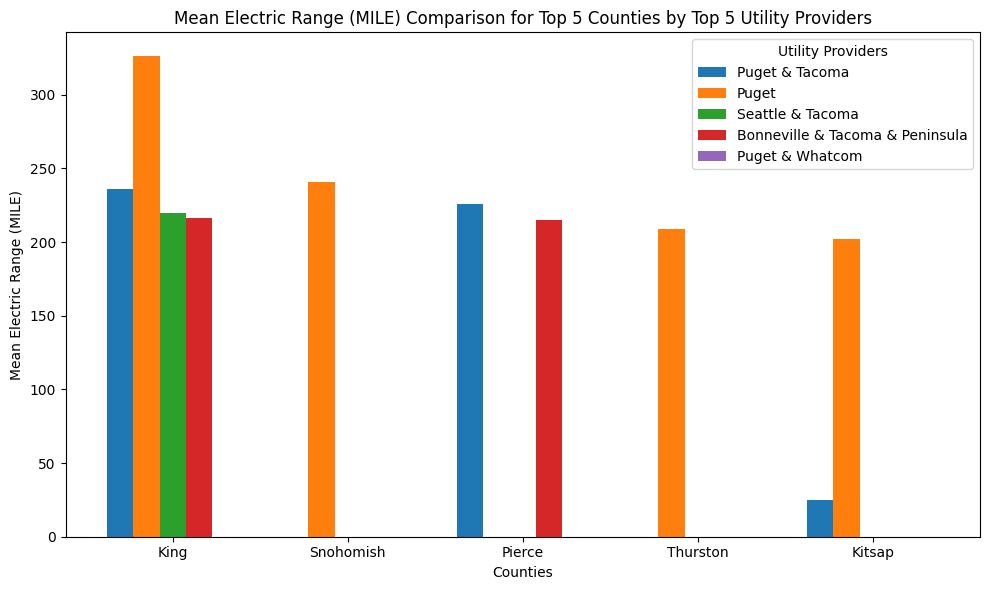

In [ ]:
utilities = ['Puget & Tacoma', 'Puget', 'Seattle & Tacoma', 'Bonneville & Tacoma & Peninsula', 'Puget & Whatcom']
counties = ['King', 'Snohomish', 'Pierce', 'Thurston', 'Kitsap']
mean_ranges = [
    [236, None, 226, None, 25],
    [326, 241, None, 209, 202],
    [220, None, None, None, None],
    [216, None, 215, None, None],
    [None, None, None, None, None]
]
bar_width = 0.15
index = np.arange(len(counties))
plt.figure(figsize=(10, 6))
for i, utility in enumerate(utilities):
    plt.bar(index + i*bar_width, [x if x is not None else 0 for x in mean_ranges[i]], bar_width, label=utility)
plt.xlabel('Counties')
plt.ylabel('Mean Electric Range (MILE)')
plt.title('Mean Electric Range (MILE) Comparison for Top 5 Counties by Top 5 Utility Providers')
plt.xticks(index + 2*bar_width, counties)
plt.legend(title='Utility Providers')
plt.tight_layout()
plt.show()


The provided bar chart visualizes the mean electric range (in miles) across five counties: King, Snohomish, Pierce, Thurston, and Kitsap. Each county is represented by a vertical bar, and the bar is segmented into different colors, each representing a different utility provider.

The height of each bar indicates the overall mean electric range for that county. It can be see that the mean electric range varies across counties, suggesting differences in the types of electric vehicles, charging infrastructure, or other potential factors.

The availablity of these providers in each counties is an interesting observation, it can be seen that no counties has all of the top 5 utility provides in them, the nearest King which has 4 out of top providers. Puget and Whatcom has no impact in these counties at all. Only Puget utility has impacted all 5 counties, in which it provides ev with a higher avg range in King county. There isnt much variation in average ranges in these counties (except in King, Puget provides utilty for higher avg range evs, and in Kitsap, Puget and Tacoma provides electric utility for a much lower avg range evs)

Now, finding top 5 ev companies, which varies among the top 5 most ev selling counties ( according to their range )

As previously analysed, the top 5 ev selling counties are:

King

Snohomish

Pierce

Thurston

Kitsap

And, the top 5 EV makers are:

TESLA        

CHEVROLET  

NISSAN      

FORD       

KIA         

Now doing furthur analysis

In [ ]:
a= king_county[king_county["Make"]=="TESLA"]["Electric Range (MILE)"].mean()
b= king_county[king_county["Make"]=="CHEVROLET"]["Electric Range (MILE)"].mean()
c= king_county[king_county["Make"]=="NISSAN"]["Electric Range (MILE)"].mean()
d= king_county[king_county["Make"]=="FORD"]["Electric Range (MILE)"].mean()
e= king_county[king_county["Make"]=="KIA"]["Electric Range (MILE)"].mean()
a,b,c,d,e

(308.85097934326393,
 195.8853004827701,
 139.6720540699383,
 191.85329642677402,
 192.64738570346046)

In [ ]:
a= snohomish_county[snohomish_county["Make"]=="TESLA"]["Electric Range (MILE)"].mean()
b= snohomish_county[snohomish_county["Make"]=="CHEVROLET"]["Electric Range (MILE)"].mean()
c= snohomish_county[snohomish_county["Make"]=="NISSAN"]["Electric Range (MILE)"].mean()
d= snohomish_county[snohomish_county["Make"]=="FORD"]["Electric Range (MILE)"].mean()
e= snohomish_county[snohomish_county["Make"]=="KIA"]["Electric Range (MILE)"].mean()
a,b,c,d,e

(311.802822646435,
 173.5728360309641,
 145.07118055555554,
 195.94197138314786,
 195.4570858283433)

In [ ]:
a= pierce_county[pierce_county["Make"]=="TESLA"]["Electric Range (MILE)"].mean()
b= pierce_county[pierce_county["Make"]=="CHEVROLET"]["Electric Range (MILE)"].mean()
c= pierce_county[pierce_county["Make"]=="NISSAN"]["Electric Range (MILE)"].mean()
d= pierce_county[pierce_county["Make"]=="FORD"]["Electric Range (MILE)"].mean()
e= pierce_county[pierce_county["Make"]=="KIA"]["Electric Range (MILE)"].mean()
a,b,c,d,e

(309.32515236369625,
 168.7605633802817,
 153.32748538011697,
 179.04615384615386,
 183.255291005291)

In [ ]:
a= thurston_county[thurston_county["Make"]=="TESLA"]["Electric Range (MILE)"].mean()
b= thurston_county[thurston_county["Make"]=="CHEVROLET"]["Electric Range (MILE)"].mean()
c= thurston_county[thurston_county["Make"]=="NISSAN"]["Electric Range (MILE)"].mean()
d= thurston_county[thurston_county["Make"]=="FORD"]["Electric Range (MILE)"].mean()
e= thurston_county[thurston_county["Make"]=="KIA"]["Electric Range (MILE)"].mean()
a,b,c,d,e

(307.1310285958173,
 194.9432146294514,
 140.88701517706576,
 217.52011095700416,
 185.83225806451614)

In [ ]:
a= kitsap_county[kitsap_county["Make"]=="TESLA"]["Electric Range (MILE)"].mean()
b= kitsap_county[kitsap_county["Make"]=="CHEVROLET"]["Electric Range (MILE)"].mean()
c= kitsap_county[kitsap_county["Make"]=="NISSAN"]["Electric Range (MILE)"].mean()
d= kitsap_county[kitsap_county["Make"]=="FORD"]["Electric Range (MILE)"].mean()
e= kitsap_county[kitsap_county["Make"]=="KIA"]["Electric Range (MILE)"].mean()
a,b,c,d,e

(305.9137529137529,
 181.8859375,
 140.5712121212121,
 178.99043062200957,
 181.22029702970298)

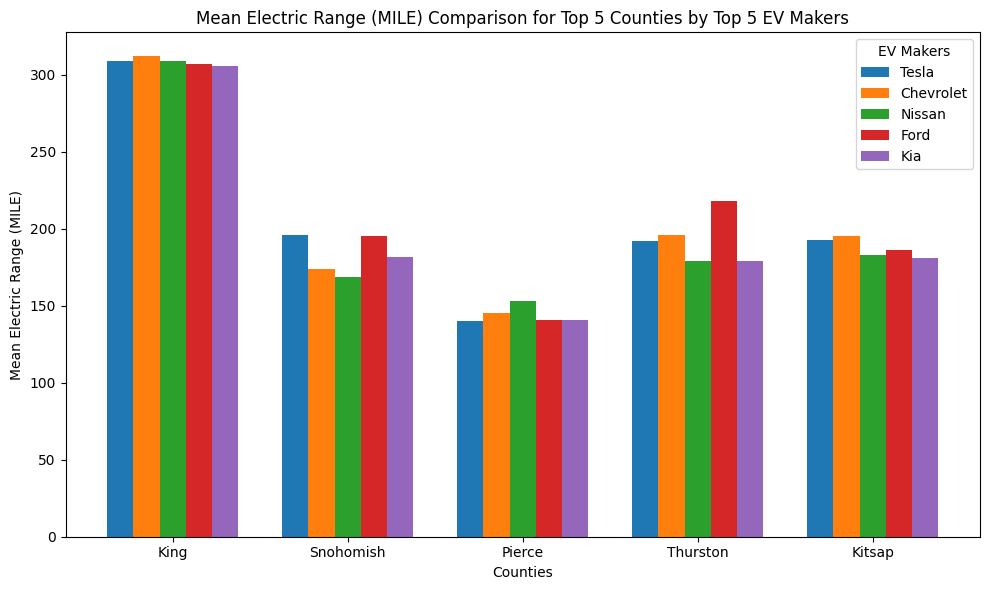

In [ ]:
makers = ['Tesla', 'Chevrolet', 'Nissan', 'Ford', 'Kia']
counties = ['King', 'Snohomish', 'Pierce', 'Thurston', 'Kitsap']
mean_ranges = [
    [309, 196, 140, 192, 193],
    [312, 174, 145, 196, 195],
    [309, 169, 153, 179, 183],
    [307, 195, 141, 218, 186],
    [306, 182, 141, 179, 181]
]
bar_width = 0.15
index = np.arange(len(counties))
plt.figure(figsize=(10, 6))
for i, utility in enumerate(makers):
    plt.bar(index + i*bar_width, [x if x is not None else 0 for x in mean_ranges[i]], bar_width, label=utility)
plt.xlabel('Counties')
plt.ylabel('Mean Electric Range (MILE)')
plt.title('Mean Electric Range (MILE) Comparison for Top 5 Counties by Top 5 EV Makers')
plt.xticks(index + 2*bar_width, counties)
plt.legend(title='EV Makers')
plt.tight_layout()
plt.show()

The bar chart presents a comparison of the mean electric range (in miles) offered by the top five EV makers across five counties: King, Snohomish, Pierce, Thurston, and Kitsap. Each county is represented by a group of bars, with each bar corresponding to a specific EV maker. The height of each bar within a group indicates the average electric range offered by that manufacturer in the respective county.

The chart reveals variations in the average electric range both across different counties and among different manufacturers. Certain manufacturers, such as Tesla, consistently offer higher average electric ranges across multiple counties, suggesting a focus on advanced technology and premium offerings. Other manufacturers, while competitive, may have lower average ranges in certain counties, potentially due to a mix of factors including model availability, pricing strategies, and regional preferences.

Top EV makers has highest ev range (avg) in King County and lowest avg range in Pierce county

Do certain electric providers  serve areas (county) with vehicles that have higher or lower electric ranges.

In [ ]:
a= PUGETandTACOMA["Electric Range (MILE)"].mean()
b= PUGET["Electric Range (MILE)"].mean()
c= SEATTLEandTACOMA["Electric Range (MILE)"].mean()
d= BONNEVILLEandTACOMAandPENNINSULA["Electric Range (MILE)"].mean()
e= PUGETandWHATCOM["Electric Range (MILE)"].mean()
a,b,c,d,e

(235.54834094160933,
 225.6136869118905,
 219.80771107857493,
 214.8292490118577,
 192.27879982479195)

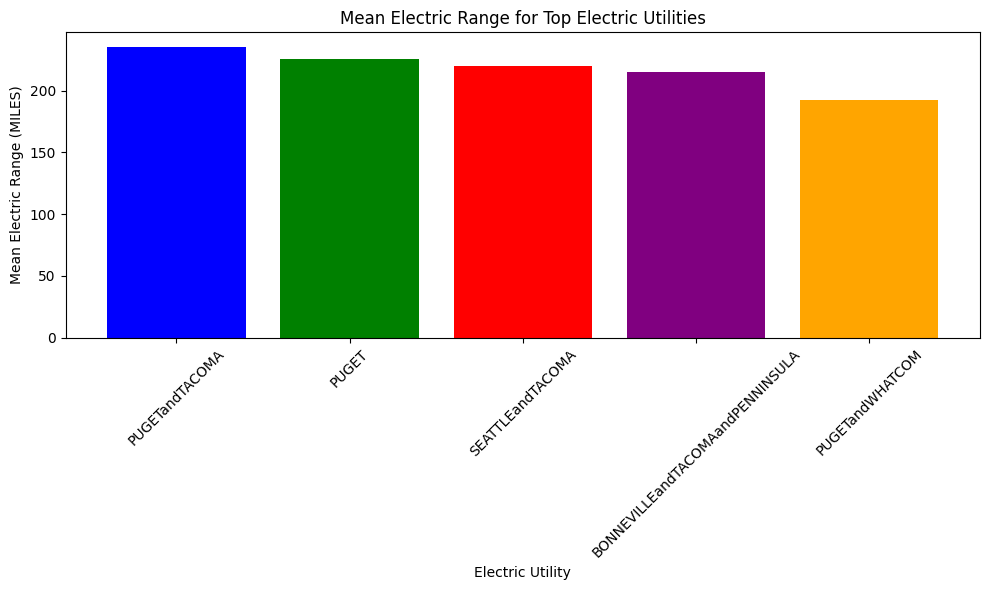

In [ ]:
utilities = ['PUGETandTACOMA', 'PUGET', 'SEATTLEandTACOMA', 'BONNEVILLEandTACOMAandPENNINSULA', 'PUGETandWHATCOM']
mean_ranges = [a, b, c, d, e]
plt.figure(figsize=(10, 6))
plt.bar(utilities, mean_ranges, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Electric Utility')
plt.ylabel('Mean Electric Range (MILES)')
plt.title('Mean Electric Range for Top Electric Utilities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the bar chart comparing the mean electric ranges of evs which uses the top five electric utilities, it can concluded that:

The mean electric range for each utility is relatively close, with 4 out of 5 utilities showing average electric ranges above 210 miles. Only Puget and Whatcom gives a lower avg range

The highest mean electric range is observed for the utility PUGET SOUND ENERGY INC and CITY OF TACOMA combined[236 Miles].

The lowest mean range is observed for PUGET SOUND ENERGY INC and Whatcom county combined [192 Miles]

Now finding, Ev makers which provides highest battery range of EVs

In [ ]:
maker_range = ev_filtered.groupby('Make')['Electric Range (MILE)'].mean()
top_5_makers = maker_range.sort_values(ascending=False).head(5)
top_5_makers

,Electric Range (MILE)
Make,
LUCID,517.473684
FISKER,342.377246
GMC,314.000000
ACURA,313.000000
RIVIAN,311.913761


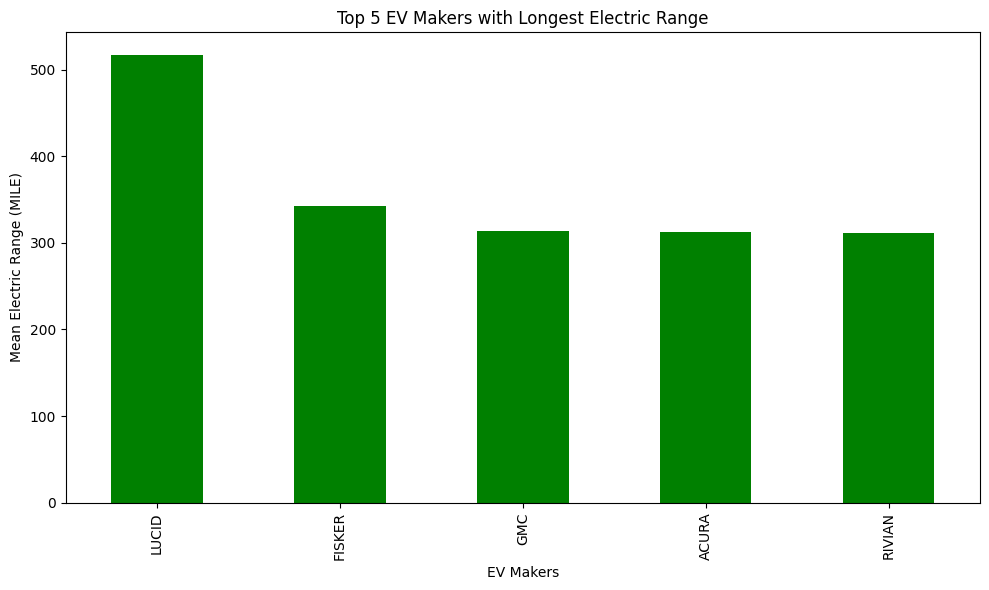

In [ ]:
top_5_makers.plot(kind='bar', color='green', figsize=(10, 6))
plt.xlabel('EV Makers')
plt.ylabel('Mean Electric Range (MILE)')
plt.title('Top 5 EV Makers with Longest Electric Range')
plt.tight_layout()
plt.show()


Therefore it can be seen that the top 5 EV makers which makes highest battery range ev's are:

LUCID	(Avg range: 517 Miles)

FISKER	(Avg range: 342 Miles)

GMC	(Avg range: 314 Miles)

ACURA	(Avg range: 313 Miles)

RIVIAN	(Avg range: 312 Miles)


Now finding Top 5 Longest Range EV Makers in Each of the Top 5 Counties

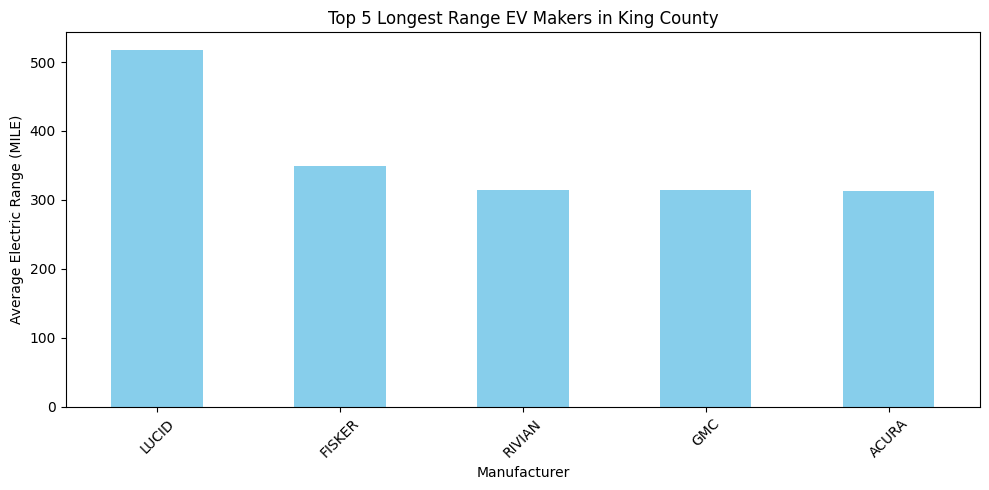

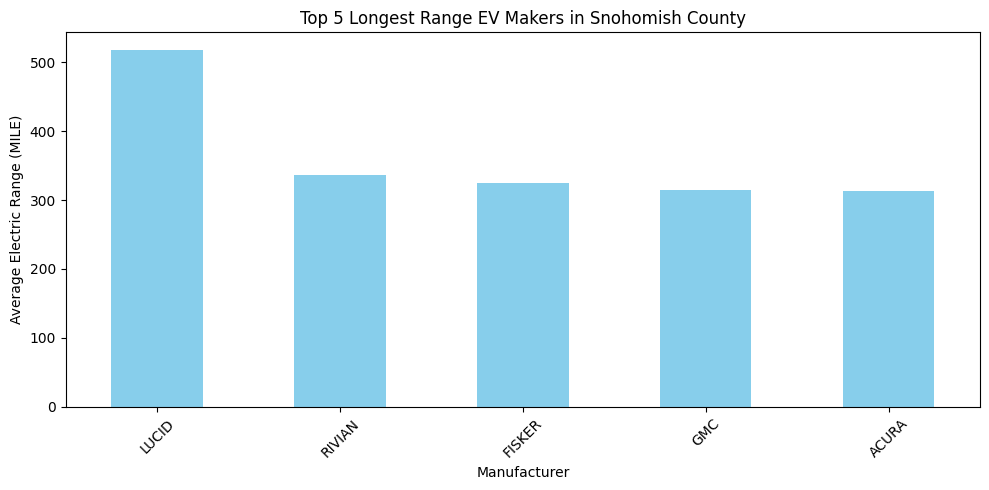

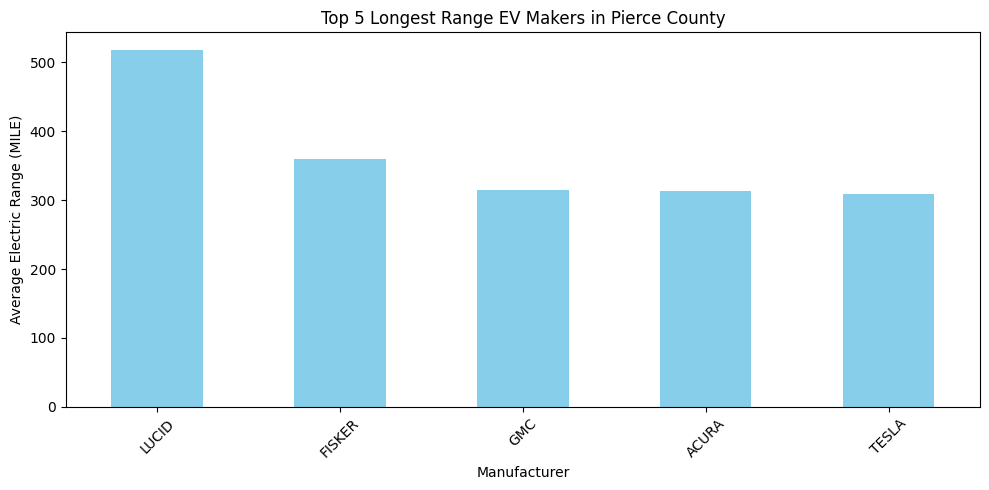

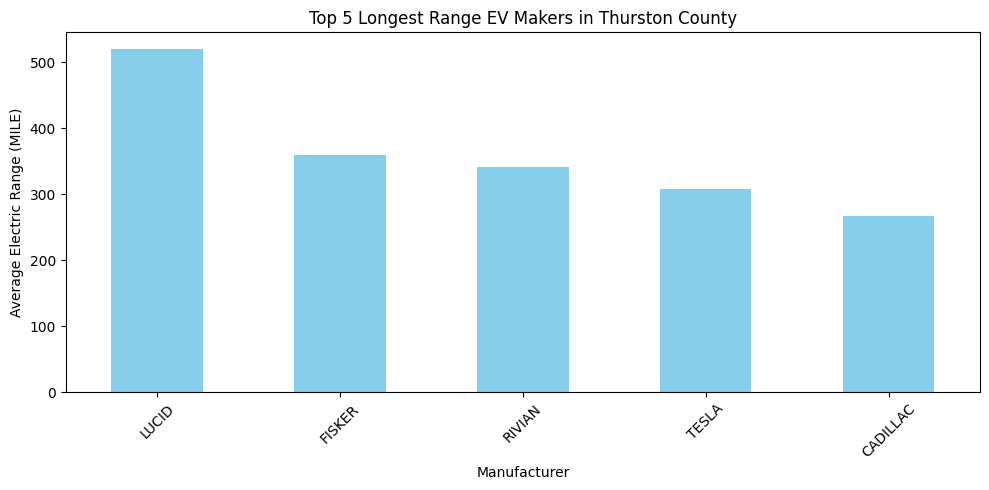

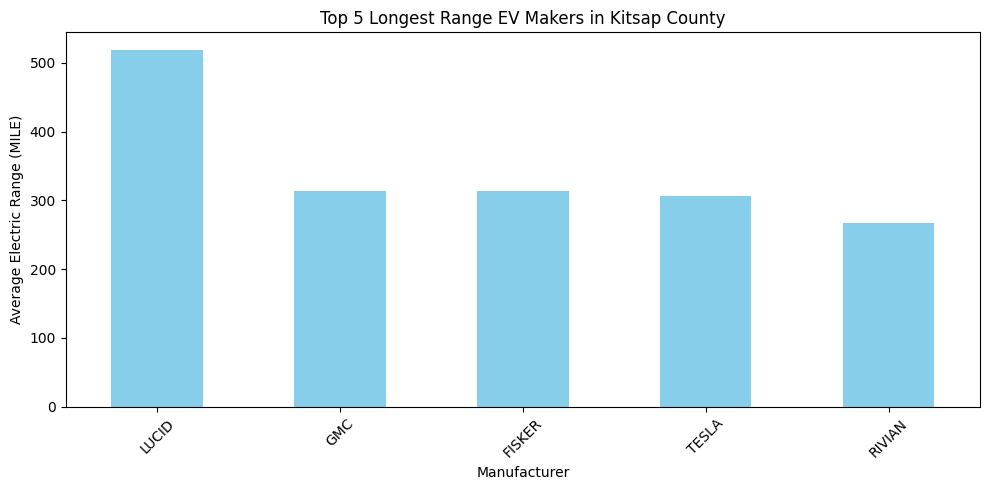

Top 5 Longest Range EV Makers in King County:
Make
LUCID     517.232558
FISKER    348.593023
RIVIAN    314.744496
GMC       314.000000
ACURA     313.000000
Name: Electric Range (MILE), dtype: float64


Top 5 Longest Range EV Makers in Snohomish County:
Make
LUCID     517.440000
RIVIAN    336.010823
FISKER    324.964286
GMC       314.000000
ACURA     313.000000
Name: Electric Range (MILE), dtype: float64


Top 5 Longest Range EV Makers in Pierce County:
Make
LUCID     517.647059
FISKER    360.000000
GMC       314.000000
ACURA     313.000000
TESLA     309.325152
Name: Electric Range (MILE), dtype: float64


Top 5 Longest Range EV Makers in Thurston County:
Make
LUCID       519.200000
FISKER      360.000000
RIVIAN      340.562500
TESLA       307.131029
CADILLAC    267.566667
Name: Electric Range (MILE), dtype: float64


Top 5 Longest Range EV Makers in Kitsap County:
Make
LUCID     518.333333
GMC       314.000000
FISKER    313.285714
TESLA     305.913753
RIVIAN    267.409594
Name: Electri

In [ ]:
top_counties = ['King', 'Snohomish', 'Pierce', 'Thurston', 'Kitsap']
top_ev_makers = {}
for county in top_counties:
    county_data = ev_filtered[ev_filtered['County'] == county]
    manufacturer_range = county_data.groupby('Make')['Electric Range (MILE)'].mean()
    top_5_makers = manufacturer_range.sort_values(ascending=False).head(5)
    top_ev_makers[county] = top_5_makers
    plt.figure(figsize=(10, 5))
    top_5_makers.plot(kind='bar', color='skyblue')
    plt.title(f'Top 5 Longest Range EV Makers in {county} County')
    plt.xlabel('Manufacturer')
    plt.ylabel('Average Electric Range (MILE)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
for county, makers in top_ev_makers.items():
    print(f"Top 5 Longest Range EV Makers in {county} County:")
    print(makers)
    print("\n")

Now finding the county with the most no. of EVs and the one with the least no. of EVs.

In [ ]:
ev_filtered['County'].value_counts().head(1)

,count
County,
King,102558


In [ ]:
ev_filtered['County'].value_counts().tail(1)

,count
County,
Garfield,3


Therefore, the county with the most no. of EVs is King ( with 102832 EVs ) and the county with the least no. of EVs is Garfield ( with 3 EVs ).

Now, finding out how many new EVs were registered in the recent 5 years(i.e 2023, 2022, 2021, 2020, 2019)

In [ ]:
num_ev_2018= len(ev_filtered[ev_filtered["Model Year"]==2018])
num_ev_2019= len(ev_filtered[ev_filtered["Model Year"]==2019])
num_ev_2020= len(ev_filtered[ev_filtered["Model Year"]==2020])
num_ev_2021 = len(ev_filtered[ev_filtered["Model Year"]==2021])
num_ev_2022= len(ev_filtered[ev_filtered["Model Year"]==2022])
num_ev_2023= len(ev_filtered[ev_filtered["Model Year"]==2023])

num_ev_2018,num_ev_2019,num_ev_2020,num_ev_2021,num_ev_2022,num_ev_2023


(13189, 9924, 11016, 17794, 25885, 54897)

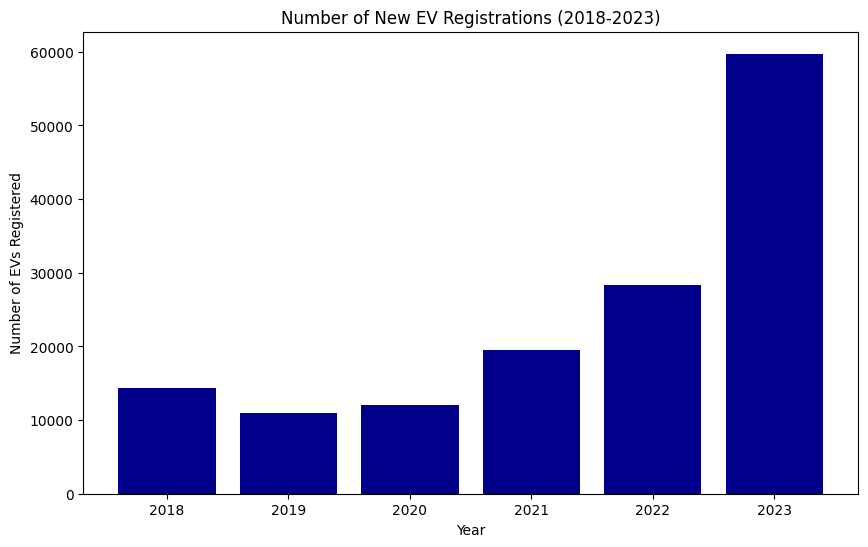

In [ ]:
years = [2018, 2019, 2020, 2021, 2022, 2023]
num_evs = [14399, 10899, 12085, 19522, 28324, 59734]
plt.figure(figsize=(10, 6))
plt.bar(years, num_evs, color='darkblue')
plt.xlabel('Year')
plt.ylabel('Number of EVs Registered')
plt.title('Number of New EV Registrations (2018-2023)')
plt.show()

The bar chart visualizes the number of new electric vehicle (EV) registrations from 2018 to 2023.

There is a clear upward trend in EV registrations over the years. This indicates growing consumer interest and adoption of electric vehicles. The year 2023 saw a substantial surge in EV registrations, suggesting a significant shift towards electric mobility.

Now, Finding out which Urban/Rural counties sells the most vehicles.

In [ ]:
ev_urban= ev_filtered[ev_filtered["Urban/Rural"]=="Urban"]
ev_rural= ev_filtered[ev_filtered["Urban/Rural"]=="Rural"]

In [ ]:
ev_urban['County'].value_counts().head(5)

,count
County,
King,102558
Snohomish,23907
Pierce,14537
Thurston,7274
Kitsap,6662


In [ ]:
ev_rural['County'].value_counts().head(5)

,count
County,
Island,2130
Skagit,2125
Chelan,1207
Yakima,1189
Clallam,1180


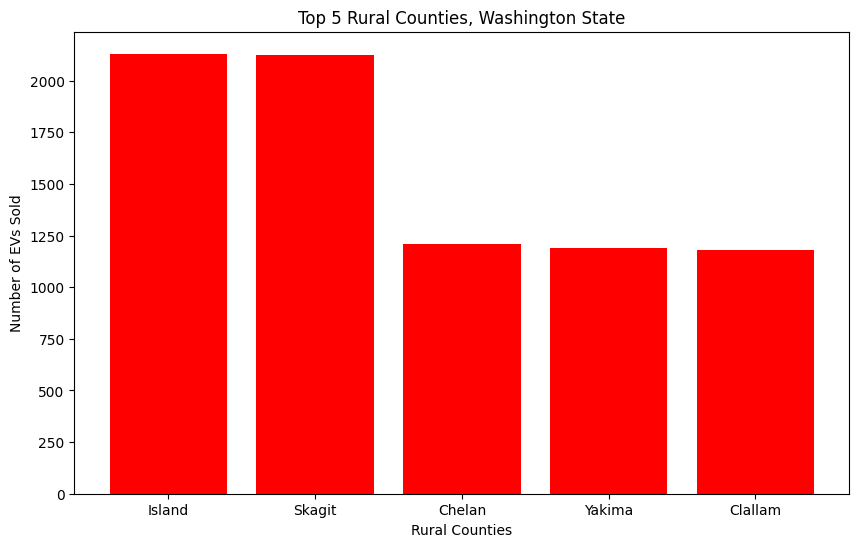

In [ ]:
rural = ['Island','Skagit','Chelan','Yakima','Clallam']
num_evs = [2130, 2125, 1207, 1189, 1180]
plt.figure(figsize=(10, 6))
plt.bar(rural, num_evs, color='Red')
plt.xlabel('Rural Counties')
plt.ylabel('Number of EVs Sold')
plt.title('Top 5 Rural Counties, Washington State')
plt.show()

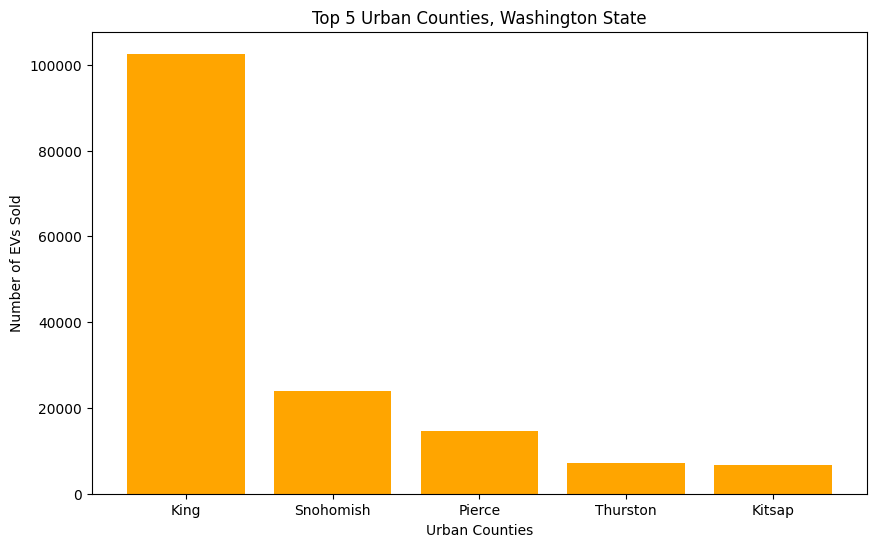

In [ ]:
urban = ['King','Snohomish','Pierce','Thurston', 'Kitsap']
num_evs = [102558, 23907, 14537, 7274, 6662]
plt.figure(figsize=(10, 6))
plt.bar(urban, num_evs, color='Orange')
plt.xlabel('Urban Counties')
plt.ylabel('Number of EVs Sold')
plt.title('Top 5 Urban Counties, Washington State')
plt.show()

The Top 5 Rural Counties where ev sold the most:
Island	(2130)

Skagit	(2125)

Chelan	(1207)

Yakima	(1189)

Clallam	(1180)


The Top 5 Urban Counties where ev sold the most:

King	    (102558)

Snohomish	(23907)

Pierce	  (14537)

Thurston (7274)

Kitsap	  (6662)



# **Company-wise analysis**

The top 5 most selling EV makers are: 'TESLA', 'CHEVROLET', 'NISSAN', 'FORD', 'KIA'

before starting the company wise analysis of these 5 EV makers, The clustering of data of these comapnies are done

In [ ]:
tesla_ev= ev_filtered[ev_filtered["Make"]=="TESLA"]
chevrolet_ev= ev_filtered[ev_filtered["Make"]=="CHEVROLET"]
nissan_ev= ev_filtered[ev_filtered["Make"]=="NISSAN"]
ford_ev= ev_filtered[ev_filtered["Make"]=="FORD"]
kia_ev= ev_filtered[ev_filtered["Make"]=="KIA"]

In [ ]:
tesla_mean_range= tesla_ev["Electric Range (MILE)"].mean()
chevrolet_mean_range= chevrolet_ev["Electric Range (MILE)"].mean()
nissan_mean_range= nissan_ev["Electric Range (MILE)"].mean()
ford_mean_range= ford_ev["Electric Range (MILE)"].mean()
kia_mean_range= kia_ev["Electric Range (MILE)"].mean()
tesla_mean_range,chevrolet_mean_range,nissan_mean_range,ford_mean_range,kia_mean_range

(308.5775801284034,
 184.4027262400606,
 139.93372260559642,
 191.52490626673807,
 188.05699547055863)

Company name: TESLA

In [ ]:
tesla_ev.shape[0]

80839

In [ ]:
a= percentage(tesla_ev.shape[0], ev_filtered.shape[0])
a

44.383623316514495

Therefore, it can be seen that in this dataset there exists 87760 Tesla evs which is 44% of total EVs

Finding out the average range of Tesla EVs

In [ ]:
tesla_mean_range

308.5775801284034

Now comparing the the average range of tesla ev to the other 4 best selling ev makers

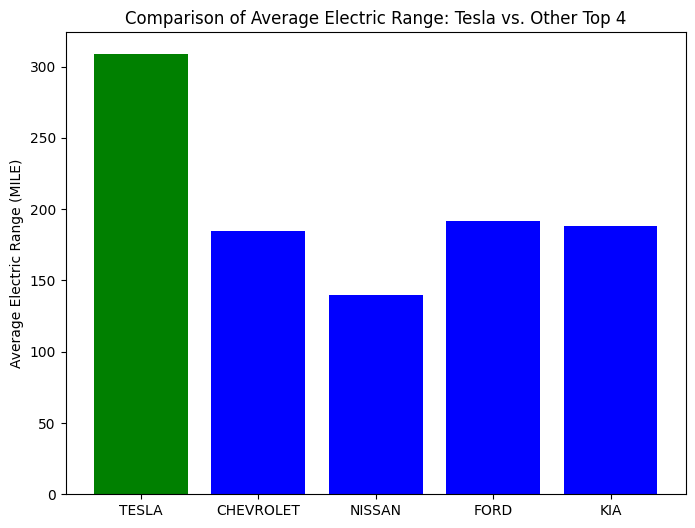

In [ ]:
top5_ev= ['TESLA', 'CHEVROLET', 'NISSAN', 'FORD', 'KIA']
mean_ranges = {
    'TESLA': tesla_mean_range,
    'CHEVROLET': chevrolet_mean_range,
    'NISSAN': nissan_mean_range,
    'FORD': ford_mean_range,
    'KIA': kia_mean_range}
plt.figure(figsize=(8, 6))
plt.bar(mean_ranges.keys(), mean_ranges.values(),  color=['green' if make == 'TESLA' else 'blue' for make in mean_ranges.keys()])
plt.ylabel('Average Electric Range (MILE)')
plt.title('Comparison of Average Electric Range: Tesla vs. Other Top 4')
plt.show()

From the above it can be seen that Tesla EVs have the highest mean range [309 Miles] than other 4 best selling ev makers.

Finding out the relationship between Model years and Battery ranges                                                              

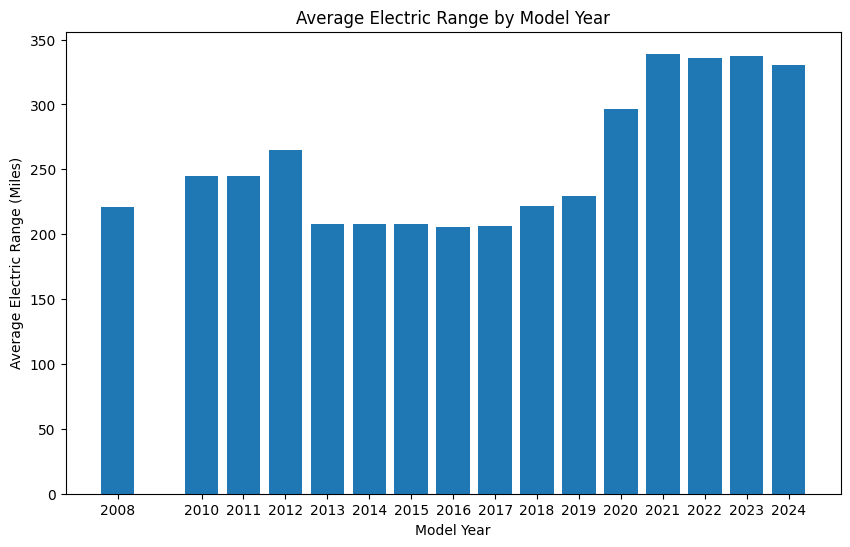

In [ ]:
tesla_range_year = tesla_ev.groupby('Model Year')['Electric Range (MILE)'].mean()
plt.figure(figsize=(10, 6))
plt.bar(tesla_range_year.index, tesla_range_year.values)
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (Miles)')
plt.title('Average Electric Range by Model Year')
plt.xticks(tesla_range_year.index, map(int, tesla_range_year.index))
plt.show()

The bar chart illustrates the average electric range of Tesla vehicles across different model years. It is evident that there has been a significant increase in the average electric range over time. This upward trend can be attributed to advancements in battery technology, improved energy efficiency, and the introduction of newer models with higher capacity batteries. The chart highlights the continuous efforts by Tesla to enhance the electric range of their vehicles, making them more practical and appealing to consumers.

Now finding the effect on sales across various model years

In [ ]:
tesla_sales_per_year = tesla_ev.groupby('Model Year').size().reset_index(name='Sales')

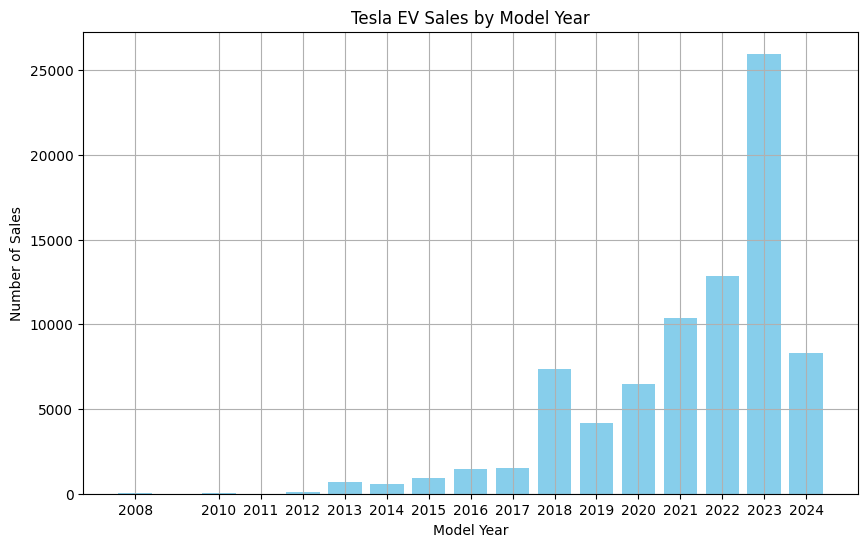

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(tesla_sales_per_year['Model Year'], tesla_sales_per_year['Sales'], color='skyblue')
plt.xlabel('Model Year')
plt.ylabel('Number of Sales')
plt.title('Tesla EV Sales by Model Year')
plt.xticks(tesla_sales_per_year['Model Year'])
plt.grid(True)
plt.show()

The bar chart effectively illustrates the rising popularity and increasing sales of Tesla vehicles over the years. It shows a clear upward trend, with a significant surge in recent years. This growth can be attributed to factors such as technological advancements in electric vehicle technology, improved battery range and charging infrastructure, and favorable government policies. Additionally, Tesla's innovative marketing strategies and strong brand image have contributed to its success. The chart highlights the company's strong position in the electric vehicle market and its potential for continued growth in the future.

Now, finding the Number of CAFV eligible ev in Tesla company

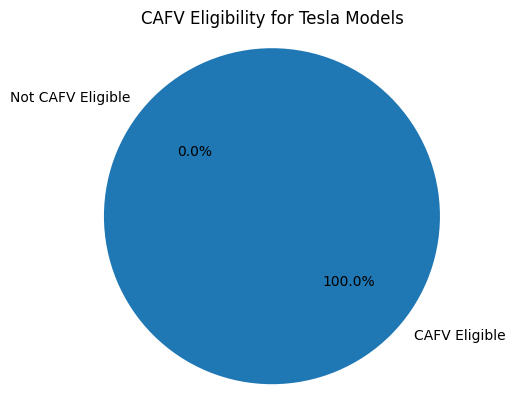

In [ ]:
tesla_cafv = tesla_ev[
    (tesla_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') |
    (tesla_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')
]
tesla_non_cafv = tesla_ev[
    (tesla_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range') |
    (tesla_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range (Manually Researched)')
]
tesla_cafv_eligible_count = tesla_cafv.shape[0]
tesla_cafv_ineligible_count = tesla_non_cafv.shape[0]
labels = ['CAFV Eligible', 'Not CAFV Eligible']
sizes = [tesla_cafv_eligible_count, tesla_cafv_ineligible_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('CAFV Eligibility for Tesla Models')
plt.show()


The above visulization shows that all the evs of Tesla are CAFV Eligible

Now finding top 5 counties where tesla evs sold the most

In [ ]:
tesla_ev['County'].value_counts().head(5)

,count
County,
King,48604
Snohomish,12258
Pierce,6071
Thurston,2343
Kitsap,2145


In [ ]:
a= percentage(tesla_ev[tesla_ev['County']=='King'].shape[0], tesla_ev.shape[0])
b= percentage(tesla_ev[tesla_ev['County']=='Snohomish'].shape[0], tesla_ev.shape[0])
c= percentage(tesla_ev[tesla_ev['County']=='Pierce'].shape[0], tesla_ev.shape[0])
d= percentage(tesla_ev[tesla_ev['County']=='Thurston'].shape[0], tesla_ev.shape[0])
e= percentage(tesla_ev[tesla_ev['County']=='Kitsap'].shape[0], tesla_ev.shape[0])
a,b,c,d,e

(60.12444488427615,
 15.16347307611425,
 7.509988990462524,
 2.8983535174853725,
 2.653422234317594)

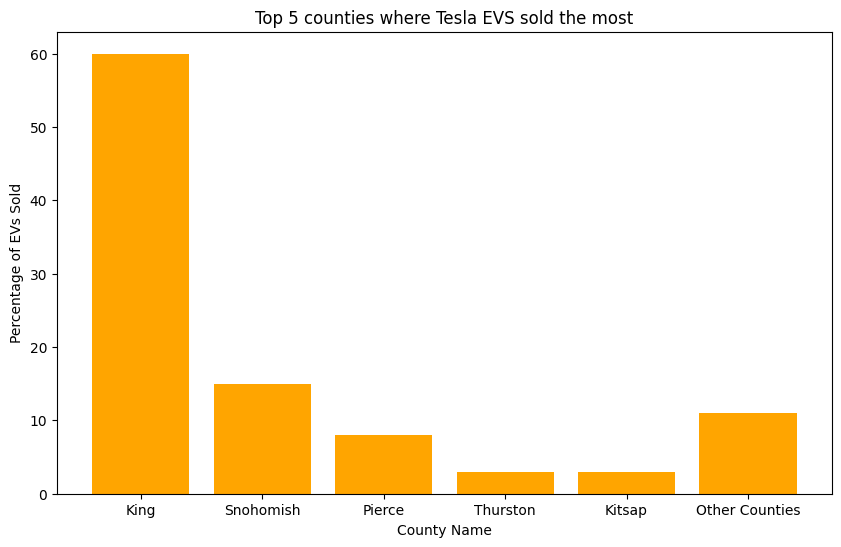

In [ ]:
county = ['King','Snohomish','Pierce','Thurston','Kitsap','Other Counties']
percentage = [60, 15, 8, 3, 3, 11]
plt.figure(figsize=(10, 6))
plt.bar(county, percentage, color='Orange')
plt.xlabel('County Name')
plt.ylabel('Percentage of EVs Sold')
plt.title('Top 5 counties where Tesla EVS sold the most')
plt.show()

From the above bar diagram it can seen that the top five counties where tesla ev were sold the most are:

King(60% of tesla ev)

Snohomish(15% of total tesla evs)

Pierce(8% of tesla evs)

Thurston(3% of tesla Evs)

Kitsap(3% of tesla evs)

Now comparing the Top range of Tesla EV with the other top 4 best selling EV Makers

In [ ]:
a=tesla_ev['Electric Range (MILE)'].max()
b= chevrolet_ev['Electric Range (MILE)'].max()
c= nissan_ev['Electric Range (MILE)'].max()
d= ford_ev['Electric Range (MILE)'].max()
e= kia_ev['Electric Range (MILE)'].max()
a,b,c,d,e

(405, 450, 304, 320, 310)

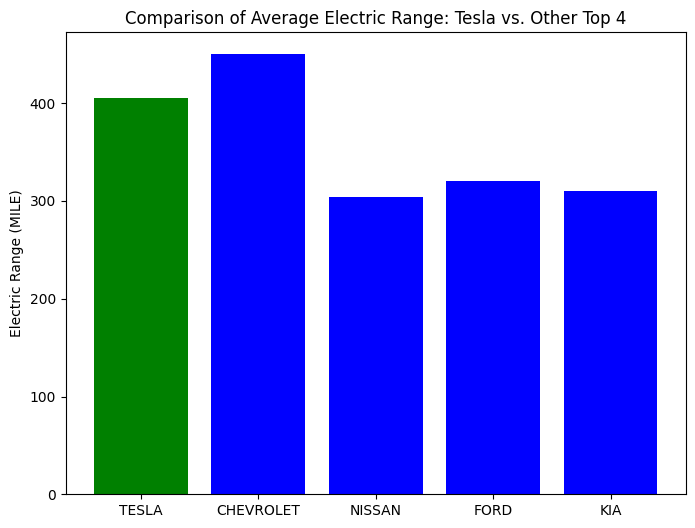

In [ ]:
top5_ev= ['TESLA', 'CHEVROLET', 'NISSAN', 'FORD', 'KIA']
ranges = [405,450,304,320,310]
plt.figure(figsize=(8, 6))
plt.bar(top5_ev, ranges,  color=['green' if make == 'TESLA' else 'blue' for make in top5_ev])
plt.ylabel('Electric Range (MILE)')
plt.title('Comparison of Average Electric Range: Tesla vs. Other Top 4')
plt.show()
plt.show()

From the above bar chart it can be seen that Tesla has the second highest battery range (405 Miles) after Chevrolet (450 Miles)

Now, finding The top 5 best selling Models of Tesla EV's

In [ ]:
tesla_ev['Model'].value_counts().head(5)

,count
Model,
MODEL Y,38845
MODEL 3,28815
MODEL S,7088
MODEL X,5709
CYBERTRUCK,335


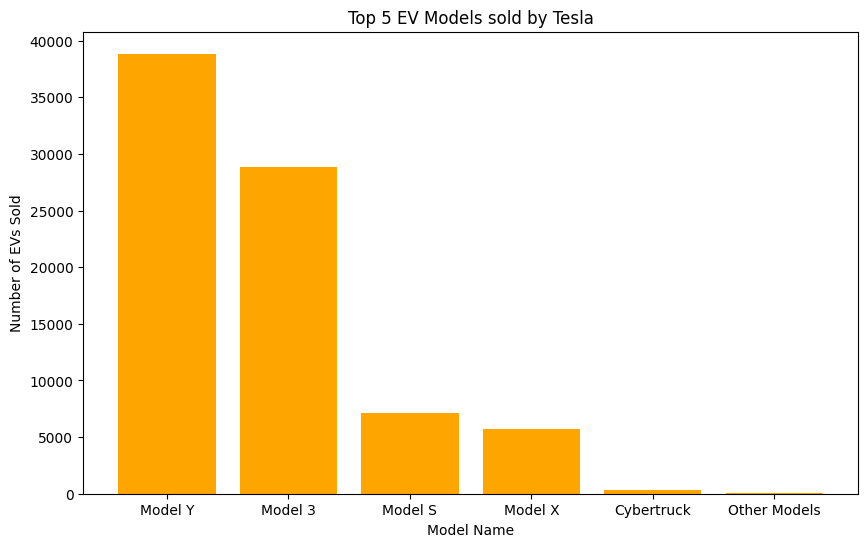

In [ ]:
model = ['Model Y','Model 3','Model S','Model X','Cybertruck','Other Models']
num_evs = [38845, 28815, 7088, 5709, 335, 47]
plt.figure(figsize=(10, 6))
plt.bar(model, num_evs, color='Orange')
plt.xlabel('Model Name')
plt.ylabel('Number of EVs Sold')
plt.title('Top 5 EV Models sold by Tesla')
plt.show()

In [ ]:
def percentage(a,b):
  return (a/b)*100

In [ ]:
model_y= tesla_ev[tesla_ev["Model"]=="MODEL Y"]
a= percentage(model_y.shape[0], tesla_ev.shape[0])
a

48.0523014881431

Therefore it can be seen that the top 5 best selling models of tesla were:

Model y

Model 3

Model S

Model X

Cybertruck


The model 'Model Y' is the best selling model of tesla company, which is 48% of total tesla ev sold.

Now, Comparing Model Y's Electric range to their respective model years

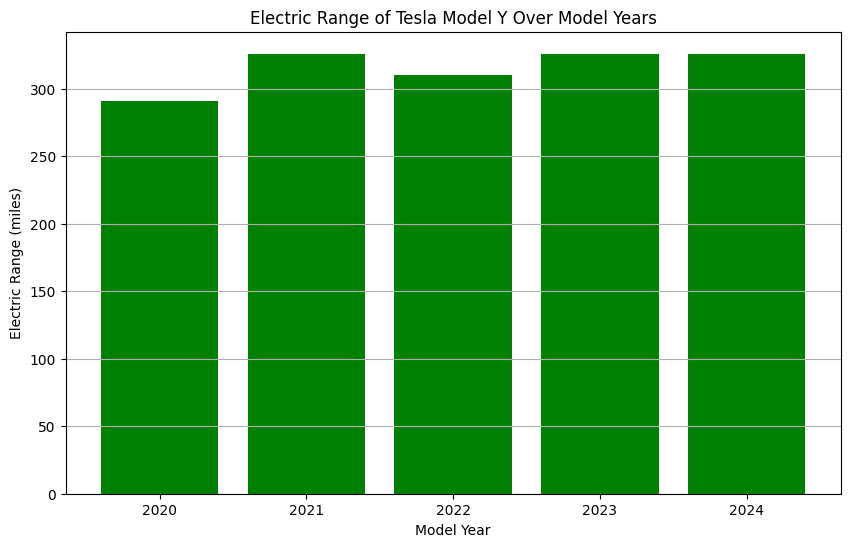

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_y['Model Year'], model_y['Electric Range (MILE)'], color='green')
plt.title('Electric Range of Tesla Model Y Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.grid(axis='y')
plt.show()

The bar chart illustrates the increasing electric range of Tesla Model Y over the years 2020 to 2024. Each bar represents a specific model year, and its height corresponds to the average electric range for that year. The chart clearly shows a consistent upward trend, indicating that Tesla has successfully improved the battery technology and overall efficiency of the Model Y. This trend is likely driven by advancements in battery chemistry, improved energy density, and optimized vehicle aerodynamics.

Now, finding which Electric Provider provides the most for tesla ev

In [ ]:
tesla_ev["Electric Utility"].value_counts().head(5)

,count
Electric Utility,
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),37510
PUGET SOUND ENERGY INC,17780
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),13566
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY,3557
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY,1355


In [ ]:
def percentage(a,b):
  return (a/b)*100

In [ ]:
a= percentage(tesla_ev[tesla_ev["Electric Utility"]=="PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)"].shape[0], tesla_ev.shape[0])
b= percentage(tesla_ev[tesla_ev["Electric Utility"]=="PUGET SOUND ENERGY INC"].shape[0], tesla_ev.shape[0])
c= percentage(tesla_ev[tesla_ev["Electric Utility"]=="CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)"].shape[0], tesla_ev.shape[0])
d= percentage(tesla_ev[tesla_ev["Electric Utility"]=="BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY"].shape[0], tesla_ev.shape[0])
e= percentage(tesla_ev[tesla_ev["Electric Utility"]=="PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY"].shape[0], tesla_ev.shape[0])
a,b,c,d,e

(46.4008708667846,
 21.994334417793393,
 16.781503977040785,
 4.400103910241344,
 1.6761711550118137)

In [ ]:
a = tesla_ev[tesla_ev["Electric Utility"] == "PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)"]
b = tesla_ev[tesla_ev["Electric Utility"] == "PUGET SOUND ENERGY INC"]
c = tesla_ev[tesla_ev["Electric Utility"] == "CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)"]
d = tesla_ev[tesla_ev["Electric Utility"] == "BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY"]
e = tesla_ev[tesla_ev["Electric Utility"] == "PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY"]
print(a['Electric Utility Type'].unique())
print(b['Electric Utility Type'].unique())
print(c['Electric Utility Type'].unique())
print(d['Electric Utility Type'].unique())
print(e['Electric Utility Type'].unique())

['Investor Owned, Municipal']
['Investor Owned']
['Municipal, Municipal']
['Federal, Municipal, Cooperative']
['Investor Owned, Political Subdivision']


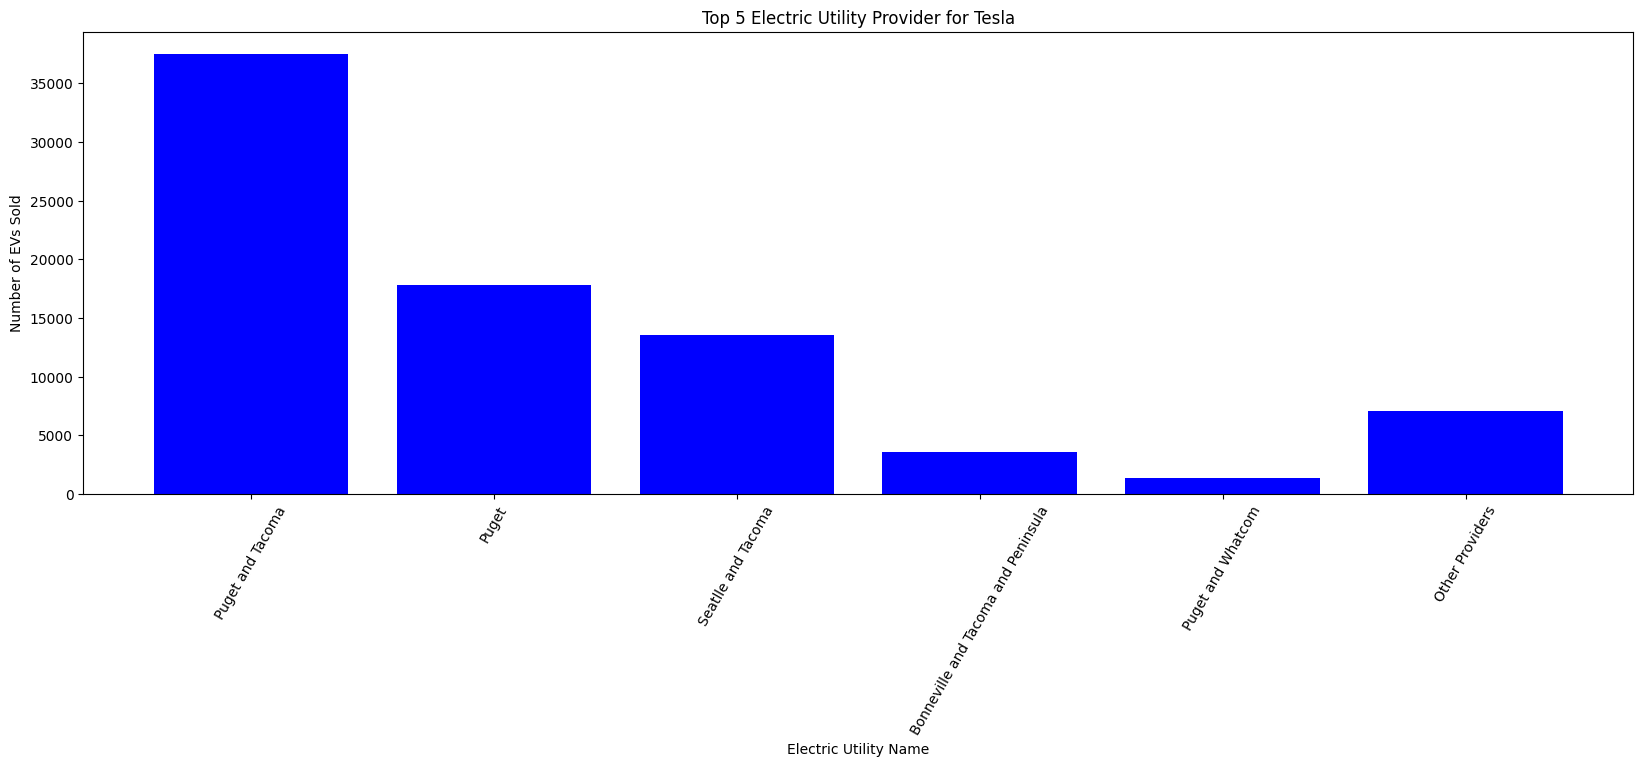

In [ ]:
electric_utility =['Puget and Tacoma','Puget','Seatlle and Tacoma','Bonneville and Tacoma and Peninsula','Puget and Whatcom', 'Other Providers']
num_evs = [37510, 17780, 13566, 3557, 1355, 7071]
plt.figure(figsize=(20, 6))
plt.bar(electric_utility, num_evs, color='Blue')
plt.xlabel('Electric Utility Name')
plt.xticks(rotation=60)
plt.ylabel('Number of EVs Sold')
plt.title('Top 5 Electric Utility Provider for Tesla')
plt.show()

Therefore it can be that the top 5 electric utility providers are:

"PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)"['Investor Owned, Municipal']

"PUGET SOUND ENERGY INC"['Investor Owned']

"CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)"['Municipal, Municipal']

"BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY"['Federal, Municipal, Cooperative']

"PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY"['Investor Owned, Political Subdivision']


Now, finding whether newer models of tesla are more cafv eligible or not

In this scenario, This question is invalid because in this dataset, all tesla models are CAFV eligible

Now finding which type of counties prefer tesla ev's the most

In [ ]:
tesla_urban= tesla_ev[tesla_ev["Urban/Rural"]=="Urban"]
tesla_rural= tesla_ev[tesla_ev["Urban/Rural"]=="Rural"]
a= percentage(tesla_urban.shape[0], tesla_ev.shape[0])
b= percentage(tesla_rural.shape[0], tesla_ev.shape[0])
a,b

(93.05780625688097, 6.942193743119039)

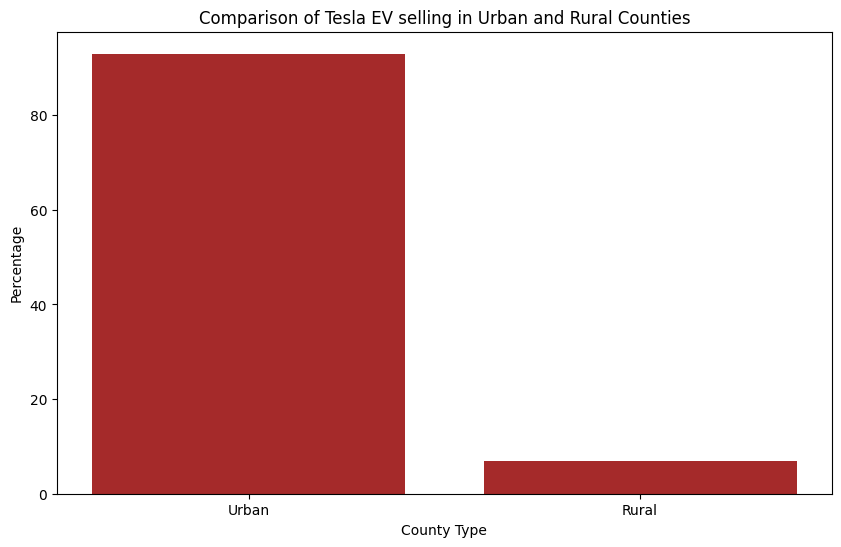

In [ ]:
county_type =['Urban', 'Rural']
percentage = [93, 7]
plt.figure(figsize=(10, 6))
plt.bar(county_type, percentage, color='Brown')
plt.xlabel('County Type')
plt.ylabel('Percentage')
plt.title('Comparison of Tesla EV selling in Urban and Rural Counties')
plt.show()

Therefore, it can be seen that Urban counties prefer tesla ev's than rural counties

Company Name: Chevrolet

In [ ]:
chevrolet_ev.shape[0]

13205

In [ ]:
def percentage(a,b):
  return (a/b)*100

In [ ]:
a= percentage(chevrolet_ev.shape[0], ev_filtered.shape[0])
a

7.250037060015263

Finding out the average range of Chevrolet EVs

In [ ]:
chevrolet_mean_range

184.4027262400606

Now comparing the average range of Chevrolet EV with the other 4 best selling EV makers.

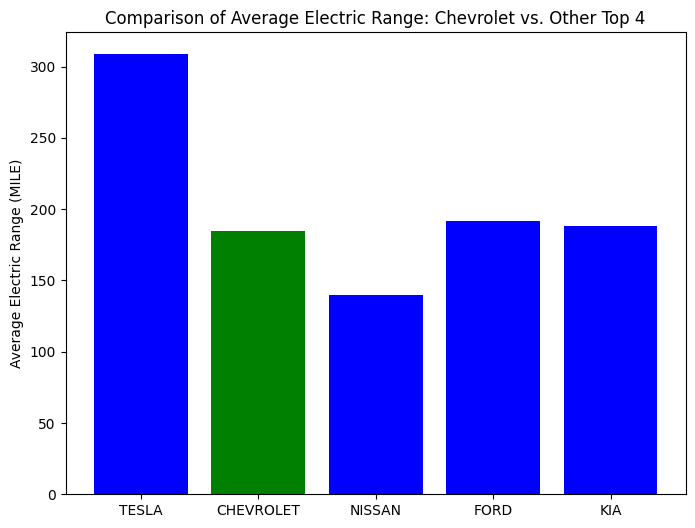

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(mean_ranges.keys(), mean_ranges.values(),  color=['green' if make == 'CHEVROLET' else 'blue' for make in mean_ranges.keys()])
plt.ylabel('Average Electric Range (MILE)')
plt.title('Comparison of Average Electric Range: Chevrolet vs. Other Top 4')
plt.show()

Therefore it can be seen that among the top 5 avg range ev makers, Chevrolet has the 4th highest mean electric range [184 Miles]

Finding out the relationship between Model years and Battery ranges.

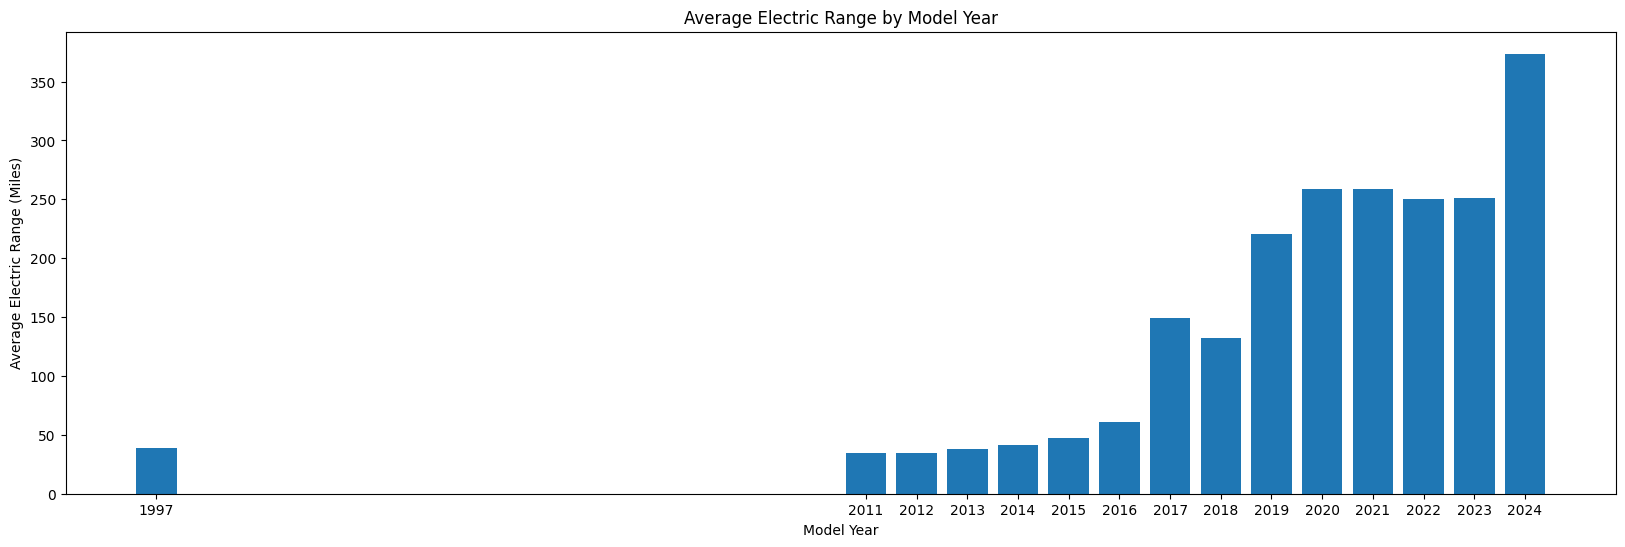

In [ ]:
chevrolet_range_year = chevrolet_ev.groupby('Model Year')['Electric Range (MILE)'].mean()
plt.figure(figsize=(20, 6))
plt.bar(chevrolet_range_year.index, chevrolet_range_year.values)
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (Miles)')
plt.title('Average Electric Range by Model Year')
plt.xticks(chevrolet_range_year.index, map(int, chevrolet_range_year.index))
plt.show()

The bar chart illustrates the average electric range of Chevrolet vehicles across different model years. We can observe a significant upward trend in electric range over time. This indicates that Chevrolet has made significant strides in improving battery technology, vehicle efficiency, and overall electric range. The increasing bar heights represent the gradual enhancement in electric range, making Chevrolet electric vehicles more practical and appealing to consumers. This trend aligns with the broader industry trend of improving electric vehicle technology and addressing range anxiety.

Now finding the effect of sales across different model years.

In [ ]:
chevrolet_sales_per_year = chevrolet_ev.groupby('Model Year').size().reset_index(name='Sales')

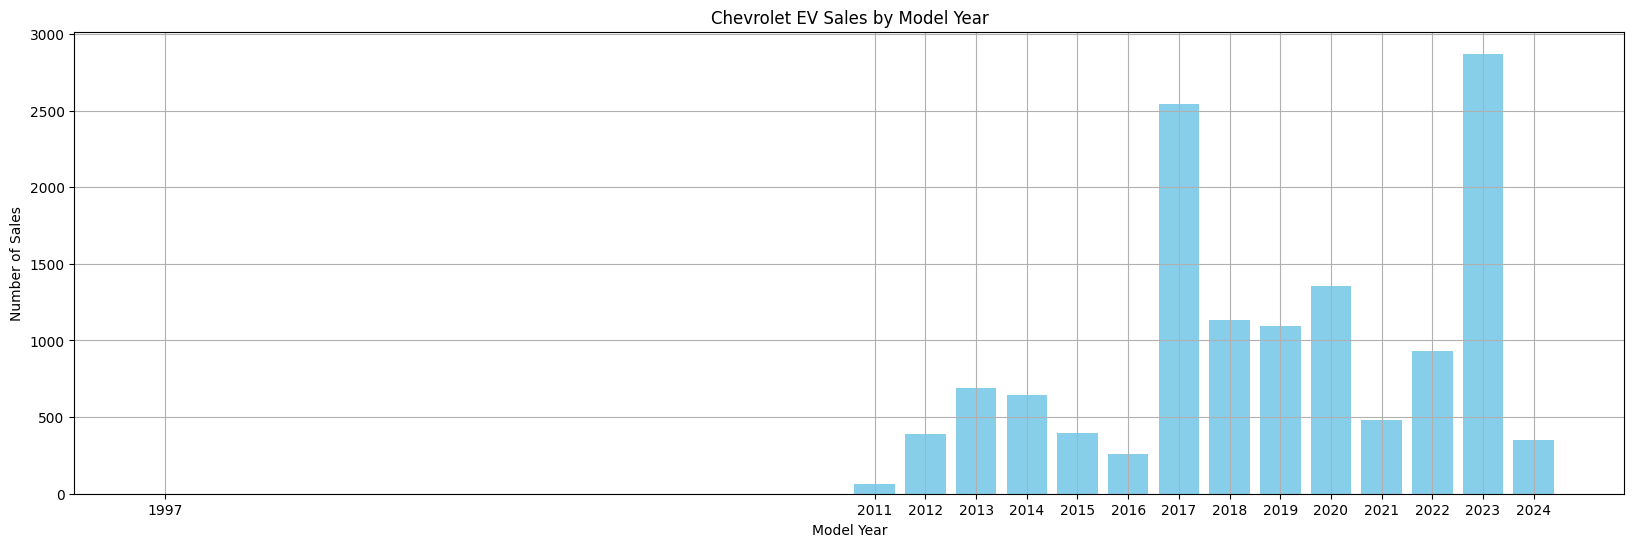

In [ ]:
plt.figure(figsize=(20, 6))
plt.bar(chevrolet_sales_per_year['Model Year'], chevrolet_sales_per_year['Sales'], color='skyblue')
plt.xlabel('Model Year')
plt.ylabel('Number of Sales')
plt.title('Chevrolet EV Sales by Model Year')
plt.xticks(chevrolet_sales_per_year['Model Year'])
plt.grid(True)
plt.show()

The bar chart illustrates the sales of Chevrolet electric vehicles across different model years. We can observe a significant increase in sales over time, with a particularly strong surge in recent years. This growth can be attributed to several factors, including advancements in electric vehicle technology, increased consumer awareness and acceptance, and supportive government policies. The chart highlights the increasing popularity and market penetration of Chevrolet electric vehicles, demonstrating the growing demand for sustainable transportation options.

Now finding the number of CAFV eligible EV in the Chevrolet company

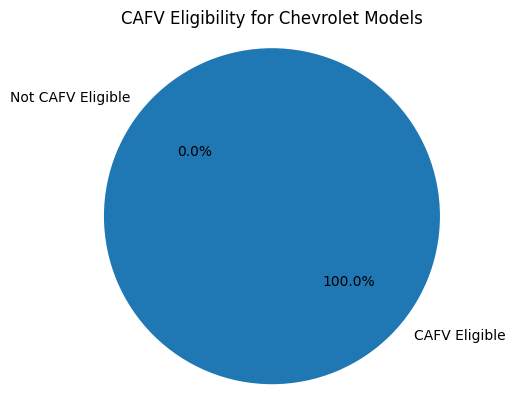

In [ ]:
chevrolet_cafv = chevrolet_ev[
    (chevrolet_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') |
    (chevrolet_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')
]

chevrolet_non_cafv = chevrolet_ev[
    (chevrolet_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range') |
    (chevrolet_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range (Manually Researched)')
]
chevrolet_cafv_eligible_count = chevrolet_cafv.shape[0]
chevrolet_cafv_ineligible_count = chevrolet_non_cafv.shape[0]
labels = ['CAFV Eligible', 'Not CAFV Eligible']
sizes = [chevrolet_cafv_eligible_count, chevrolet_cafv_ineligible_count]
if sum(sizes) == 0:
    print("No data available for pie chart.")
else:
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('CAFV Eligibility for Chevrolet Models')
    plt.show()


Therefore, it can be said that all the evs of chevrolet were CAFV eligible

Now finding top 5 counties where Chevrolet evs sold the most

In [ ]:
chevrolet_ev['County'].value_counts().head(5)

,count
County,
King,6007
Snohomish,1421
Pierce,1136
Thurston,1039
Kitsap,640


In [ ]:
a= percentage(chevrolet_ev[chevrolet_ev['County']=='King'].shape[0],chevrolet_ev.shape[0])
b= percentage(chevrolet_ev[chevrolet_ev['County']=='Snohomish'].shape[0], chevrolet_ev.shape[0])
c= percentage(chevrolet_ev[chevrolet_ev['County']=='Pierce'].shape[0], chevrolet_ev.shape[0])
d= percentage(chevrolet_ev[chevrolet_ev['County']=='Thurston'].shape[0], chevrolet_ev.shape[0])
e= percentage(chevrolet_ev[chevrolet_ev['County']=='Kitsap'].shape[0], chevrolet_ev.shape[0])
a,b,c,d,e

(45.4903445664521,
 10.761075350246118,
 8.602801968951153,
 7.8682317304051494,
 4.8466489965922)

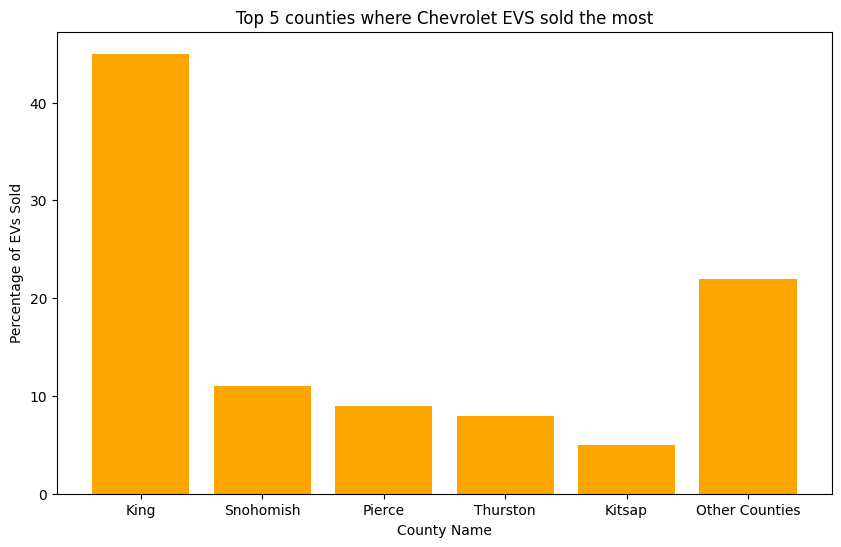

In [ ]:
county = ['King','Snohomish','Pierce','Thurston','Kitsap','Other Counties']
percentage = [45, 11, 9, 8, 5, 22]
plt.figure(figsize=(10, 6))
plt.bar(county, percentage, color='Orange')
plt.xlabel('County Name')
plt.ylabel('Percentage of EVs Sold')
plt.title('Top 5 counties where Chevrolet EVS sold the most')
plt.show()

Therefore it can be said the top 5 counties where Chevrolet evs sold the most:

King	[6007][45%]

Snohomish	[1421][11%]

Pierce	[1136][9%]

Thurston	[1039][8%]

Kitsap	[640][5%]


Now comparing the Top range of Chevrolet EV with the other top 4 best selling
EV Makers

In [ ]:
a=tesla_ev['Electric Range (MILE)'].max()
b= chevrolet_ev['Electric Range (MILE)'].max()
c= nissan_ev['Electric Range (MILE)'].max()
d= ford_ev['Electric Range (MILE)'].max()
e= kia_ev['Electric Range (MILE)'].max()
a,b,c,d,e

(405, 450, 304, 320, 310)

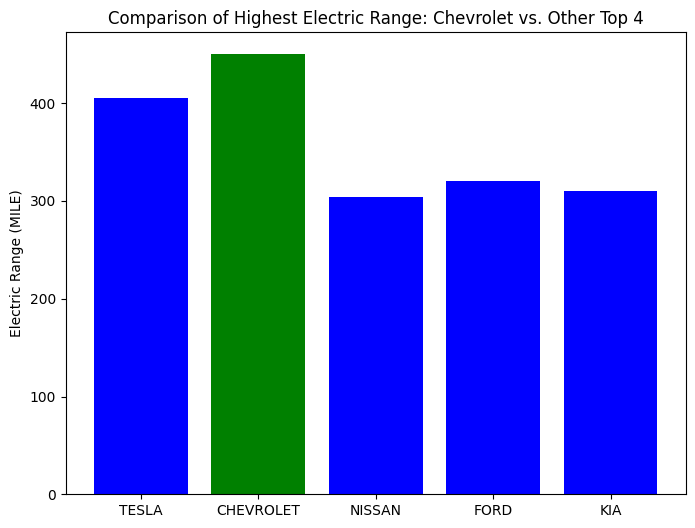

In [ ]:
top5_ev= ['TESLA', 'CHEVROLET', 'NISSAN', 'FORD', 'KIA']
ranges = [405,450,304,320,310]
plt.figure(figsize=(8, 6))
plt.bar(top5_ev, ranges,  color=['green' if make == 'CHEVROLET' else 'blue' for make in top5_ev])
plt.ylabel('Electric Range (MILE)')
plt.title('Comparison of Highest Electric Range: Chevrolet vs. Other Top 4')
plt.show()
plt.show()

From the above bar diagram it can be seen that Chevrolet has the highest electric range model among the top 5 best selling ev makers.

Now finding top 5 best selling models of Chevrolet EVs

In [ ]:
chevrolet_ev['Model'].value_counts().head(5)

,count
Model,
BOLT EV,6004
VOLT,4218
BOLT EUV,2430
SPARK,203
BLAZER EV,176


In [ ]:
chevrolet_ev['Model'].value_counts()

,count
Model,
BOLT EV,6004
VOLT,4218
BOLT EUV,2430
SPARK,203
BLAZER EV,176
SILVERADO EV,139
EQUINOX EV,34
S-10 PICKUP,1


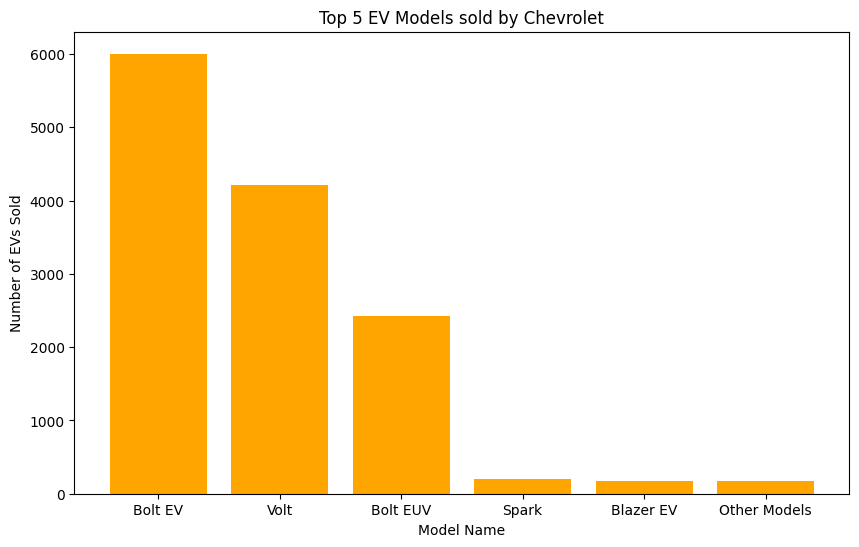

In [ ]:
model = ['Bolt EV','Volt','Bolt EUV','Spark','Blazer EV','Other Models']
num_evs = [6004, 4218, 2430, 203, 176, 174]
plt.figure(figsize=(10, 6))
plt.bar(model, num_evs, color='Orange')
plt.xlabel('Model Name')
plt.ylabel('Number of EVs Sold')
plt.title('Top 5 EV Models sold by Chevrolet')
plt.show()

In [ ]:
def percentage(a,b):
  return (a/b)*100

In [ ]:
bolt_ev= chevrolet_ev[chevrolet_ev["Model"]=="BOLT EV"]
a= percentage(bolt_ev.shape[0], chevrolet_ev.shape[0])
a

45.46762589928058

Therefore it can be seen that the top 5 best selling models of Chevrolet are:

BOLT EV	(6004)

VOLT	(4218)

BOLT EUV	(2430)

SPARK	(203)

BLAZER EV	(17)

The BOLT EV model is the highest selling model of Chevrolet, containing 45% of total Chevrolet evs

Now, comparing Bolt EV's electric range to their model years.

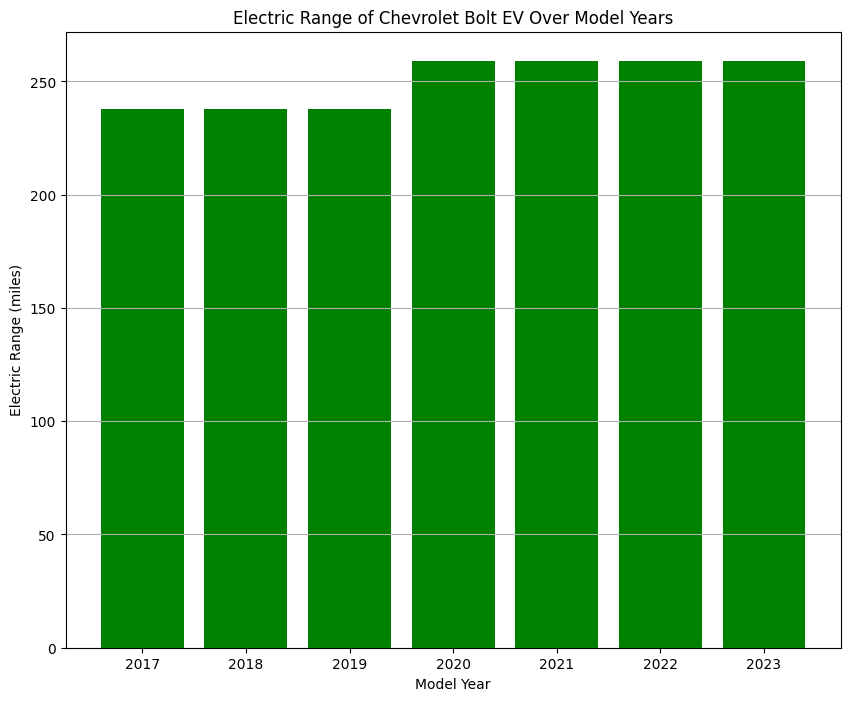

In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(bolt_ev['Model Year'], bolt_ev['Electric Range (MILE)'], color='green')
plt.title('Electric Range of Chevrolet Bolt EV Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.grid(axis='y')
plt.show()

The bar chart illustrates the increasing electric range of the Chevrolet Bolt EV over the years 2017 to 2023. The height of each bar represents the average electric range for a specific model year. It is evident that Chevrolet has made significant strides in improving the electric range of the Bolt EV, with each subsequent model year offering a longer range. This upward trend can be attributed to advancements in battery technology, improved efficiency, and other technological enhancements. The chart effectively demonstrates the progress made by Chevrolet in the electric vehicle market and the increasing practicality of electric cars.

Now, finding which Electric Utility Provider provides most for Chevrolet EVs

In [ ]:
chevrolet_ev["Electric Utility"].value_counts().head(5)

,count
Electric Utility,
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),3708
PUGET SOUND ENERGY INC,3472
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),2699
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY,754
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY,473


In [ ]:
a= percentage(chevrolet_ev[chevrolet_ev["Electric Utility"]=="PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)"].shape[0], chevrolet_ev.shape[0])
b= percentage(chevrolet_ev[chevrolet_ev["Electric Utility"]=="PUGET SOUND ENERGY INC"].shape[0], chevrolet_ev.shape[0])
c= percentage(chevrolet_ev[chevrolet_ev["Electric Utility"]=="CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)"].shape[0], chevrolet_ev.shape[0])
d= percentage(chevrolet_ev[chevrolet_ev["Electric Utility"]=="BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY"].shape[0], chevrolet_ev.shape[0])
e= percentage(chevrolet_ev[chevrolet_ev["Electric Utility"]=="PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY"].shape[0], chevrolet_ev.shape[0])
a,b,c,d,e

(28.08027262400606,
 26.293070806512688,
 20.439227565316166,
 5.7099583491101855,
 3.581976524043923)

In [ ]:
a = nissan_ev[nissan_ev["Electric Utility"] == "PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)"]
b = nissan_ev[nissan_ev["Electric Utility"] == "PUGET SOUND ENERGY INC"]
c = nissan_ev[nissan_ev["Electric Utility"] == "CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)"]
d = nissan_ev[nissan_ev["Electric Utility"] == "BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY"]
e = nissan_ev[nissan_ev["Electric Utility"] == "PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY"]
print(a['Electric Utility Type'].unique())
print(b['Electric Utility Type'].unique())
print(c['Electric Utility Type'].unique())
print(d['Electric Utility Type'].unique())
print(e['Electric Utility Type'].unique())

['Investor Owned, Municipal']
['Investor Owned']
['Municipal, Municipal']
['Federal, Municipal, Cooperative']
['Investor Owned, Political Subdivision']


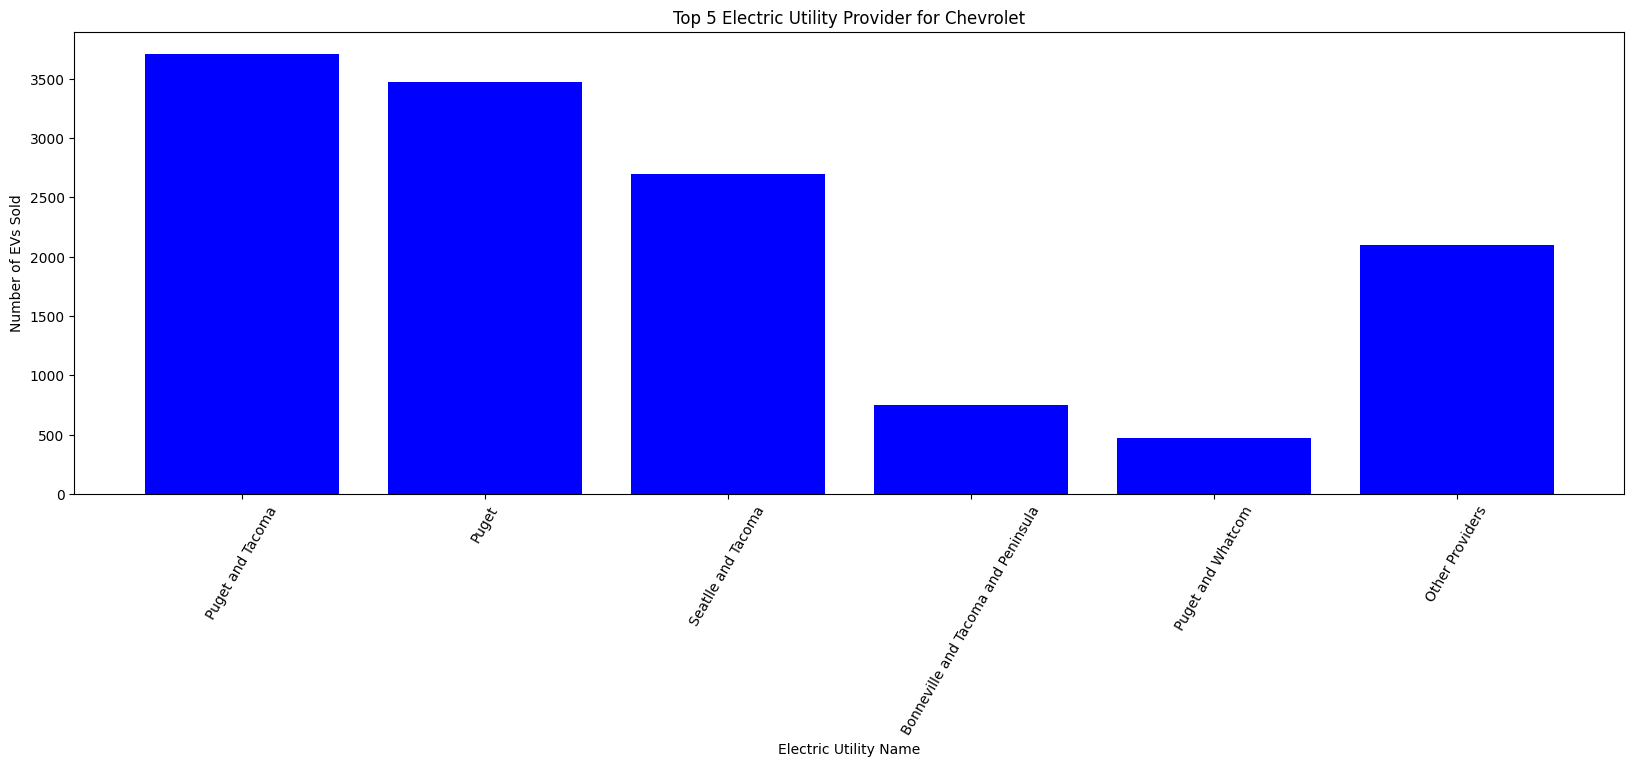

In [ ]:
electric_utility =['Puget and Tacoma','Puget','Seatlle and Tacoma','Bonneville and Tacoma and Peninsula', 'Puget and Whatcom', 'Other Providers']
num_evs = [3708, 3472, 2699, 754, 473, 2099]
plt.figure(figsize=(20, 6))
plt.bar(electric_utility, num_evs, color='Blue')
plt.xlabel('Electric Utility Name')
plt.xticks(rotation=60)
plt.ylabel('Number of EVs Sold')
plt.title('Top 5 Electric Utility Provider for Chevrolet')
plt.show()

The bar chart visualizes the top 5 electric utility providers for Chevrolet in terms of the number of electric vehicles sold. It shows that "PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)a" is the leading utility provider, followed by "PUGET SOUND ENERGY INC" and "CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)." Other providers, including "BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY," "PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY" have significantly lower sales compared to the top three. This suggests that the first three utility providers have a strong influence on Chevrolet's electric vehicle sales, possibly due to factors such as extensive charging infrastructure, supportive policies, or strong consumer demand in their respective service areas.

Now finding if newer models of Chevrolet are more CAFV eligible or not.

In this case this question is invalid because in this dataset, all chevrolet models are CAFV eligible.

Now finding which type of counties prefer Chevrolet's EV more.

In [ ]:
chevrolet_urban= chevrolet_ev[chevrolet_ev["Urban/Rural"]=="Urban"]
chevrolet_rural= chevrolet_ev[chevrolet_ev["Urban/Rural"]=="Rural"]
a= percentage(chevrolet_urban.shape[0], chevrolet_ev.shape[0])
b= percentage(chevrolet_rural.shape[0], chevrolet_ev.shape[0])
a,b


(85.51306323362363, 14.486936766376374)

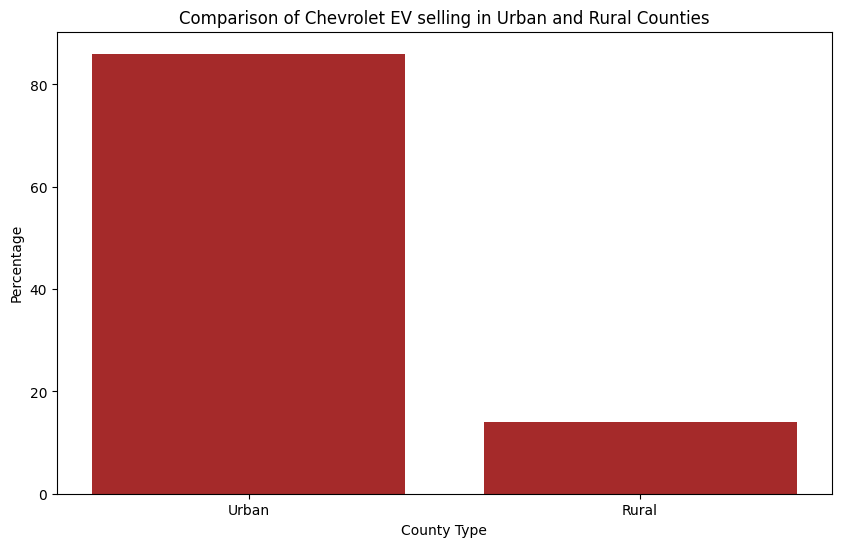

In [ ]:
county_type =['Urban', 'Rural']
percentage = [86, 14]
plt.figure(figsize=(10, 6))
plt.bar(county_type, percentage, color='Brown')
plt.xlabel('County Type')
plt.ylabel('Percentage')
plt.title('Comparison of Chevrolet EV selling in Urban and Rural Counties')
plt.show()

Therefore it can be seen that Urban counties prefer chevrolet evs more than Rural type Counties.

Company Name: Nissan

In [ ]:
nissan_ev.shape[0]

13187

In [ ]:
def percentage(a,b):
  return (a/b)*100

In [ ]:
a=percentage(nissan_ev.shape[0], ev_filtered.shape[0])
a

7.2401543892784

In [ ]:
nissan_mean_range

139.93372260559642

Now, comparing the average range of Nissan EV with the other 4 best selling EV makers.

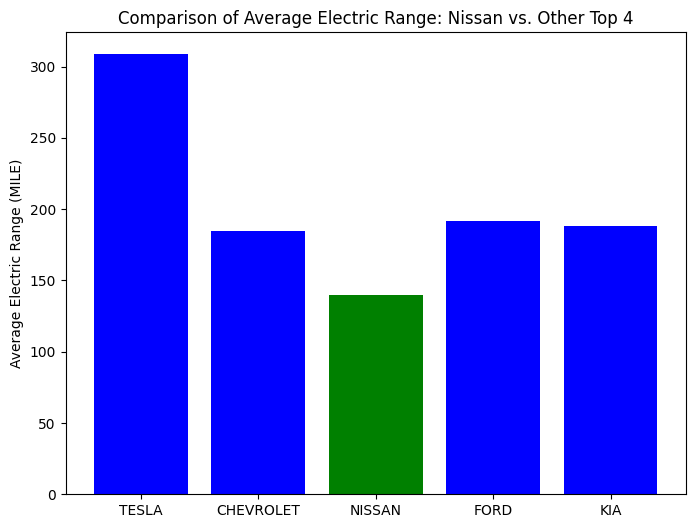

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(mean_ranges.keys(), mean_ranges.values(),  color=['green' if make == 'NISSAN' else 'blue' for make in mean_ranges.keys()])
plt.ylabel('Average Electric Range (MILE)')
plt.title('Comparison of Average Electric Range: Nissan vs. Other Top 4')
plt.show()

Therefore it can be seen that Nissan ev has the lowest mean electric range(140 Miles) among the top 5 ev makers

Finding out the relationship between Model years and Battery ranges.

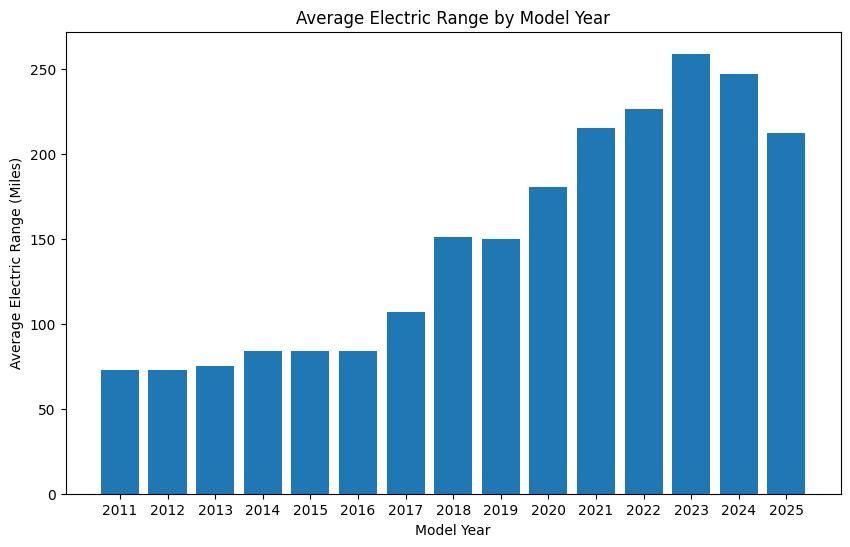

In [ ]:
nissan_range_year = nissan_ev.groupby('Model Year')['Electric Range (MILE)'].mean()
plt.figure(figsize=(10, 6))
plt.bar(nissan_range_year.index, nissan_range_year.values)
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (Miles)')
plt.title('Average Electric Range by Model Year')
plt.xticks(nissan_range_year.index, map(int, nissan_range_year.index))
plt.show()

The bar chart illustrates the average electric range of Nissan vehicles across different model years. We can observe a significant upward trend in electric range over time. This indicates that Nissan has made significant strides in improving battery technology, vehicle efficiency, and overall electric range. The increasing bar heights represent the gradual enhancement in electric range, making Nissan electric vehicles more practical and appealing to consumers. This trend aligns with the broader industry trend of improving electric vehicle technology and addressing range anxiety.

Now, finding the effect of sales across different Model years

In [ ]:
nissan_sales_per_year = nissan_ev.groupby('Model Year').size().reset_index(name='Sales')

In [ ]:
plt.figure(figsize=(20, 6))
plt.bar(nissan_sales_per_year['Model Year'], nissan_sales_per_year['Sales'], color='skyblue')
plt.xlabel('Model Year')
plt.ylabel('Number of Sales')
plt.title('Nissan EV Sales by Model Year')
plt.xticks(nissan_sales_per_year['Model Year'])
plt.grid(True)
plt.show()

The bar chart illustrates the sales of Nissan electric vehicles across different model years. We can observe a fluctuating trend in sales over time, with some years showing significant growth and others experiencing a decline. This variation could be influenced by factors such as the introduction of new models, changes in consumer preferences, economic conditions, and government incentives. The chart highlights the dynamic nature of the electric vehicle market and the evolving consumer demand for Nissan's electric offerings.

Now, finding the number of CAFV Eligible EV in Nissan company.

In [ ]:
nissan_cafv = nissan_ev[
    (nissan_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') |
    (nissan_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')
]

nissan_non_cafv = nissan_ev[
    (nissan_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range') |
    (nissan_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range (Manually Researched)')
]
nissan_cafv_eligible_count = nissan_cafv.shape[0]
nissan_cafv_ineligible_count = nissan_non_cafv.shape[0]
labels = ['CAFV Eligible', 'Not CAFV Eligible']
sizes = [nissan_cafv_eligible_count, nissan_cafv_ineligible_count]
if sum(sizes) == 0:
    print("No data available for pie chart.")
else:
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('CAFV Eligibility for Nissan Models')
plt.show()

Therefore, it can said that all the nissan evs are CAFV Eligible

Now finding top 5 counties where Nissan evs sold the most

In [ ]:
nissan_ev['County'].value_counts().head(5)

In [ ]:
def percentage(a,b):
  return (a/b)*100

In [ ]:
a= percentage(nissan_ev[nissan_ev['County']=='King'].shape[0], nissan_ev.shape[0])
b= percentage(nissan_ev[nissan_ev['County']=='Snohomish'].shape[0], nissan_ev.shape[0])
c= percentage(nissan_ev[nissan_ev['County']=='Pierce'].shape[0], nissan_ev.shape[0])
d= percentage(nissan_ev[nissan_ev['County']=='Kitsap'].shape[0], nissan_ev.shape[0])
e= percentage(nissan_ev[nissan_ev['County']=='Whatcom'].shape[0], nissan_ev.shape[0])
a,b,c,d,e

In [ ]:
county = ['King','Snohomish','Pierce','Kitsap','Whatcom','Other Counties']
percentage = [52, 13, 8, 5, 5, 18]
plt.figure(figsize=(10, 6))
plt.bar(county, percentage, color='Orange')
plt.xlabel('County Name')
plt.ylabel('Percentage of EVs Sold')
plt.title('Top 5 counties where Nissan EVS sold the most')
plt.show()

SO, The top 5 counties where nissan evs sold the most:

King	(6806)[52%]

Snohomish	(1728)[13%]

Pierce	(1026)[8%]

Kitsap	(660)[5%]

Whatcom	(658)[5%]

Now comparing the Top range of Nissan EV with the other top 4 best selling EV Makers

In [ ]:
a=tesla_ev['Electric Range (MILE)'].max()
b= chevrolet_ev['Electric Range (MILE)'].max()
c= nissan_ev['Electric Range (MILE)'].max()
d= ford_ev['Electric Range (MILE)'].max()
e= kia_ev['Electric Range (MILE)'].max()
a,b,c,d,e

In [ ]:
top5_ev= ['TESLA', 'CHEVROLET', 'NISSAN', 'FORD', 'KIA']
ranges = [405,450,304,320,310]
plt.figure(figsize=(8, 6))
plt.bar(top5_ev, ranges,  color=['green' if make == 'NISSAN' else 'blue' for make in top5_ev])
plt.ylabel('Electric Range (MILE)')
plt.title('Comparison of Highest Electric Range: Nissan vs. Other Top 4')
plt.show()
plt.show()

From the above bar diagram it can be said that nissan has the 5th spot when comparing ev makers with highest range models.

Now, finding the top 5 best selling models of Nissan EV

In [ ]:
nissan_ev['Model'].value_counts().head(5)

In [ ]:
model = ['Leaf','Ariya']
num_evs = [12356, 831]
plt.figure(figsize=(10, 6))
plt.bar(model, num_evs, color='Orange')
plt.xlabel('Model Name')
plt.ylabel('Number of EVs Sold')
plt.title('Top EV Models sold by Nissan')
plt.show()

In [ ]:
def percentage(a,b):
  return (a/b)*100

In [ ]:
leaf= nissan_ev[nissan_ev["Model"]=="LEAF"]
a= percentage(leaf.shape[0], nissan_ev.shape[0])
a

Therefore the top selling models of Nissan are:

LEAF	(12356)

ARIYA	(831)

LEAF is the the highest selling ev model of nissan containing 94% of all nissan evs.

Now, comparing Leaf's Electric range to their Model years.

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(leaf['Model Year'], leaf['Electric Range (MILE)'], color='green')
plt.title('Electric Range of Nissan Leaf EV Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.grid(axis='y')
plt.show()

The bar chart illustrates the increasing electric range of the Nissan Leaf EV over the years 2010 to 2025. The height of each bar represents the average electric range for a specific model year. It is evident that Nissan has made significant strides in improving the electric range of the Leaf EV, with each subsequent model year offering a longer range. This upward trend can be attributed to advancements in battery technology, improved efficiency, and other technological enhancements. The chart effectively demonstrates the progress made by Nissan in the electric vehicle market and the increasing practicality of electric cars.

Now, finding which Electric Utility provider provides most for Nissan EVS.

In [ ]:
nissan_ev["Electric Utility"].value_counts().head(5)

In [ ]:
a= percentage(nissan_ev[nissan_ev["Electric Utility"]=="PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)"].shape[0], nissan_ev.shape[0])
b= percentage(nissan_ev[nissan_ev["Electric Utility"]=="PUGET SOUND ENERGY INC"].shape[0], nissan_ev.shape[0])
c= percentage(nissan_ev[nissan_ev["Electric Utility"]=="CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)"].shape[0], nissan_ev.shape[0])
d= percentage(nissan_ev[nissan_ev["Electric Utility"]=="BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY"].shape[0], nissan_ev.shape[0])
e= percentage(nissan_ev[nissan_ev["Electric Utility"]=="PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY"].shape[0], nissan_ev.shape[0])
a,b,c,d,e

In [ ]:
a = nissan_ev[nissan_ev["Electric Utility"] == "PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)"]
b = nissan_ev[nissan_ev["Electric Utility"] == "PUGET SOUND ENERGY INC"]
c = nissan_ev[nissan_ev["Electric Utility"] == "CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)"]
d = nissan_ev[nissan_ev["Electric Utility"] == "BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY"]
e = nissan_ev[nissan_ev["Electric Utility"] == "PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY"]
print(a['Electric Utility Type'].unique())
print(b['Electric Utility Type'].unique())
print(c['Electric Utility Type'].unique())
print(d['Electric Utility Type'].unique())
print(e['Electric Utility Type'].unique())

In [ ]:
electric_utility =['Puget and Tacoma','Puget','Seatlle and Tacoma','Bonneville and Tacoma and Peninsula', 'Puget and Whatcom', 'Other Providers']
num_evs = [4072, 3198, 3063, 697, 633, 1524]
plt.figure(figsize=(15, 6))
plt.bar(electric_utility, num_evs, color='Blue')
plt.xlabel('Electric Utility Name')
plt.xticks(rotation=60)
plt.ylabel('Number of EVs Sold')
plt.title('Top 5 Electric Utility Provider for Nissan')
plt.show()

The bar chart visualizes the top 5 electric utility providers for Nissan in terms of the number of electric vehicles sold. "Puget Sound Energy Inc | City of Tacoma (WA)" emerges as the leading utility provider, followed closely by "Puget Sound Energy Inc." and "City of Seattle - (WA) City of Tacoma - (WA). These top three providers have a significant lead over the others. "Bonneville Power Administration | City of Tacoma (WA) | Peninsula Light Company", "Puget Sound Energy Inc | PUD No 1 of Whatcom County" have considerably lower sales figures. This indicates that the first three utility providers play a crucial role in the distribution and sales of Nissan electric vehicles, likely due to factors such as extensive infrastructure, favorable policies, and strong consumer demand within their service areas.

Now, finding if newer models of Nissan EV are more CAFV eligible or not.

In this case, this question is invalid because in this dataset, all Nissan models are CAFV eligible.

Now, finding which type of counties prefer Nissan EVs more.

In [ ]:
nissan_urban= nissan_ev[nissan_ev["Urban/Rural"]=="Urban"]
nissan_rural= nissan_ev[nissan_ev["Urban/Rural"]=="Rural"]
a= percentage(nissan_urban.shape[0], nissan_ev.shape[0])
b= percentage(nissan_rural.shape[0], nissan_ev.shape[0])
a,b

In [ ]:
county_type =['Urban', 'Rural']
percentage = [90, 10]
plt.figure(figsize=(10, 6))
plt.bar(county_type, percentage, color='Brown')
plt.xlabel('County Type')
plt.ylabel('Percentage')
plt.title('Comparison of Nissan EV selling in Urban and Rural Counties')
plt.show()

Therefore it can be said that Urban type counties prefer nissan evs the most than rural type counties.

Company Name: Ford

In [ ]:
ford_ev.shape[0]

In [ ]:
def percentage(a,b):
  return (a/b)*100

In [ ]:
a=percentage(ford_ev.shape[0], ev_filtered.shape[0])
a

In [ ]:
ford_mean_range

Now, comparing the average range of Ford EV with the other 4 best selling EV makers.


In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(mean_ranges.keys(), mean_ranges.values(),  color=['green' if make == 'FORD' else 'blue' for make in mean_ranges.keys()])
plt.ylabel('Average Electric Range (MILE)')
plt.title('Comparison of Average Electric Range: Ford vs. Other Top 4')
plt.show()

From the above bar diagram it can be seen that Ford ev has the second highest mean range among the 5 best selling ev makers

Finding out the relationship between Model years and Battery ranges

In [ ]:
ford_range_year = ford_ev.groupby('Model Year')['Electric Range (MILE)'].mean()
plt.figure(figsize=(20, 6))
plt.bar(ford_range_year.index, ford_range_year.values)
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (Miles)')
plt.title('Average Electric Range by Model Year')
plt.xticks(ford_range_year.index, map(int, ford_range_year.index))
plt.show()

The bar chart illustrates the average electric range of Ford vehicles across different model years. We can observe a significant upward trend in electric range over time, particularly in recent years. This indicates that Ford has made substantial progress in improving battery technology, vehicle efficiency, and overall electric range. The increasing bar heights represent the gradual enhancement in electric range, making Ford electric vehicles more practical and appealing to consumers. This trend aligns with the broader industry trend of improving electric vehicle technology and addressing range anxiety.

Now, finding the effect of sales across different Model years

In [ ]:
ford_sales_per_year = ford_ev.groupby('Model Year').size().reset_index(name='Sales')

In [ ]:
plt.figure(figsize=(20, 6))
plt.bar(ford_sales_per_year['Model Year'], ford_sales_per_year['Sales'], color='skyblue')
plt.xlabel('Model Year')
plt.ylabel('Number of Sales')
plt.title('Ford EV Sales by Model Year')
plt.xticks(ford_sales_per_year['Model Year'])
plt.grid(True)
plt.show()

The bar chart illustrates the number of Ford electric vehicles sold per year from 1999 to 2024. We can observe a significant increase in sales, particularly in recent years. This growth can be attributed to several factors, including advancements in electric vehicle technology, increasing consumer awareness and acceptance, and supportive government policies. The chart highlights the rising popularity and market penetration of Ford electric vehicles, indicating a strong future for electric mobility.

Now, finding the number of CAFV Eligble EV in Ford company.

In [ ]:
ford_cafv = ford_ev[
    (ford_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') |
    (ford_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')
]

ford_non_cafv = ford_ev[
    (ford_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range') |
    (ford_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range (Manually Researched)')
]
ford_cafv_eligible_count = ford_cafv.shape[0]
ford_cafv_ineligible_count = ford_non_cafv.shape[0]
labels = ['CAFV Eligible', 'Not CAFV Eligible']
sizes = [ford_cafv_eligible_count, ford_cafv_ineligible_count]
if sum(sizes) == 0:
    print("No data available for pie chart.")
else:
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('CAFV Eligibility for Ford Models')
plt.show()

The provided pie chart illustrates the CAFV eligibility of Ford electric vehicles. It reveals that a substantial majority (69.9%) of Ford's electric models qualify for CAFV incentives, which are designed to promote the adoption of environmentally friendly vehicles. However, a significant portion (30.1%) of Ford's electric vehicles, primarily those with lower battery ranges, do not meet the eligibility criteria. This analysis highlights the importance of battery capacity in determining a vehicle's eligibility for such incentives and provides insights into the evolving landscape of electric vehicles and government support programs.

Now finding top 5 counties where Ford evs sold the most

In [ ]:
ford_ev['County'].value_counts().head(5)

In [ ]:
def percentage(a,b):
  return (a/b)*100

In [ ]:
a= percentage(ford_ev[ford_ev['County']=='King'].shape[0], ford_ev.shape[0])
b= percentage(ford_ev[ford_ev['County']=='Snohomish'].shape[0], ford_ev.shape[0])
c= percentage(ford_ev[ford_ev['County']=='Pierce'].shape[0], ford_ev.shape[0])
d= percentage(ford_ev[ford_ev['County']=='Thurston'].shape[0], ford_ev.shape[0])
e= percentage(ford_ev[ford_ev['County']=='Kitsap'].shape[0], ford_ev.shape[0])
a,b,c,d,e

In [ ]:
county = ['King','Snohomish','Pierce','Thurston','Kitsap','Other Counties']
percentage = [43, 13, 11, 8, 4, 21]
plt.figure(figsize=(10, 6))
plt.bar(county, percentage, color='Orange')
plt.xlabel('County Name')
plt.ylabel('Percentage of EVs Sold')
plt.title('Top 5 counties where Ford EVS sold the most')
plt.show()

Therefore from the above diagram it can be that The top 5 counties where ford evs sold the most:

King	(3974)(43%)

Snohomish	(1258)(13%)

Pierce	(1040)(11%)

Thurston	(721)(8%)

Kitsap	(418)(4%)


Now comparing the Top range of Ford EV with the other top 4 best selling EV Makers

In [ ]:
a=tesla_ev['Electric Range (MILE)'].max()
b= chevrolet_ev['Electric Range (MILE)'].max()
c= nissan_ev['Electric Range (MILE)'].max()
d= ford_ev['Electric Range (MILE)'].max()
e= kia_ev['Electric Range (MILE)'].max()
a,b,c,d,e

In [ ]:
top5_ev= ['TESLA', 'CHEVROLET', 'NISSAN', 'FORD', 'KIA']
ranges = [405,450,304,320,310]
plt.figure(figsize=(8, 6))
plt.bar(top5_ev, ranges,  color=['green' if make == 'FORD' else 'blue' for make in top5_ev])
plt.ylabel('Electric Range (MILE)')
plt.title('Comparison of Highest Electric Range: Ford vs. Other Top 4')
plt.show()

Therefore it can be seen that Ford provides the third highest range ev model among top 5 ev makers

Now, finding the top 5 best selling models of Ford EV

In [ ]:
ford_ev['Model'].value_counts().head(5)

In [ ]:
model = ['MUSTANG MACH-E','F-150','FUSION','C-MAX','TRANSIT','OTHER MODELS']
num_evs = [3578, 1913, 1512, 1298, 423, 611]
plt.figure(figsize=(10, 6))
plt.bar(model, num_evs, color='Orange')
plt.xlabel('Model Name')
plt.ylabel('Number of EVs Sold')
plt.title('Top 5 EV Models sold by Ford')
plt.show()

In [ ]:
def percentage(a,b):
  return (a/b)*100

In [ ]:
mustang= ford_ev[ford_ev["Model"]=="MUSTANG MACH-E"]
a= percentage(mustang.shape[0], ford_ev.shape[0])
a

Therefore from the above diagram it can be seen that the top five models of ford are:

MUSTANG MACH-E	(3578)

F-150	(1913)

FUSION	(1512)

C-MAX	(1298)

TRANSIT	(423)

Mustang mach e was the highest selling ev model of ford containing 38% of ford ev


Now, comparing Mustang 's Electric range to their Model years.


In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(mustang['Model Year'], mustang['Electric Range (MILE)'], color='green')
plt.title('Electric Range of Ford Mustang EV Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.grid(axis='y')
plt.show()

The bar chart illustrates the electric range of the Ford Mustang Mach-E over the years 2020 to 2024. The height of each bar represents the average electric range for a specific model year. It's evident that Ford has made significant strides in improving the electric range of the Mustang Mach-E, with each subsequent model year offering a longer range. This upward trend can be attributed to advancements in battery technology, improved efficiency, and other technological enhancements. The chart effectively demonstrates the progress made by Ford in the electric vehicle market and the increasing practicality of electric cars.

Now, finding which Electric Utility provider provides most for Ford EVs.


In [ ]:
ford_ev["Electric Utility"].value_counts().head(5)

In [ ]:
a= percentage(ford_ev[ford_ev["Electric Utility"]=="PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)"].shape[0], ford_ev.shape[0])
b= percentage(ford_ev[ford_ev["Electric Utility"]=="PUGET SOUND ENERGY INC"].shape[0], ford_ev.shape[0])
c= percentage(ford_ev[ford_ev["Electric Utility"]=="CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)"].shape[0], ford_ev.shape[0])
d= percentage(ford_ev[ford_ev["Electric Utility"]=="BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY"].shape[0], ford_ev.shape[0])
e= percentage(ford_ev[ford_ev["Electric Utility"]=="PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY"].shape[0], ford_ev.shape[0])
a,b,c,d,e

In [ ]:
a = ford_ev[ford_ev["Electric Utility"] == "PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)"]
b = ford_ev[ford_ev["Electric Utility"] == "PUGET SOUND ENERGY INC"]
c = ford_ev[ford_ev["Electric Utility"] == "CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)"]
d = ford_ev[ford_ev["Electric Utility"] == "BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY"]
e = ford_ev[ford_ev["Electric Utility"] == "PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY"]
print(a['Electric Utility Type'].unique())
print(b['Electric Utility Type'].unique())
print(c['Electric Utility Type'].unique())
print(d['Electric Utility Type'].unique())
print(e['Electric Utility Type'].unique())

In [ ]:
electric_utility =['Puget and Tacoma','Puget','Seatlle and Tacoma','Bonneville and Tacoma and Peninsula','Puget and Whatcom', 'Other Providers']
num_evs = [2919, 2590, 1478, 628, 258, 1462]
plt.figure(figsize=(15, 6))
plt.bar(electric_utility, num_evs, color='Blue')
plt.xlabel('Electric Utility Name')
plt.xticks(rotation=60)
plt.ylabel('Number of EVs Sold')
plt.title('Top 5 Electric Utility Provider for Ford')
plt.show()

The bar chart visualizes the top 5 electric utility providers for Ford in terms of the number of electric vehicles sold. "Puget Sound Energy Inc | City of Tacoma (WA)" followed by "Puget Sound Energy Inc." and "City of Seattle - (WA) City of Tacoma - (WA)". The remaining utility providers, "Bonneville Power Administration | City of Tacoma (WA) | Peninsula Light Company" and "Puget Sound Energy Inc | PUD No 1 of Whatcom County," have significantly lower contributions. This indicates that the first three utility providers play a crucial role in the distribution and sales of Ford electric vehicles, likely due to factors such as extensive infrastructure, favorable policies, and strong consumer demand within their service areas.

Now, finding if newer models of Ford EV are more CAFV eligible or not.

In [ ]:
ev_filtered['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

In [ ]:
ford_2020 = ford_ev[ford_ev['Model Year'] == 2020]
ford_2021 = ford_ev[ford_ev['Model Year'] == 2021]
ford_2022 = ford_ev[ford_ev['Model Year'] == 2022]
ford_2023 = ford_ev[ford_ev['Model Year'] == 2023]
ford_2024 = ford_ev[ford_ev['Model Year'] == 2024]
ford_2025 = ford_ev[ford_ev['Model Year'] == 2025]

ford_cafv_2020 = ford_2020[(ford_2020['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') | (ford_2020['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')]
ford_cafv_2021 = ford_2021[(ford_2021['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') | (ford_2021['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')]
ford_cafv_2022 = ford_2022[(ford_2022['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') | (ford_2022['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')]
ford_cafv_2023 = ford_2023[(ford_2023['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') | (ford_2023['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')]
ford_cafv_2024 = ford_2024[(ford_2024['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') | (ford_2024['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')]
ford_cafv_2025 = ford_2025[(ford_2025['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') | (ford_2025['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')]



years = [2020, 2021, 2022, 2023, 2024, 2025]
ford_total_evs = [ford_2020.shape[0], ford_2021.shape[0], ford_2022.shape[0], ford_2023.shape[0], ford_2024.shape[0], ford_2025.shape[0]]
ford_cafv_eligible_evs = [ford_cafv_2020.shape[0], ford_cafv_2021.shape[0], ford_cafv_2022.shape[0], ford_cafv_2023.shape[0], ford_cafv_2024.shape[0], ford_cafv_2025.shape[0]]

x = np.arange(len(years))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, ford_total_evs, width, label='Total EVs', color='skyblue')
bar2 = ax.bar(x + width/2, ford_cafv_eligible_evs, width, label='CAFV Eligible EVs', color='orange')

ax.set_xlabel('Model Year')
ax.set_ylabel('Number of EVs')
ax.set_title('Comparison of Total Ford EVs and CAFV Eligible EVs by Model Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The bar chart illustrates the comparison of total Ford EVs and Clean Alternative Fuel Vehicle (CAFV) eligible EVs for different model years from 2020 to 2024. The data shows a significant rise in both total EVs and CAFV-eligible EVs, peaking in 2023. The numbers for both categories are nearly identical, indicating a high proportion of Ford EVs qualifying as CAFV-eligible in most model years. After 2023, there is a sharp decline in both categories for 2024, suggesting either reduced production or incomplete data for newer models. This trend highlights the growth and subsequent stabilization of Ford's contribution to the EV market during the examined period.

Now, finding which type of counties prefer Ford EVs more.

In [ ]:
ford_urban= ford_ev[ford_ev["Urban/Rural"]=="Urban"]
ford_rural= ford_ev[ford_ev["Urban/Rural"]=="Rural"]
a= percentage(ford_urban.shape[0], ford_ev.shape[0])
b= percentage(ford_rural.shape[0], ford_ev.shape[0])
a,b

In [ ]:
county_type =['Urban', 'Rural']
percentage = [87, 13]
plt.figure(figsize=(10, 6))
plt.bar(county_type, percentage, color='Brown')
plt.xlabel('County Type')
plt.ylabel('Percentage')
plt.title('Comparison of Ford EV selling in Urban and Rural Counties')
plt.show()

Therefore itcan be seen that urban counties prefer ford evs the most than rural type counties

Company Name: Kia

In [ ]:
kia_ev.shape[0]

In [ ]:
def percentage(a,b):
  return (a/b)*100

In [ ]:
a=percentage(kia_ev.shape[0], ev_filtered.shape[0])
a

In [ ]:
kia_mean_range

Now, comparing the average range of Kia EV with the other 4 best selling EV makers

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(mean_ranges.keys(), mean_ranges.values(),  color=['green' if make == 'KIA' else 'blue' for make in mean_ranges.keys()])
plt.ylabel('Average Electric Range (MILE)')
plt.title('Comparison of Average Electric Range: Kia vs. Other Top 4')
plt.show()

From the above diagram, it can be seen that Kia has the third highest mean range among top 5 EV makers.

Finding out the relationship between Model years and Battery ranges.

In [ ]:
kia_range_year = kia_ev.groupby('Model Year')['Electric Range (MILE)'].mean()
plt.figure(figsize=(10, 6))
plt.bar(kia_range_year.index, kia_range_year.values)
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (Miles)')
plt.title('Average Electric Range by Model Year')
plt.xticks(kia_range_year.index, map(int, kia_range_year.index))
plt.show()

The bar chart illustrates the average electric range of Kia vehicles across different model years. We can observe a significant upward trend in electric range over time, particularly in recent years. This indicates that Kia has made substantial progress in improving battery technology, vehicle efficiency, and overall electric range. The increasing bar heights represent the gradual enhancement in electric range, making Kia electric vehicles more practical and appealing to consumers. This trend aligns with the broader industry trend of improving electric vehicle technology and addressing range anxiety.

Now finding the effect of sales across different model years.

In [ ]:
kia_sales_per_year = kia_ev.groupby('Model Year').size().reset_index(name='Sales')

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(kia_sales_per_year['Model Year'], kia_sales_per_year['Sales'], color='skyblue')
plt.xlabel('Model Year')
plt.ylabel('Number of Sales')
plt.title('Kia EV Sales by Model Year')
plt.xticks(kia_sales_per_year['Model Year'])
plt.grid(True)
plt.show()

The bar chart illustrates the sales of Kia electric vehicles across different model years. We can observe a significant increase in sales over time, particularly in recent years. This growth can be attributed to several factors, including advancements in electric vehicle technology, increasing consumer awareness and acceptance, and supportive government policies. The chart highlights the rising popularity and market penetration of Kia electric vehicles, indicating a strong future for the brand in the electric vehicle market.

Now, finding the CAFV eligible EV in Kia company.

In [ ]:
kia_cafv = kia_ev[
    (kia_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') |
    (kia_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')
]

kia_non_cafv = kia_ev[
    (kia_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range') |
    (kia_ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range (Manually Researched)')
]
kia_cafv_eligible_count = kia_cafv.shape[0]
kia_cafv_ineligible_count = kia_non_cafv.shape[0]
labels = ['CAFV Eligible', 'Not CAFV Eligible']
sizes = [kia_cafv_eligible_count, kia_cafv_ineligible_count]
if sum(sizes) == 0:
    print("No data available for pie chart.")
else:
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('CAFV Eligibility for Kia Models')
plt.show()

The provided code and pie chart analyze the CAFV (Clean Alternative Fuel Vehicle) eligibility of Kia electric vehicles. The analysis reveals that a significant majority (90.6%) of Kia's electric models qualify for CAFV incentives, while a smaller portion (9.4%) do not meet the eligibility criteria due to low battery range. This indicates that Kia's electric vehicles are generally eligible for government incentives aimed at promoting clean energy and reducing emissions.

Now finding top 5 counties where Kia evs sold the most

In [ ]:
kia_ev['County'].value_counts().head(5)

In [ ]:
def percentage(a,b):
  return (a/b)*100

In [ ]:
a= percentage(kia_ev[kia_ev['County']=='King'].shape[0], kia_ev.shape[0])
b= percentage(kia_ev[kia_ev['County']=='Snohomish'].shape[0], kia_ev.shape[0])
c= percentage(kia_ev[kia_ev['County']=='Pierce'].shape[0], kia_ev.shape[0])
d= percentage(kia_ev[kia_ev['County']=='Thurston'].shape[0], kia_ev.shape[0])
e= percentage(kia_ev[kia_ev['County']=='Kitsap'].shape[0], kia_ev.shape[0])
a,b,c,d,e

In [ ]:
county = ['King','Snohomish','Pierce','Thurston','Kitsap','Other Counties']
percentage = [50, 13, 10, 6, 5, 16]
plt.figure(figsize=(10, 6))
plt.bar(county, percentage, color='Orange')
plt.xlabel('County Name')
plt.ylabel('Percentage of EVs Sold')
plt.title('Top 5 counties where Kia EVS sold the most')
plt.show()

Therefore, it can be seen that the top 5 counties where Kia EV sold the most cars:

King(3959)(50%)

Snohomish(1002)(13%)

Pierce(756)(10%)

Thurston(465)(6%)

Kitsap(404)(5%)

Now comparing the Top range of Kia EV with the other top 4 best selling EV Makers

In [ ]:
a=tesla_ev['Electric Range (MILE)'].max()
b= chevrolet_ev['Electric Range (MILE)'].max()
c= nissan_ev['Electric Range (MILE)'].max()
d= ford_ev['Electric Range (MILE)'].max()
e= kia_ev['Electric Range (MILE)'].max()
a,b,c,d,e

In [ ]:
top5_ev= ['TESLA', 'CHEVROLET', 'NISSAN', 'FORD', 'KIA']
ranges = [405,450,304,320,310]
plt.figure(figsize=(8, 6))
plt.bar(top5_ev, ranges,  color=['green' if make == 'KIA' else 'blue' for make in top5_ev])
plt.ylabel('Electric Range (MILE)')
plt.title('Comparison of Highest Electric Range: Kia vs. Other Top 4')
plt.show()

Therefore, it can be seen that Kia has the 4th Highest electric range model among the top 5 EV makers.

Now, finding top 5 best selling models of Kia company.

In [ ]:
kia_ev['Model'].value_counts().head(5)

In [ ]:
model = ['NIRO','EV6','SPORTAGE','SORENTO','EV9','OTHER MODELS']
num_evs = [3221, 2269, 667, 607, 540, 644]
plt.figure(figsize=(10, 6))
plt.bar(model, num_evs, color='Orange')
plt.xlabel('Model Name')
plt.ylabel('Number of EVs Sold')
plt.title('Top 5 EV Models sold by Kia')
plt.show()

In [ ]:
def percentage(a,b):
  return (a/b)*100

In [ ]:
niro= kia_ev[kia_ev["Model"]=="NIRO"]
a= percentage(niro.shape[0], kia_ev.shape[0])
a

Therefore, it can be seen that the top 5 models of Kia are:

Niro(3221)

EV6(2269)

Sportage(667)

Sorento(607)

EV9(540)

Niro is the best selling model of Kia containing 41% of total Kia EVs

Now, comparing Niro's electric range to their Model years.


In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(niro['Model Year'], niro['Electric Range (MILE)'], color='green')
plt.title('Electric Range of Kia Niro EV Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.grid(axis='y')
plt.show()

The bar chart illustrates the increasing electric range of the Kia Niro EV over the years 2018 to 2024. The height of each bar represents the average electric range for a specific model year. It is evident that Kia has made significant strides in improving the electric range of the Niro EV, with each subsequent model year offering a longer range. This upward trend can be attributed to advancements in battery technology, improved efficiency, and other technological enhancements. The chart effectively demonstrates the progress made by Kia in the electric vehicle market and the increasing practicality of electric cars.

Now, finding which Electric Utility Provider provides most for Kia EVs.

In [ ]:
kia_ev["Electric Utility"].value_counts().head(5)

In [ ]:
a= percentage(kia_ev[kia_ev["Electric Utility"]=="PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)"].shape[0], kia_ev.shape[0])
b= percentage(kia_ev[kia_ev["Electric Utility"]=="PUGET SOUND ENERGY INC"].shape[0], kia_ev.shape[0])
c= percentage(kia_ev[kia_ev["Electric Utility"]=="CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)"].shape[0], kia_ev.shape[0])
d= percentage(kia_ev[kia_ev["Electric Utility"]=="BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY"].shape[0], kia_ev.shape[0])
e= percentage(kia_ev[kia_ev["Electric Utility"]=="PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY"].shape[0], kia_ev.shape[0])
a,b,c,d,e

In [ ]:
a = kia_ev[kia_ev["Electric Utility"] == "PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)"]
b = kia_ev[kia_ev["Electric Utility"] == "PUGET SOUND ENERGY INC"]
c = kia_ev[kia_ev["Electric Utility"] == "CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)"]
d = kia_ev[kia_ev["Electric Utility"] == "BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY"]
e = kia_ev[kia_ev["Electric Utility"] == "PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY"]
print(a['Electric Utility Type'].unique())
print(b['Electric Utility Type'].unique())
print(c['Electric Utility Type'].unique())
print(d['Electric Utility Type'].unique())
print(e['Electric Utility Type'].unique())

In [ ]:
electric_utility =['Puget and Tacoma','Puget','Seatlle and Tacoma','Bonneville and Tacoma and Peninsula','Puget and Whatcom', 'Other Providers']
num_evs = [2622, 2040, 1623, 467, 281, 915]
plt.figure(figsize=(15, 8))
plt.bar(electric_utility, num_evs, color='Blue')
plt.xlabel('Electric Utility Name')
plt.xticks(rotation=60)
plt.ylabel('Number of EVs Sold')
plt.title('Top 5 Electric Utility Provider for Kia')
plt.show()

The bar chart visualizes the top 5 electric utility providers for Kia in terms of the number of electric vehicles sold.The results indicate that "Puget Sound Energy Inc | City of Tacoma (WA)" is the most prominent utility provider, followed by "Puget Sound Energy Inc." and "City of Seattle - (WA) City of Tacoma - (WA)". The remaining utility providers, "Bonneville Power Administration | City of Tacoma (WA) | Peninsula Light Company" and "Puget Sound Energy Inc | PUD No 1 of Whatcom County," have significantly lower contributions. This indicates that the first three utility providers play a crucial role in the distribution and sales of Kia electric vehicles, likely due to factors such as extensive infrastructure, favorable policies, and strong consumer demand within their service areas.

Now, finding if newer models are more CAFV eligible or not.

In [ ]:
kia_2020 = kia_ev[kia_ev['Model Year'] == 2020]
kia_2021 = kia_ev[kia_ev['Model Year'] == 2021]
kia_2022 = kia_ev[kia_ev['Model Year'] == 2022]
kia_2023 = kia_ev[kia_ev['Model Year'] == 2023]
kia_2024 = kia_ev[kia_ev['Model Year'] == 2024]
kia_2025 = kia_ev[kia_ev['Model Year'] == 2025]

kia_cafv_2020 = kia_2020[(kia_2020['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') | (kia_2020['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')]
kia_cafv_2021 = kia_2021[(kia_2021['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') | (kia_2021['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')]
kia_cafv_2022 = kia_2022[(kia_2022['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') | (kia_2022['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')]
kia_cafv_2023 = kia_2023[(kia_2023['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') | (kia_2023['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')]
kia_cafv_2024 = kia_2024[(kia_2024['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') | (kia_2024['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')]
kia_cafv_2025 = kia_2025[(kia_2025['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible') | (kia_2025['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible (Manually Researched)')]



years = [2020, 2021, 2022, 2023, 2024, 2025]
kia_total_evs = [kia_2020.shape[0], kia_2021.shape[0], kia_2022.shape[0], kia_2023.shape[0], kia_2024.shape[0], kia_2025.shape[0]]
kia_cafv_eligible_evs = [kia_cafv_2020.shape[0], kia_cafv_2021.shape[0], kia_cafv_2022.shape[0], kia_cafv_2023.shape[0], kia_cafv_2024.shape[0], kia_cafv_2025.shape[0]]

x = np.arange(len(years))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, kia_total_evs, width, label='Total EVs', color='skyblue')
bar2 = ax.bar(x + width/2, kia_cafv_eligible_evs, width, label='CAFV Eligible EVs', color='orange')

ax.set_xlabel('Model Year')
ax.set_ylabel('Number of EVs')
ax.set_title('Comparison of Total Kia EVs and CAFV Eligible EVs by Model Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


This bar chart showcases the distribution of Kia electric vehicles (EVs) and CAFV-eligible EVs by model year. Starting from 2020, the total number of EVs and CAFV-eligible vehicles steadily increases(except in 2021), with a sharp rise peaking in 2023. This trend indicates Kia's consistent alignment with producing EVs that meet CAFV eligibility criteria. Notably, the close similarity between the bars for each year suggests that nearly all Kia EVs are designed to qualify for CAFV eligibility. However, a slight decline is observed in 2024, with limited data for 2025, which may reflect production shifts or data incompleteness for recent years. Overall, the chart highlights Kia's strong focus on EV market expansion and adherence to clean fuel standards.

Now, finding which type of counties prefer Kia EVs more.

In [ ]:
kia_urban= kia_ev[kia_ev["Urban/Rural"]=="Urban"]
kia_rural= kia_ev[kia_ev["Urban/Rural"]=="Rural"]
a= percentage(kia_urban.shape[0], kia_ev.shape[0])
b= percentage(kia_rural.shape[0], kia_ev.shape[0])
a,b

In [ ]:
county_type =['Urban', 'Rural']
percentage = [91, 9]
plt.figure(figsize=(10, 6))
plt.bar(county_type, percentage, color='Brown')
plt.xlabel('County Type')
plt.ylabel('Percentage')
plt.title('Comparison of Kia EV selling in Urban and Rural Counties')
plt.show()

Therefore, it can be seen that Kia EVs are preferred more in Urban counties than Rural counties.